In [16]:
List_FCName_PolygonName_unpassend=['PALEOTETHYS_0340','PALEOPACIFIC_0340','AMER_Q_0340', 'CHINGIZ_0340',
                                   'FAREASTRUS_0340', 'GOND_0340', 'GR_LIGERIA_0340','LORDHOWE_0340', 'NEWENGLAND_0340',
                                   'POTO_JUNG_Q_0340', 'RHENO_HER_0340', 'TRANSURALIAN_0340']

List_PolygonName_unpassend=['PaleoPacific','Amer-Queue', 'Chingiz-Dulate', 'Far-East Russia', 'Gondwana', 'Greater Ligeria',
                            'Lord Howe', 'NewEngland',  'PaleoTethys', 'Poto-Junggar-Queue','Rheno-Hercynian', 'TransUralian']

Dict_FC_Name_PolygonName={}

for fc_Name in  List_FCName_PolygonName_unpassend :
    for PlateName in List_PolygonName_unpassend:
        if fc_Name[:10].lower()==PlateName[:10].lower():
            Dict_FC_Name_PolygonName[fc_Name] = PlateName
            List_FCName_PolygonName_unpassend.remove(fc_Name)
            List_PolygonName_unpassend.remove(PlateName)



# print(List_PolygonName_passend)
# print(List_FCName_PolygonName_passend)
print(Dict_FC_Name_PolygonName)
#List_FCName_PolygonName_unpassend.sort()
print(List_FCName_PolygonName_unpassend)
#List_PolygonName_unpassend.sort()
print(List_PolygonName_unpassend)
# print(List_FCName_PolygonName_unpassend[6][:10].capitalize())
# print(List_PolygonName_unpassend[6][:10].capitalize())

{'PALEOTETHYS_0340': 'PaleoTethys', 'NEWENGLAND_0340': 'NewEngland', 'TRANSURALIAN_0340': 'TransUralian'}
['PALEOPACIFIC_0340', 'AMER_Q_0340', 'CHINGIZ_0340', 'FAREASTRUS_0340', 'GOND_0340', 'GR_LIGERIA_0340', 'LORDHOWE_0340', 'POTO_JUNG_Q_0340', 'RHENO_HER_0340']
['PaleoPacific', 'Amer-Queue', 'Chingiz-Dulate', 'Far-East Russia', 'Gondwana', 'Greater Ligeria', 'Lord Howe', 'Poto-Junggar-Queue', 'Rheno-Hercynian']


In [17]:
List_FCName_PolygonName_unpassend[0][0:10].lower(), List_PolygonName_unpassend[0][0:10].lower()

('paleopacif', 'paleopacif')

# Creditcard Fraudulent: Dealing with severe imbalanced datasets.
## -Undersampling|Oversampling|Smote
## -Hypertunning with Optuna(LR, Random Forest, LGBM)
## -Future Selection with Shap
## -ML/DL Classification
## - Lazy Predict
## - Pycaret

# Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

***https://towardsdatascience.com/5-smote-techniques-for-oversampling-your-imbalance-data-b8155bdbe2b5***

***https://machinelearningmastery.com/cost-sensitive-learning-for-imbalanced-classification/***

# Overview

#### 1. Introduction

- Import Modules, Load Data 
- Data Insights

#### 2. Exploratory Data Analysis

- Handling with Skewness
- Data Cleaning
- Dealing with Outliers

#### 3. Data Preprocessing

- Scaling
- Train-Test Split
- Hard Undersampling

#### 4. Model Building

- Model Selection

#### 5. Model Evaluation

- Logistic Regression
- Random Forest Classifier
- LGBM Classifier
- Neural Network

#### 6. Model Deployement

- Saving & Exporting the Model

# 1. Introduction

## 1.1 Import Modules|Load Data|Data **Review**

### 1.1.1 Importing Modules

#### Installments

In [1]:
# Colab Installments
!pip install pyforest
!pip install squarify
!pip install pyclustertend
!pip install catboost
!pip install optuna
!pip install pandas_profiling
!pip install termcolor
!pip install colorama
!pip install shap
!pip install h5py

# Lazy Predictors

# !pip install pycaret[full]
# install the nightly build
# !pip install pycaret-nightly
!pip install pycaret-nightly[full]
!pip install scikit-learn==0.23.2  # For Pycaret
# https://pycaret.readthedocs.io/en/latest/index.html#

# !pip install scikit-learn==0.23.1  # For Lazy Predict
!pip install lazypredict
# https://lazypredict.readthedocs.io/en/latest/readme.html#

# Colab Installments for Plotly
!pip install --upgrade plotly
!pip install jupyter-dash
import plotly.graph_objects as go
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output 

  Using cached pycaret_nightly-2.3.6.dev1643244588-py3-none-any.whl (302 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ata\\anaconda3\\Lib\\site-packages\\pywin32_system32\\pythoncom37.dll'
Consider using the `--user` option or check the permissions.



  Using cached pyLDAvis-3.3.1.tar.gz (1.7 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached mlflow-1.23.1-py3-none-any.whl (15.6 MB)
  Using cached scipy-1.5.4-cp37-cp37m-win_amd64.whl (31.2 MB)
  Using cached mlxtend-0.19.0-py2.py3-none-any.whl (1.3 MB)
  Using cached kmodes-0.11.1-py2.py3-none-any.whl (19 kB)
  Using cached scikit_learn-0.23.2-cp37-cp37m-win_amd64.whl (6.8 MB)
  Using cached spacy-2.3.7-cp37-cp37m-win_amd64.whl (9.6 MB)
  Using cached gensim-3.8.3-cp37-cp37m-win_amd64.whl (24.2 MB)
  Using cached umap_learn-0.5.2-py3-none-any.whl
  Using cached PyYAML-5.4.1-cp37-cp37m-win_amd64.whl (210 

  Using cached dtreeviz-1.3.2-py3-none-any.whl
  Using cached oyaml-1.0-py2.py3-none-any.whl (3.0 kB)
  Using cached orjson-3.6.6-cp37-none-win_amd64.whl (180 kB)
  Using cached dash_bootstrap_components-0.13.1-py3-none-any.whl (197 kB)
  Using cached colour-0.1.5-py2.py3-none-any.whl (23 kB)
  Using cached ua_parser-0.10.0-py2.py3-none-any.whl (35 kB)
  Using cached Flask_SeaSurf-0.3.1-py3-none-any.whl (8.1 kB)
  Using cached chart_studio-1.1.0-py3-none-any.whl (64 kB)
  Using cached starlette-0.17.1-py3-none-any.whl (58 kB)
  Using cached anyio-3.5.0-py3-none-any.whl (79 kB)
  Using cached WTForms-3.0.1-py3-none-any.whl (136 kB)
  Using cached Flask_WTF-0.15.1-py2.py3-none-any.whl (13 kB)
  Using cached google_cloud_core-2.2.2-py2.py3-none-any.whl (29 kB)
  Using cached google_api_core-2.4.0-py2.py3-none-any.whl (111 kB)
  Using cached google_resumable_media-2.1.0-py2.py3-none-any.whl (75 kB)
  Using cached googleapis_common_protos-1.54.0-py2.py3-none-any.whl (207 kB)
  Using cached 

ERROR: Invalid requirement: '#'


  Using cached lazypredict-0.2.9-py2.py3-none-any.whl (12 kB)
  Using cached tqdm-4.56.0-py2.py3-none-any.whl (72 kB)


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\ata\\anaconda3\\Lib\\site-packages\\numpy\\.libs\\libopenblas.NOIJJG62EMASZI6NYURL6JBKM4EVBGM7.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Using cached pytest-5.4.3-py3-none-any.whl (248 kB)
  Using cached PyYAML-5.3.1-cp37-cp37m-win_amd64.whl (216 kB)
  Using cached scikit_learn-0.23.1-cp37-cp37m-win_amd64.whl (6.8 MB)
  Using cached lightgbm-2.3.1-py2.py3-none-win_amd64.whl (544 kB)
  Using cached joblib-1.0.0-py3-none-any.whl (302 kB)
  Using cached scipy-1.5.4-cp37-cp37m-win_amd64.whl (31.2 MB)
  Using cached click-7.1.2-py2.py3-none-any.whl (82 kB)
  Using cached pandas-1.0.5-cp37-cp37m-win_amd64.whl (8.7 MB)
  Using cached six-1.15.0-py2.py3-none-any.whl (10 kB)
  Using cached numpy-1.19.1-cp37-cp37m-win_amd64.whl (12.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.20.3
    Uninstalling numpy-1.20.3:
      Successfully uninstalled numpy-1.20.3
  Rolling back uninstall of numpy
  Moving to c:\users\ata\anaconda3\lib\site-packages\numpy-1.20.3.dist-info\
   from c:\users\ata\anaconda3\lib\site-packages\~umpy-1.20.3.dist-info
  Moving to c:\users\ata\anaconda3\lib\site-packages\numpy\__co

C:\Users\ata\anaconda3\lib\site-packages\ipykernel_launcher.py:32: UserWarning: 
The dash_core_components package is deprecated. Please replace
`import dash_core_components as dcc` with `from dash import dcc`
C:\Users\ata\anaconda3\lib\site-packages\ipykernel_launcher.py:33: UserWarning: 
The dash_html_components package is deprecated. Please replace
`import dash_html_components as html` with `from dash import html`


#### Libraries

In [2]:
## Import Libraries

## import all main libraries automatically with pyforest
# !pip install pyforest
import pyforest

## main libraries
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import time

# !pip install squarify
import squarify as sq

import scipy.stats as stats
from scipy.cluster.hierarchy import linkage, dendrogram
import statsmodels.api as sm
import statsmodels.formula.api as smf
import datetime as dt
from datetime import datetime
from pyclustertend import hopkins

## pre-processing
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.dummy import DummyClassifier
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
from collections import Counter
import collections
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.feature_selection import mutual_info_classif, SelectPercentile

## feature Selection
# !pip install shap
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
import shap

## scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler

## regression/prediction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

## ann
from sklearn.neural_network import MLPRegressor

## classification
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree 
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier, plot_importance

## metrics
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve 
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.metrics import auc
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-imbalanced-classification/

## model selection
from sklearn import model_selection
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split
from sklearn.model_selection import StratifiedKFold, GridSearchCV, cross_val_score, cross_validate

## MLearning-Deep Learning
from sklearn.pipeline import make_pipeline, Pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from imblearn.under_sampling import RandomUnderSampler
import optuna
from sklearn.naive_bayes import GaussianNB

## clevers
# !pip install -U pandas-profiling --user
import pandas_profiling
#from pandas_profiling.report.presentation.flavours.html.templates import create_html_assets

import ipywidgets
from ipywidgets import interact
import missingno as msno 
# !pip install wordcloud
from wordcloud import WordCloud

# !pip install termcolor
import colorama
from colorama import Fore, Style  # makes strings colored
from termcolor import colored
from termcolor import cprint
# grey red green yellow blue magenta cyan white (on_grey ..)
# bold dark underline blink reverse concealed
# cprint("Have a first look to:","blue","on_grey", attrs=['bold'])

## plotly and cufflinks
import plotly 
import plotly.express as px
import cufflinks as cf
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

## Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

## Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### 1.1.2 User Defined Functions

In [3]:
## Some Useful User-Defined-Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", 'yellow', attrs=['bold']), df.shape,'\n', 
          colored('*'*100, 'red', attrs=['bold']),
          colored("\nInfo:\n",'yellow', attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", 'yellow', attrs=['bold']), df.nunique(),'\n',
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", 'yellow', attrs=['bold']), missing_values(df),'\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ') 
    print(colored('*'*100, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')
    
    print(colored("Columns after rename:", 'yellow', attrs=['bold']), *list(df.columns), sep='\n- ')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################

## To view summary information about the columns
def summary(column):
    print(colored("Column: ",'yellow', attrs=['bold']), column)
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values: ", 'yellow', attrs=['bold']), df[column].isnull().sum())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Missing values(%): ", 'yellow', attrs=['bold']), round(df[column].isnull().sum()/df.shape[0]*100, 2))
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Unique values: ", 'yellow', attrs=['bold']), df[column].nunique())
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    print(colored("Value counts: \n", 'yellow', attrs=['bold']), df[column].value_counts(dropna = False), sep='')
    print(colored('*'*100, 'red', attrs=['bold']), sep='')
    
###############################################################################
                    
def multicolinearity_control(df):                    
    df_temp = df.corr()
    count = 'Done'
    feature =[]
    collinear= []
    for col in df_temp.columns:
        for i in df_temp.index:
            if abs(df_temp[col][i] > .8 and df_temp[col][i] < 1):
                    feature.append(col)
                    collinear.append(i)
                    cprint(f"multicolinearity alert in between {col} - {i}", "red", attrs=["bold"])
    else:
        cprint(f"There is NO multicollinearity problem.", "blue", attrs=["bold"])                     
                    
###############################################################################

def duplicate_values(df):
    print(colored("Duplicate check...", 'yellow', attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored(" Duplicates were dropped!"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('*'*100, 'red', attrs=['bold']), sep='')     

###############################################################################
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('Missing value control...', 'yellow', attrs=['bold']),'\n',
              colored('If there is a missing value above the limit you have given, the relevant columns are dropped and an information is given.'), sep='')

###############################################################################

def drop_null(df, limit):
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'were null and dropped')
            df.drop(i, axis=1, inplace=True)
    print(colored('Last shape after missing value control:', 'yellow', attrs=['bold']), df.shape, '\n', 
          colored('*'*100, 'red', attrs=['bold']), sep='')

############################################################################### 

def shape(df):
    print('df.shape:', df.shape)
    print('X.shape:', X.shape)
    print('y.shape:', y.shape)
    print('X_train.shape:', X_train.shape)
    print('y_train.shape:', y_train.shape)
    print('X_test.shape:', X_test.shape)
    print('y_test.shape:', y_test.shape)
    try:
        print('y_pred.shape:', y_pred.shape)
    except:
        print()

###############################################################################

def shape_control(df, X_train, y_train, X_test, y_test):
    print('df.shape:', df.shape)
    print('X_train.shape:', X_train.shape)
    print('y_train.shape:', y_train.shape)
    print('X_test.shape:', X_test.shape)
    print('y_test.shape:', y_test.shape)

############################################################################### 

## show values in bar graphic
def show_values_on_bars(axs):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height()
            value = '{:.2f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center") 
    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
############################################################################### 

## Future Selection
def feature_importances(model):
    df_fi = pd.DataFrame(index=X.columns, 
                         data=model.feature_importances_, 
                         columns=["Feature Importance"]).sort_values("Feature Importance")

    return df_fi.sort_values(by="Feature Importance", ascending=False).T

def feature_importances_bar(model):
    df_fi = pd.DataFrame(index=X.columns, 
                         data=model.feature_importances_, 
                         columns=["Feature Importance"]).sort_values("Feature Importance")
    sns.barplot(data = df_fi, 
                x = df_fi.index, 
                y = 'Feature Importance', 
                order=df_fi.sort_values('Feature Importance', ascending=False).reset_index()['index'])
    plt.xticks(rotation = 90)
    plt.tight_layout()
    plt.show();

###############################################################################

## Handling and Dealing with Outliers
from scipy.stats import zscore
from scipy import stats
from numpy import percentile

'''This function detects the best z-score for outlier detection in the specified column.'''

def outlier_zscore(df, col, min_z=1, max_z = 5, step = 0.05, print_list = False):
    z_scores = stats.zscore(df[col].dropna())
    threshold_list = []
    
    for threshold in np.arange(min_z, max_z, step):
        threshold_list.append((threshold, len(np.where(z_scores > threshold)[0])))
    
    df_outlier = pd.DataFrame(threshold_list, columns = ['threshold', 'outlier_count'])
    df_outlier['pct'] = (df_outlier.outlier_count - df_outlier.outlier_count.shift(-1))/df_outlier.outlier_count*100
    df_outlier['pct'] = df_outlier['pct'].apply(lambda x : x-100 if x == 100 else x)
    best_treshold = round(df_outlier.iloc[df_outlier.pct.argmax(), 0],2)
    IQR_coef = round((best_treshold - 0.675) / 1.35, 2)
    outlier_limit = int(df[col].dropna().mean() + (df[col].dropna().std()) * df_outlier.iloc[df_outlier.pct.argmax(), 0])
    num_outlier = df_outlier.iloc[df_outlier.pct.argmax(), 1]
    percentile_threshold = stats.percentileofscore(df[col].dropna(), outlier_limit)
    plt.plot(df_outlier.threshold, df_outlier.outlier_count)
    plt.vlines(best_treshold, 0, df_outlier.outlier_count.max(), colors="r", ls = ":")
    plt.annotate("Zscore : {}\nIQR_coef : {}\nValue : {}\nNum_outlier : {}\nPercentile : {}".format(best_treshold,
                                                                          IQR_coef,
                                                                          outlier_limit,
                                                                          num_outlier,     
                                                                          (np.round(percentile_threshold, 3), 
                                                                           np.round(100-percentile_threshold, 3))),
                                                                          (best_treshold, df_outlier.outlier_count.max()/2))
    plt.show()
    if print_list:
        print(df_outlier)
    return (plt, df_outlier, best_treshold, IQR_coef, outlier_limit, num_outlier, percentile_threshold)

###############################################################################

'''This function plots histogram, boxplot and z-score/outlier graphs for the specified column.'''

def outlier_inspect(df, col, min_z = 1, max_z = 5, step = 0.05, max_hist = None, bins = 50):
    fig = plt.figure(figsize=(22, 4))
    fig.suptitle(col, fontsize=16)
    plt.subplot(1,3,1)
    if max_hist == None:
        sns.distplot(df[col], kde=False, bins = 50)
    else :
        sns.distplot(df[df[col]<=max_hist][col], kde=False, bins = 50)
    plt.subplot(1,3,2)
    sns.boxplot(df[col])
    plt.subplot(1,3,3)
    z_score_inspect = outlier_zscore(df, col, min_z = min_z, max_z = max_z, step = step)
    plt.show()

###############################################################################

"""This function gives max/min threshold, number of data, number of outlier and plots its boxplot,
according to the tree type and the entered z-score value for the relevant column."""

def num_outliers(df, col, whis = 1.5):
    q1 = df.groupby("class")[col].quantile(0.25)
    q3 = df.groupby("class")[col].quantile(0.75)
    iqr = q3 - q1
    print("Column Name:", col)
    print("whis:", whis)
    print("-------------------------------------------")
    for i in np.sort(df['class'].unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        print("min_threshold:", min_threshold, "\nmax_threshold:", max_threshold)
        num_outliers = len(df[df["class"]==i][col][(df[col]<min_threshold) | (df[col]>max_threshold)])
        print(f"Num_of_values for {i} :", len(df[df["class"]==i]))
        print(f"Num_of_outliers for {i} :", num_outliers)
        print("-------------------------------------------")
    return sns.boxplot(y = df[col], x = df["class"], whis=whis)

###############################################################################

"""This function assigns the NaN-value first and then drop related rows, according to the tree type and the entered
whis value and plots the boxplot for the relevant column. """

def remove_outliers(df, col, whis=1.5):
    q1 = df.groupby("class")[col].quantile(0.25)
    q3 = df.groupby("class")[col].quantile(0.75)
    iqr = q3 - q1
    for i in np.sort(df['class'].unique()):
        min_threshold = q1.loc[i] - whis*iqr.loc[i]
        max_threshold = q3.loc[i] + whis*iqr.loc[i]
        df.loc[((df["class"]==i) & ((df[col]<min_threshold) | (df[col]>max_threshold))), col] = np.nan
    return sns.boxplot(y = df[col], x = df["class"], whis=whis)

###############################################################################

### 1.1.3 Loading Dataset


In [4]:
# df0 = pd.read_csv('/content/drive/MyDrive/Csv/creditcard.csv')  #  For Colab
df0 = pd.read_csv('creditcard.csv') 
df = df0.copy()
df.head(3) 

Time     V1     V2    V3    V4     V5     V6     V7    V8     V9    V10  \
0 0.000 -1.360 -0.073 2.536 1.378 -0.338  0.462  0.240 0.099  0.364  0.091   
1 0.000  1.192  0.266 0.166 0.448  0.060 -0.082 -0.079 0.085 -0.255 -0.167   
2 1.000 -1.358 -1.340 1.773 0.380 -0.503  1.800  0.791 0.248 -1.515  0.208   

     V11    V12    V13    V14   V15    V16    V17    V18    V19    V20    V21  \
0 -0.552 -0.618 -0.991 -0.311 1.468 -0.470  0.208  0.026  0.404  0.251 -0.018   
1  1.613  1.065  0.489 -0.144 0.636  0.464 -0.115 -0.183 -0.146 -0.069 -0.226   
2  0.625  0.066  0.717 -0.166 2.346 -2.890  1.110 -0.121 -2.262  0.525  0.248   

     V22    V23    V24    V25    V26    V27    V28  Amount  Class  
0  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021 149.620      0  
1 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015   2.690      0  
2  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060 378.660      0

### 1.1.4 Data Insights

In [5]:
first_looking(df)
duplicate_values(df)
drop_columns(df, [])
drop_null(df, 90)
# df.describe().T

Shape:(284807, 31)
****************************************************************************************************
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 1

In [6]:
df.head()

time     v1     v2    v3     v4     v5     v6     v7     v8     v9    v10  \
0 0.000 -1.360 -0.073 2.536  1.378 -0.338  0.462  0.240  0.099  0.364  0.091   
1 0.000  1.192  0.266 0.166  0.448  0.060 -0.082 -0.079  0.085 -0.255 -0.167   
2 1.000 -1.358 -1.340 1.773  0.380 -0.503  1.800  0.791  0.248 -1.515  0.208   
3 1.000 -0.966 -0.185 1.793 -0.863 -0.010  1.247  0.238  0.377 -1.387 -0.055   
4 2.000 -1.158  0.878 1.549  0.403 -0.407  0.096  0.593 -0.271  0.818  0.753   

     v11    v12    v13    v14    v15    v16    v17    v18    v19    v20  \
0 -0.552 -0.618 -0.991 -0.311  1.468 -0.470  0.208  0.026  0.404  0.251   
1  1.613  1.065  0.489 -0.144  0.636  0.464 -0.115 -0.183 -0.146 -0.069   
2  0.625  0.066  0.717 -0.166  2.346 -2.890  1.110 -0.121 -2.262  0.525   
3 -0.226  0.178  0.508 -0.288 -0.631 -1.060 -0.684  1.966 -1.233 -0.208   
4 -0.823  0.538  1.346 -1.120  0.175 -0.451 -0.237 -0.038  0.803  0.409   

     v21    v22    v23    v24    v25    v26    v27    v28  amount  class  
0 -0.018  0.278 -0.110  0.067  0.129 -0.189  0.134 -0.021 149.620      0  
1 -0.226 -0.639  0.101 -0.340  0.167  0.126 -0.009  0.015   2.690      0  
2  0.248  0.772  0.909 -0.689 -0.328 -0.139 -0.055 -0.060 378.660      0  
3 -0.108  0.005 -0.190 -1.176  0.647 -0.222  0.063  0.061 123.500      0  
4 -0.009  0.798 -0.137  0.141 -0.206  0.502  0.219  0.215  69.990      0

In [7]:
df.describe().T

count      mean       std      min       25%       50%        75%  \
time   283726.000 94811.078 47481.048    0.000 54204.750 84692.500 139298.000   
v1     283726.000     0.006     1.948  -56.408    -0.916     0.020      1.316   
v2     283726.000    -0.004     1.647  -72.716    -0.600     0.064      0.800   
v3     283726.000     0.002     1.509  -48.326    -0.890     0.180      1.027   
v4     283726.000    -0.003     1.414   -5.683    -0.850    -0.022      0.740   
v5     283726.000     0.002     1.377 -113.743    -0.690    -0.053      0.612   
v6     283726.000    -0.001     1.332  -26.161    -0.769    -0.275      0.397   
v7     283726.000     0.002     1.228  -43.557    -0.553     0.041      0.570   
v8     283726.000    -0.001     1.179  -73.217    -0.209     0.022      0.326   
v9     283726.000    -0.002     1.095  -13.434    -0.644    -0.053      0.596   
v10    283726.000    -0.001     1.076  -24.588    -0.536    -0.093      0.454   
v11    283726.000     0.000     1.019   -4.797    -0.762    -0.032      0.740   
v12    283726.000    -0.001     0.995  -18.684    -0.406     0.139      0.617   
v13    283726.000     0.001     0.995   -5.792    -0.648    -0.013      0.663   
v14    283726.000     0.000     0.952  -19.214    -0.426     0.050      0.492   
v15    283726.000     0.001     0.915   -4.499    -0.581     0.049      0.650   
v16    283726.000     0.001     0.874  -14.130    -0.467     0.067      0.524   
v17    283726.000     0.000     0.843  -25.163    -0.484    -0.066      0.399   
v18    283726.000     0.002     0.837   -9.499    -0.498    -0.002      0.502   
v19    283726.000    -0.000     0.813   -7.214    -0.456     0.003      0.459   
v20    283726.000     0.000     0.770  -54.498    -0.211    -0.062      0.133   
v21    283726.000    -0.000     0.724  -34.830    -0.228    -0.029      0.186   
v22    283726.000    -0.000     0.725  -10.933    -0.543     0.007      0.528   
v23    283726.000     0.000     0.624  -44.808    -0.162    -0.011      0.148   
v24    283726.000     0.000     0.606   -2.837    -0.354     0.041      0.440   
v25    283726.000    -0.000     0.521  -10.295    -0.317     0.016      0.351   
v26    283726.000     0.000     0.482   -2.605    -0.327    -0.052      0.240   
v27    283726.000     0.002     0.396  -22.566    -0.071     0.001      0.091   
v28    283726.000     0.001     0.328  -15.430    -0.053     0.011      0.078   
amount 283726.000    88.473   250.399    0.000     5.600    22.000     77.510   
class  283726.000     0.002     0.041    0.000     0.000     0.000      0.000   

              max  
time   172792.000  
v1          2.455  
v2         22.058  
v3          9.383  
v4         16.875  
v5         34.802  
v6         73.302  
v7        120.589  
v8         20.007  
v9         15.595  
v10        23.745  
v11        12.019  
v12         7.848  
v13         7.127  
v14        10.527  
v15         8.878  
v16        17.315  
v17         9.254  
v18         5.041  
v19         5.592  
v20        39.421  
v21        27.203  
v22        10.503  
v23        22.528  
v24         4.585  
v25         7.520  
v26         3.517  
v27        31.612  
v28        33.848  
amount  25691.160  
class       1.000

#### The Examination of Features & Target

##### Target

In [8]:
target = "class"
cprint(f"Have a first look to {target}:","blue","on_grey", attrs=["bold"])
summary(target)

Have a first look to class:
Column:  class
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  2
****************************************************************************************************
Value counts: 
0    283253
1       473
Name: class, dtype: int64
****************************************************************************************************


In [9]:
df[df[target]==1].sample(5)

time     v1    v2     v3    v4     v5     v6     v7     v8  \
234632 148053.000  1.261 2.727 -5.435 5.343  1.447 -1.443 -0.899  0.123   
75511   56098.000 -1.230 1.956 -0.851 2.797 -1.914 -0.045 -1.341 -0.556   
249963 154657.000 -0.680 4.673 -6.815 7.144  0.929 -1.873 -2.307  0.994   
108708  71033.000 -3.171 0.186 -3.400 3.761 -2.148 -1.599 -2.520  1.316   
42473   41116.000 -3.601 4.519 -6.341 6.215 -5.830 -2.478 -9.938  2.830   

           v9     v10   v11     v12    v13     v14    v15     v16     v17  \
234632 -2.748  -3.202 1.991  -3.986  0.577  -8.486 -0.795  -0.666  -1.373   
75511  -1.184  -3.245 2.338  -2.820  0.763  -5.420  0.041  -4.181  -4.285   
249963 -4.944  -5.576 5.784  -6.118  0.614 -12.451  0.427  -2.256  -2.128   
108708 -2.400  -4.993 4.447  -5.294 -1.420  -6.425  0.914  -3.515  -6.347   
42473  -5.659 -11.298 7.253 -14.275  0.189 -14.556 -0.338 -12.147 -25.163   

          v18    v19   v20   v21    v22    v23    v24    v25    v26   v27  \
234632 -0.104 -1.467 0.313 0.209 -0.426 -0.154 -0.019  0.632  0.193 0.468   
75511  -2.536  0.930 0.270 1.208  0.278  0.019  0.509 -0.201 -0.250 0.562   
249963  0.707  1.094 0.872 0.567 -0.322 -0.281 -1.120 -0.073  0.554 0.761   
108708 -0.904  1.192 1.932 1.092 -0.041  0.904  0.180  0.050 -0.257 0.859   
42473  -9.043  0.788 1.385 2.264  0.621 -0.094  0.537  0.398  0.008 2.054   

         v28  amount  class  
234632 0.280   1.590      1  
75511  0.075 170.920      1  
249963 0.387   0.770      1  
108708 0.226 426.400      1  
42473  0.836   3.790      1

In [10]:
df[df[target]==0].sample(5)

time     v1     v2     v3     v4     v5     v6     v7     v8  \
86160   61110.000 -0.821  0.853  0.990  0.136 -0.580 -0.591  0.647  0.403   
5903     6467.000 -0.118 -0.009  2.513 -0.794 -1.018 -0.512 -0.232 -0.253   
103053  68478.000  1.246 -0.872  1.409 -0.210 -2.014 -0.683 -1.092  0.023   
271906 164805.000 -0.925  1.609  2.425  4.224 -0.289  1.580 -0.575  0.958   
258680 158767.000  2.008 -0.014 -1.650  0.708  0.131 -0.944  0.073 -0.201   

           v9    v10    v11    v12    v13    v14    v15    v16    v17    v18  \
86160  -0.632 -0.786 -0.259 -0.212 -0.870  0.791  1.008 -0.093  0.222 -0.688   
5903    0.777 -0.126  0.415 -3.396  1.251  0.480 -1.116  0.547  1.320 -0.881   
103053  0.000  0.486 -0.497  0.068 -0.190 -0.475  0.115 -1.435  0.381  0.844   
271906 -1.992  1.293  0.247  0.210  0.736  0.152  0.485  0.703 -0.181  1.040   
258680  0.810 -0.471 -0.460  0.021 -0.674 -1.076 -0.427 -0.245  1.102 -0.129   

          v19    v20    v21    v22    v23    v24    v25    v26    v27    v28  \
86160  -0.465 -0.062  0.057 -0.172  0.365  0.360 -0.684  0.061 -0.037  0.100   
5903    0.502  0.112  0.165  0.987 -0.278  0.699  0.028 -0.130 -0.099 -0.168   
103053 -0.802 -0.480 -0.438 -0.673  0.197  0.947 -0.088  0.926 -0.012  0.030   
271906  1.351  0.355  0.089  0.261 -0.206 -0.411 -0.006  0.403  0.260  0.082   
258680 -0.248 -0.204  0.081  0.494  0.068  1.060  0.144  0.674 -0.059 -0.034   

        amount  class  
86160   99.860      0  
5903     9.830      0  
103053  28.500      0  
271906  14.070      0  
258680  11.500      0

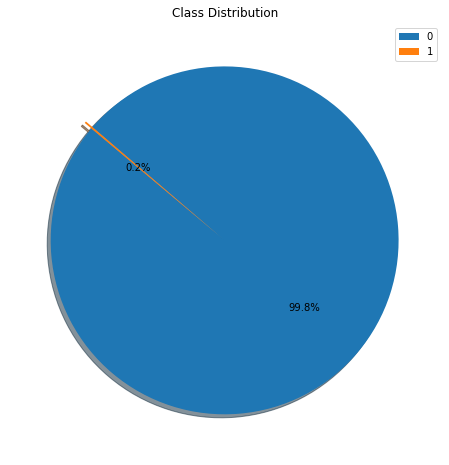

In [11]:
%matplotlib inline
plt.figure(figsize=(8,8))
explode = [0, 0.05]
plt.pie(df[target].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True, startangle=140)
plt.legend(labels=['0','1'])
plt.title('Class Distribution');
# px.pie(df, values=df[target].value_counts(), names=(df[target].value_counts()).index, title=f"Target: {target}").show();  # Pie chart with Plotly
# df[target].value_counts().iplot(kind="bar", title = f"Target: {target}")  # Bar plot with Plotly

Note: We have a severe imbalanced dataset! And we need to focus on fraudulent transactions, which are the more important than reliables in this case.

In [12]:
df.describe().loc[['mean']]

time    v1     v2    v3     v4    v5     v6    v7     v8     v9  \
mean 94811.078 0.006 -0.004 0.002 -0.003 0.002 -0.001 0.002 -0.001 -0.002   

        v10   v11    v12   v13   v14   v15   v16   v17   v18    v19   v20  \
mean -0.001 0.000 -0.001 0.001 0.000 0.001 0.001 0.000 0.002 -0.000 0.000   

        v21    v22   v23   v24    v25   v26   v27   v28  amount  class  
mean -0.000 -0.000 0.000 0.000 -0.000 0.000 0.002 0.001  88.473  0.002

We see that all v values were before standard scaled for PCA analysis, because their mean values are 0.

In [13]:
df.groupby(target).mean()

time     v1     v2     v3     v4     v5     v6     v7     v8  \
class                                                                     
0     94835.058  0.013 -0.010  0.013 -0.010  0.007  0.001  0.010 -0.002   
1     80450.514 -4.498  3.406 -6.730  4.473 -2.957 -1.433 -5.176  0.953   

          v9    v10    v11    v12    v13    v14    v15    v16    v17    v18  \
class                                                                         
0      0.003  0.008 -0.006  0.009  0.001  0.012  0.001  0.008  0.011  0.005   
1     -2.522 -5.453  3.716 -6.103 -0.094 -6.836 -0.073 -4.001 -6.463 -2.157   

         v19    v20    v21    v22    v23    v24    v25   v26   v27   v28  \
class                                                                      
0     -0.001 -0.000 -0.001 -0.000  0.000  0.000 -0.000 0.000 0.001 0.000   
1      0.669  0.405  0.467  0.087 -0.096 -0.107  0.041 0.050 0.214 0.078   

       amount  
class          
0      88.414  
1     123.872

Because of the mean values of class 1 and class 0 are different, we can initialy say that some of v values are important features to classification our target.

In [14]:
cprint('Descriptive statistics according to the "class==1, Fraudulent":',"blue","on_grey", attrs=["bold"])
df[df[target] == 1].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

Descriptive statistics according to the "class==1, Fraudulent":


In [15]:
cprint('Descriptive statistics according to the "class==0, Reliable"',"blue","on_grey", attrs=["bold"])
df[df[target] == 0].describe().T.style.background_gradient(subset = ['mean','min','50%', 'max'], cmap = 'RdPu')

Descriptive statistics according to the "class==0, Reliable"


##### Features

In [16]:
df.columns

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount',
       'class'],
      dtype='object')

###### 1- "time"

In [17]:
feature_col = "time"
cprint(f"Have a first look to {feature_col}:","blue","on_grey", attrs=["bold"])
summary(feature_col)

Have a first look to time:
Column:  time
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  124592
****************************************************************************************************
Value counts: 
3767.000      21
3770.000      20
19912.000     19
3750.000      19
73885.000     17
              ..
127732.000     1
62217.000      1
127739.000     1
127741.000     1
172792.000     1
Name: time, Length: 124592, dtype: int64
****************************************************************************************************


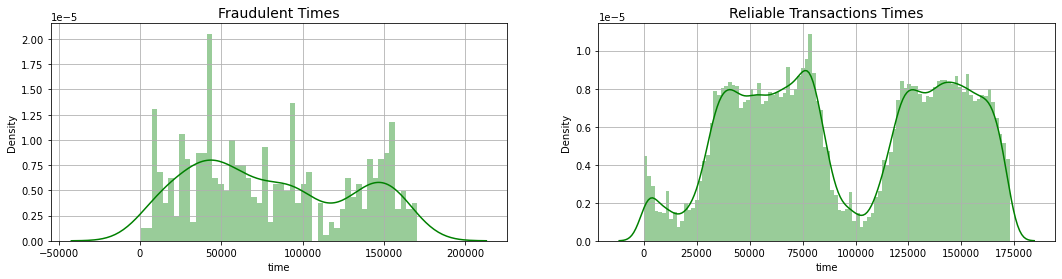

In [18]:
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(df[df[target]==1]["time"], color='g', ax=ax[0], bins=50);
ax[0].set_title('Fraudulent Times', fontsize=14)
ax[0].set_facecolor("white")
ax[0].grid(None) 

sns.distplot(df[df[target]==0]["time"], color='g', ax=ax[1], bins=100);
ax[1].set_title('Reliable Transactions Times', fontsize=14)
ax[1].set_facecolor("white")
ax[1].grid(None) 

In [19]:
# pd.crosstab(df['time'], df[target]).iplot(kind='bar', title = 'time and target')

###### 2- "amount"

In [20]:
feature_col = "amount"
cprint(f"Have a first look to {feature_col}:","blue","on_grey", attrs=["bold"])
summary(feature_col)

Have a first look to amount:
Column:  amount
****************************************************************************************************
Missing values:  0
****************************************************************************************************
Missing values(%):  0.0
****************************************************************************************************
Unique values:  32767
****************************************************************************************************
Value counts: 
1.000      13566
1.980       6044
0.890       4871
9.990       4738
15.000      3280
           ...  
526.600        1
248.160        1
492.650        1
811.500        1
95.630         1
Name: amount, Length: 32767, dtype: int64
****************************************************************************************************


In [21]:
df.groupby(target)["amount"].describe().T

class          0        1
count 283253.000  473.000
mean      88.414  123.872
std      250.379  260.211
min        0.000    0.000
25%        5.670    1.000
50%       22.000    9.820
75%       77.460  105.890
max    25691.160 2125.870

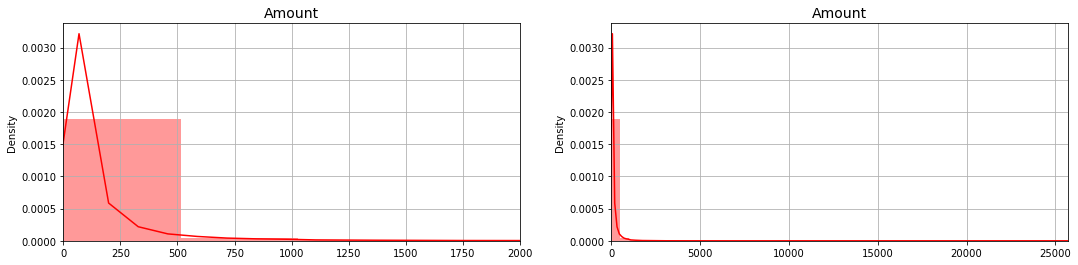

In [22]:
%matplotlib inline

fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(df['amount'].values, color='r', ax=ax[0])
ax[0].set_xlim([min(df['amount'].values), 2000])
ax[0].set_title('Amount', fontsize=14);
ax[0].set_facecolor("white")
ax[0].grid(None) 


sns.distplot(df['amount'].values, color='r', ax=ax[1])
ax[1].set_xlim([min(df['amount'].values), max(df['amount'].values)])
ax[1].set_title('Amount', fontsize=14);
ax[1].set_facecolor("white")
ax[1].grid(None) 

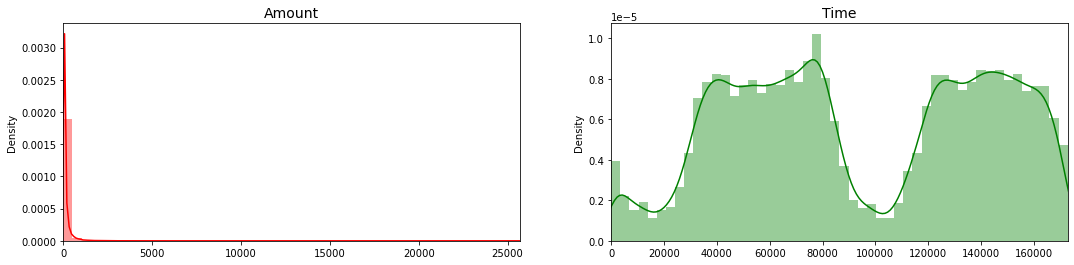

In [23]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

sns.distplot(df['amount'].values, ax=ax[0], color='r')
ax[0].set_title('Amount', fontsize=14)
ax[0].set_xlim([min(df['amount'].values), max(df['amount'].values)])

sns.distplot(df['time'].values, ax=ax[1], color='g')
ax[1].set_title('Time', fontsize=14)
ax[1].set_xlim([min(df['time'].values), max(df['time'].values)])

plt.show();
# ref: https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets/notebook

###### 3- All "v" values

In [24]:
df_skeweds = df.drop([target, "amount"], axis=1).skew()[abs(df.skew()) > 0.8]  
# 0.8 is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
df_skeweds

v1    -3.273
v2    -4.695
v3    -2.152
v5    -2.414
v6     1.830
v7     2.890
v8    -8.311
v10    1.253
v12   -2.199
v14   -1.919
v16   -1.051
v17   -3.690
v20   -2.043
v21    2.820
v23   -5.867
v28   11.555
dtype: float64

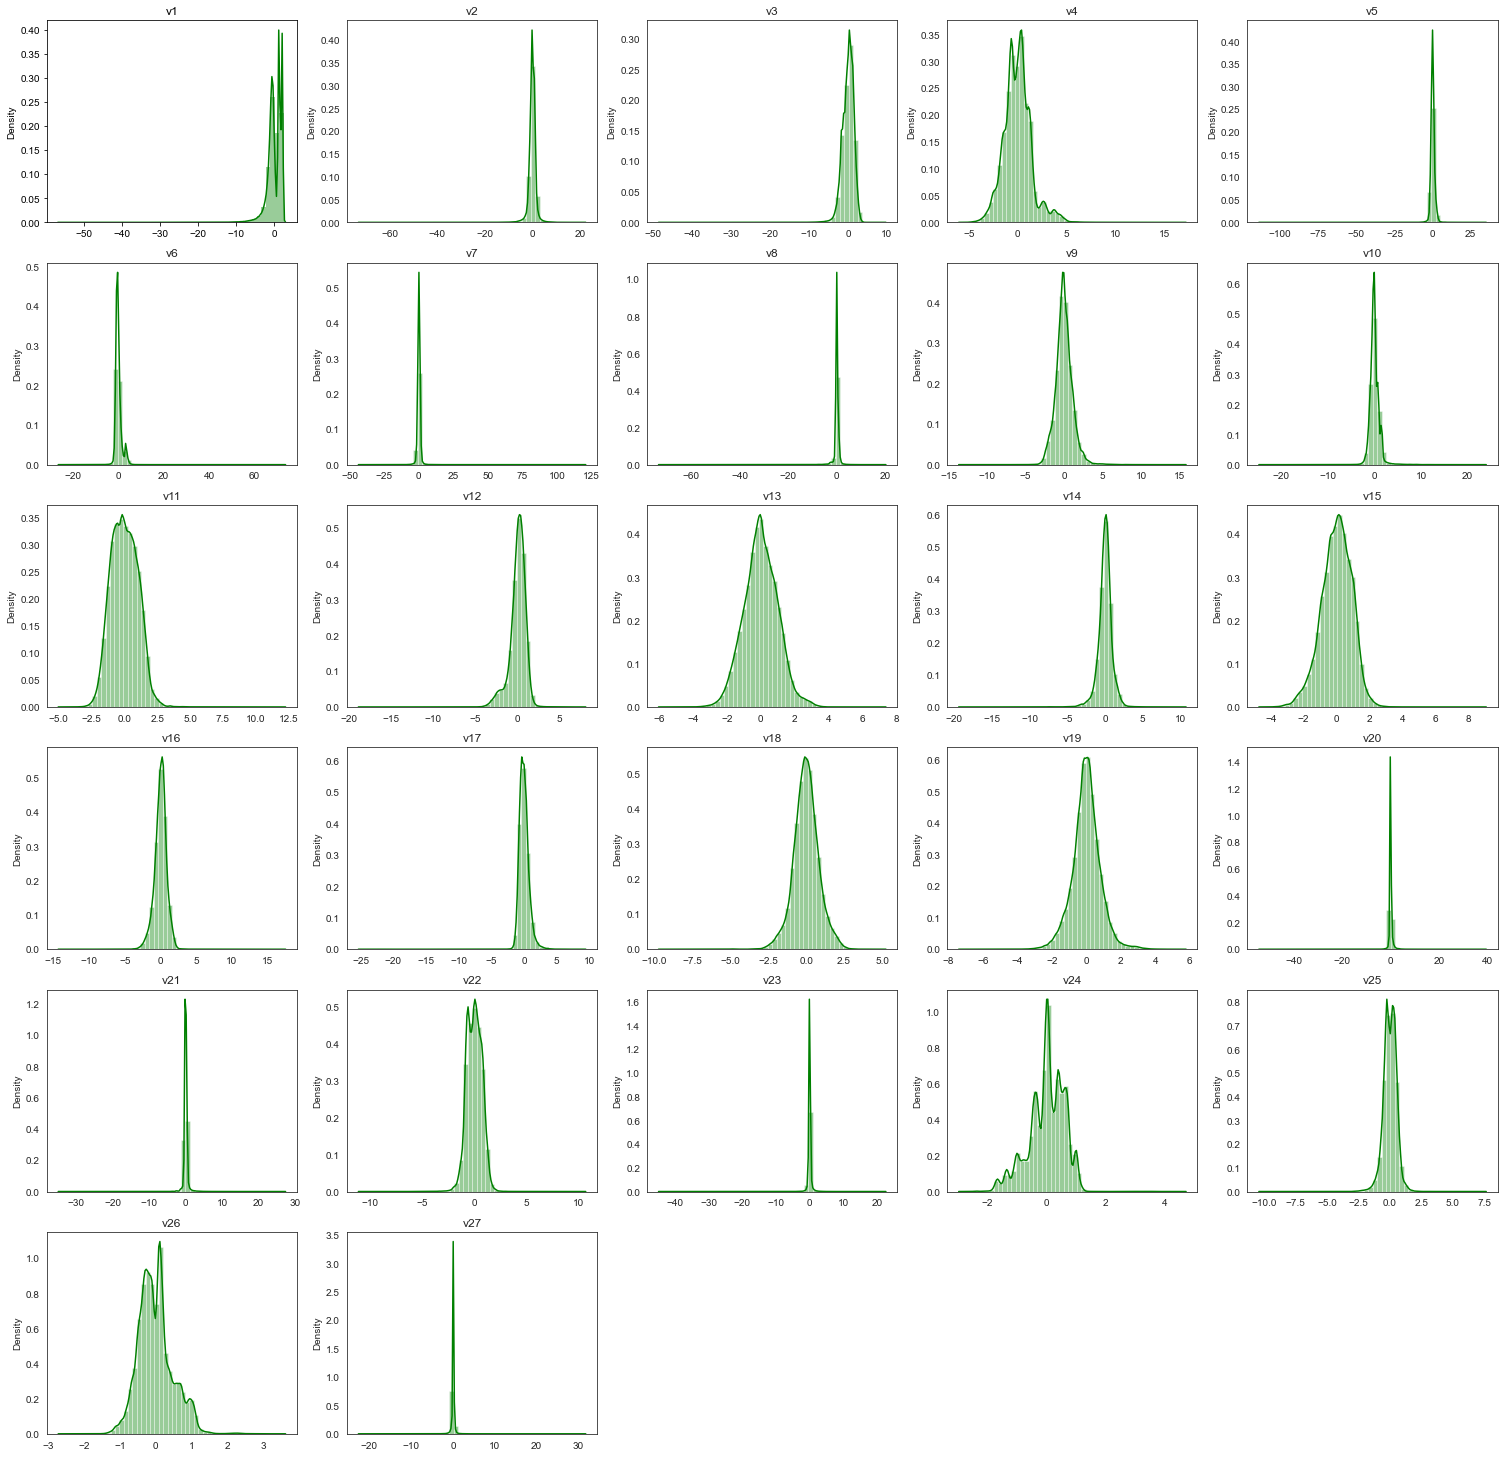

In [25]:
index = 0
plt.figure(figsize=(26, 26))
for v in df.columns[1:28]:
    index += 1
    plt.subplot(6, 5, index)
    sns.distplot(x=df[v], color='g').set(title=v)
    sns.set_style("white", {'axes.grid' : False});

#### The Examination of Correlation

In [26]:
def color(corr_val):
    if corr_val > 0.8 and corr_val < 0.99:
        color = 'red'
    elif corr_val == 1:
        color = "white"
    else:
        color = 'black'
    return f'color: {color}'

In [27]:
# df.corr().corr_matrix.style.applymap(color)
corr_matrix  = df.corr().unstack()
corr_matrix[abs(corr_matrix) >= 0.8]
# https://towardsdatascience.com/prettifying-pandas-dataframes-75c1a1a6877d
# https://datagy.io/python-correlation-matrix/

time    time     1.000
v1      v1       1.000
v2      v2       1.000
v3      v3       1.000
v4      v4       1.000
v5      v5       1.000
v6      v6       1.000
v7      v7       1.000
v8      v8       1.000
v9      v9       1.000
v10     v10      1.000
v11     v11      1.000
v12     v12      1.000
v13     v13      1.000
v14     v14      1.000
v15     v15      1.000
v16     v16      1.000
v17     v17      1.000
v18     v18      1.000
v19     v19      1.000
v20     v20      1.000
v21     v21      1.000
v22     v22      1.000
v23     v23      1.000
v24     v24      1.000
v25     v25      1.000
v26     v26      1.000
v27     v27      1.000
v28     v28      1.000
amount  amount   1.000
class   class    1.000
dtype: float64

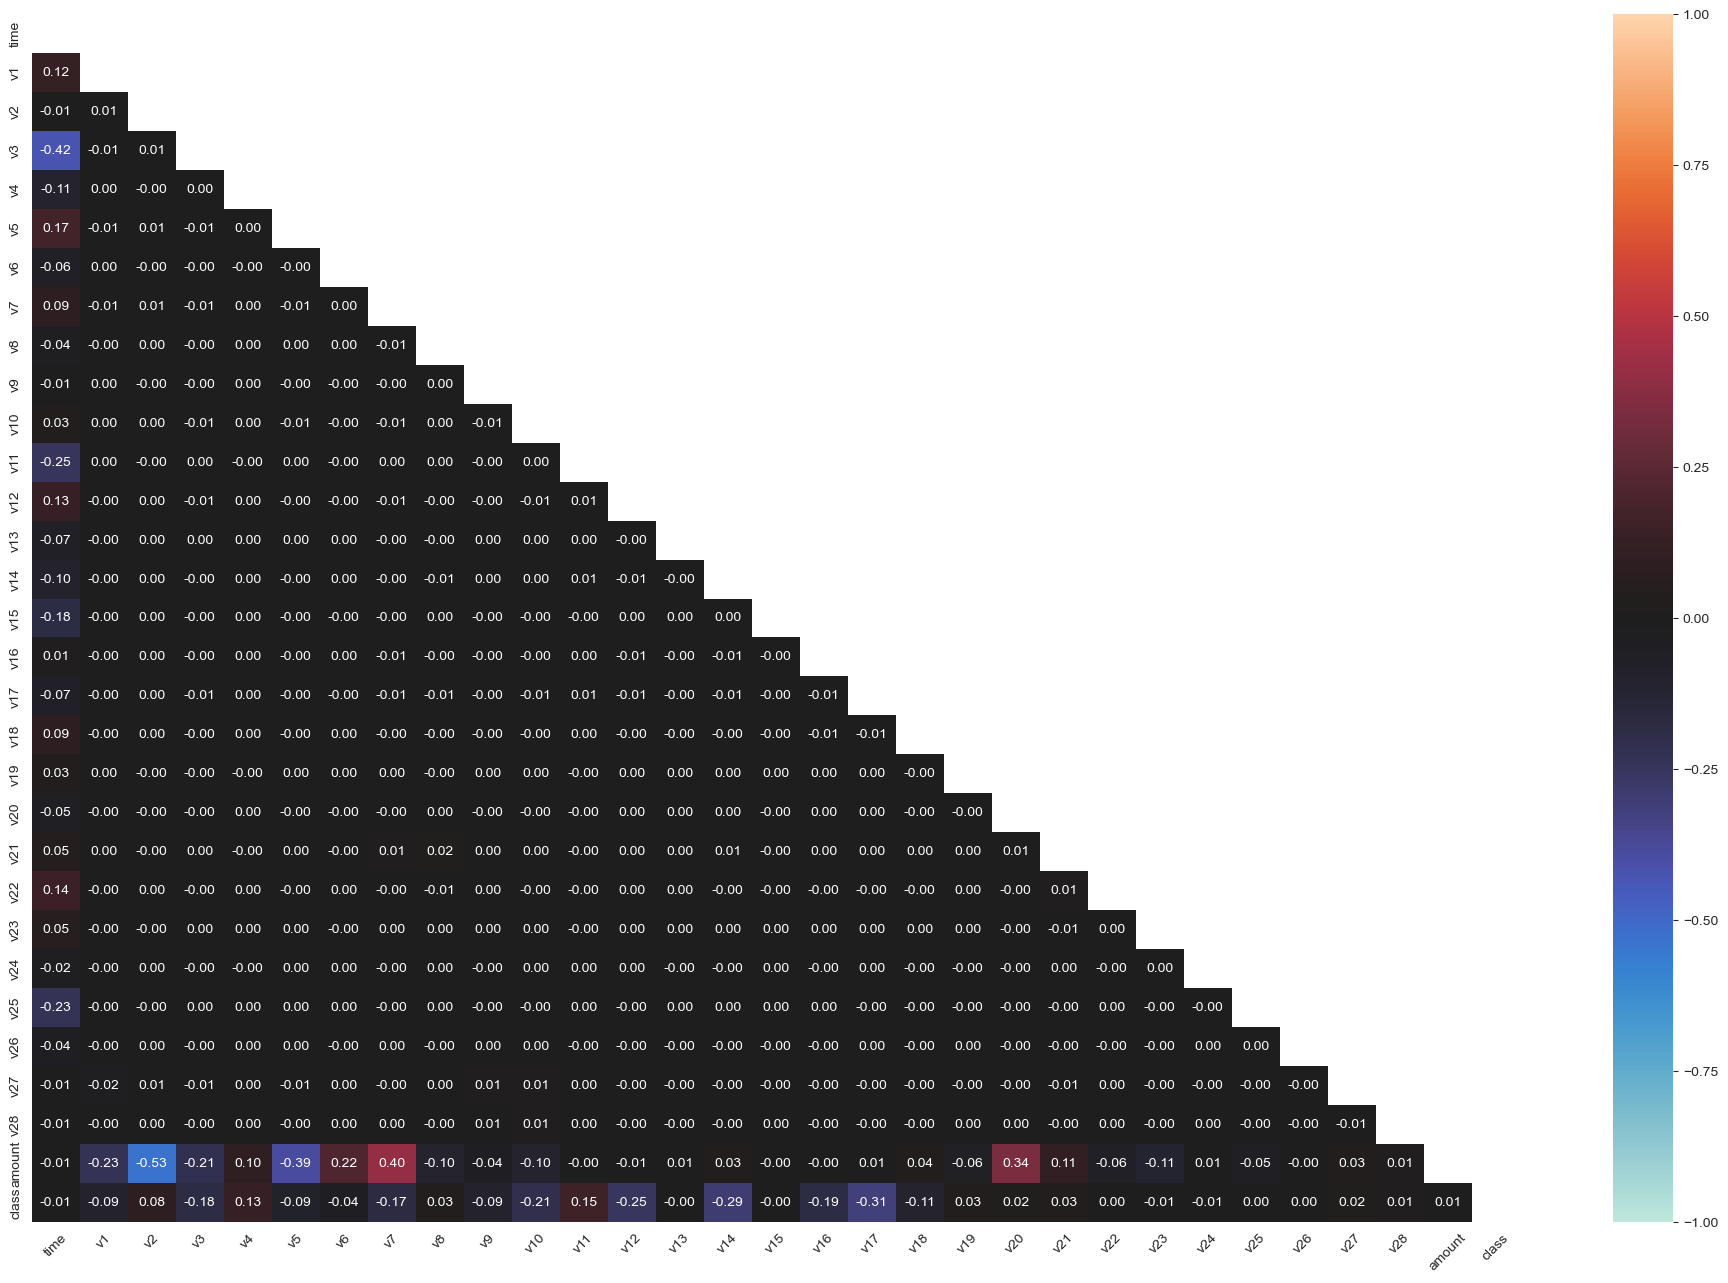

In [28]:
%matplotlib inline
matrix = np.triu(df.corr())
fig, ax = plt.subplots(figsize=(24, 16), dpi=100)
sns.heatmap(df.corr(), annot=True, ax=ax, fmt='.2f', vmin=-1, vmax=1, center=0, mask=matrix)
plt.xticks(rotation=45);

#### The Examination of Multicolinearity

In [29]:
multicolinearity_control(df)

There is NO multicollinearity problem.


In [30]:
# feature==collinear

In [31]:
# df_feature = pd.DataFrame({'feature':feature,'collinear':collinear})
# df_feature

# 2. Exploratory Data Analysis

## 2.1 Handling with Skewness

In [32]:
df_skeweds = df.drop(target, axis=1).skew()[abs(df.skew()) > 0.8]  
# 0.8 is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
df_skeweds

v1       -3.273
v2       -4.695
v3       -2.152
v5       -2.414
v6        1.830
v7        2.890
v8       -8.311
v10       1.253
v12      -2.199
v14      -1.919
v16      -1.051
v17      -3.690
v20      -2.043
v21       2.820
v23      -5.867
v28      11.555
amount   16.979
dtype: float64

In [33]:
for i in df_skeweds:
    if abs(0.8<i<1.4):
        cprint(f"Skewness: {round(i,2)}, moderately skewed.","yellow", attrs=["bold"]) 
    if i<-1.4 or i>1.4:
        cprint(f"Skewness: {round(i,2)}, highly skewed.","red", attrs=["bold"]) 

Skewness: -3.27, highly skewed.
Skewness: -4.7, highly skewed.
Skewness: -2.15, highly skewed.
Skewness: -2.41, highly skewed.
Skewness: 1.83, highly skewed.
Skewness: 2.89, highly skewed.
Skewness: -8.31, highly skewed.
Skewness: 1.25, moderately skewed.
Skewness: -2.2, highly skewed.
Skewness: -1.92, highly skewed.
Skewness: -3.69, highly skewed.
Skewness: -2.04, highly skewed.
Skewness: 2.82, highly skewed.
Skewness: -5.87, highly skewed.
Skewness: 11.56, highly skewed.
Skewness: 16.98, highly skewed.


### 2.1.1 Dealing with Skewness by Log Method

In [34]:
df_log = df[df_skeweds.index]
for i in df_skeweds.index:
    df_log[i] = df_log[i].apply(np.log1p)
df_log.skew()

v1       -1.660
v2       -1.832
v3       -2.103
v5       -1.613
v6       -1.058
v7       -1.863
v8       -1.639
v10      -1.643
v12      -2.437
v14      -2.171
v16      -2.143
v17      -1.670
v20      -1.316
v21      -1.325
v23      -2.096
v28      -5.275
amount    0.161
dtype: float64

In [35]:
for i in df_log.skew():
    if abs(0.8<i<1.4):
        cprint(f"Skewness: {round(i,2)}, moderately skewed.","yellow", attrs=["bold"]) 
    if i<-1.4 or i>1.4:
        cprint(f"Skewness: {round(i,2)}, highly skewed.","red", attrs=["bold"]) 

Skewness: -1.66, highly skewed.
Skewness: -1.83, highly skewed.
Skewness: -2.1, highly skewed.
Skewness: -1.61, highly skewed.
Skewness: -1.86, highly skewed.
Skewness: -1.64, highly skewed.
Skewness: -1.64, highly skewed.
Skewness: -2.44, highly skewed.
Skewness: -2.17, highly skewed.
Skewness: -2.14, highly skewed.
Skewness: -1.67, highly skewed.
Skewness: -2.1, highly skewed.
Skewness: -5.27, highly skewed.


### 2.1.2 Dealing with Skewness by Power Transformer Method

In [36]:
df_trans = PowerTransformer(method='yeo-johnson').fit_transform(df[df_skeweds.index])  # yeo-johnson for negative values
df_trans = pd.DataFrame(df_trans, columns=df_skeweds.index)
df_trans.skew()

v1       -0.219
v2        0.336
v3       -0.079
v5       -1.220
v6       -1.942
v7        2.435
v8        2.361
v10      -1.245
v12       0.157
v14       0.100
v16       0.136
v17      -0.827
v20      -0.933
v21      -1.955
v23      -0.271
v28       0.910
amount    0.018
dtype: float64

In [37]:
for i in df_trans.skew():
    if abs(0.8<i<1.4):
        cprint(f"Skewness: {round(i,2)}, moderately skewed.","yellow", attrs=["bold"]) 
    if i<-1.4 or i>1.4:
        cprint(f"Skewness: {round(i,2)}, highly skewed.","red", attrs=["bold"]) 

Skewness: -1.94, highly skewed.
Skewness: 2.43, highly skewed.
Skewness: 2.36, highly skewed.
Skewness: -1.96, highly skewed.
Skewness: 0.91, moderately skewed.


In [38]:
# df_trans.head(5)

In [39]:
# df.head(5)

In [40]:
df_handled = pd.merge(df[df.columns.difference(df_trans.columns)], df_trans, on=df.index)

In [41]:
df_handled = df_handled[df.columns]
df_handled.head()

time     v1     v2     v3     v4     v5    v6     v7     v8     v9    v10  \
0 0.000 -0.909 -0.131  2.174  1.378 -0.257 0.460  0.196  0.023  0.364  0.132   
1 0.000  0.626  0.095 -0.034  0.448  0.031 0.047 -0.064  0.009 -0.255 -0.113   
2 1.000 -0.908 -0.874  1.381  0.380 -0.376 1.322  0.644  0.176 -1.515  0.241   
3 1.000 -0.746 -0.203  1.401 -0.863 -0.020 0.984  0.194  0.314 -1.387 -0.005   
4 2.000 -0.827  0.536  1.161  0.403 -0.307 0.188  0.483 -0.333  0.818  0.730   

     v11    v12    v13    v14    v15    v16    v17    v18    v19    v20  \
0 -0.552 -0.775 -0.991 -0.405  1.468 -0.602  0.219  0.026  0.404  0.324   
1  1.613  1.301  0.489 -0.232  0.636  0.492 -0.174 -0.183 -0.146 -0.094   
2  0.625 -0.104  0.717 -0.255  2.346 -2.824  1.388 -0.121 -2.262  0.681   
3 -0.226  0.029  0.508 -0.382 -0.631 -1.198 -0.833  1.966 -1.233 -0.274   
4 -0.823  0.499  1.346 -1.174  0.175 -0.582 -0.319 -0.038  0.803  0.529   

     v21    v22    v23    v24    v25    v26    v27    v28  amount  class  
0 -0.009  0.278 -0.190  0.067  0.129 -0.189  0.134 -0.055   1.118      0  
1 -0.303 -0.639  0.153 -0.340  0.167  0.126 -0.009  0.057  -1.129      0  
2  0.361  0.772  1.503 -0.689 -0.328 -0.139 -0.055 -0.177   1.622      0  
3 -0.136  0.005 -0.318 -1.176  0.647 -0.222  0.063  0.202   1.011      0  
4  0.003  0.798 -0.233  0.141 -0.206  0.502  0.219  0.674   0.692      0

We could also apply PowerTransform to all dataset. But we would like to show dealing with skewness problem with diffrent techniques and merge process.

We will not use _df data, handled in terms of skewness, but we would like to keep it as a reference for further studies.

## 2.2 Data Cleaning
Checking Missing Values and Outliers

In [42]:
missing_values(df)
# there are no missing values

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

## 2.3 Handling with Outliers

### 2.3.1 The Examination of Outliers & Anomalies

In [43]:
df.columns[0:30]

Index(['time', 'v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10',
       'v11', 'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20',
       'v21', 'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount'],
      dtype='object')

In [ ]:
plt.figure(figsize=(30, 8))
# sns.boxplot(data=df.loc[:, (df.columns!='time') & (df.columns!='amount') & (df.columns!='class')], whis=3)
sns.boxplot(data=df[df.columns[1:29]].values, whis=3)
sns.set_style("white", {'axes.grid' : False});

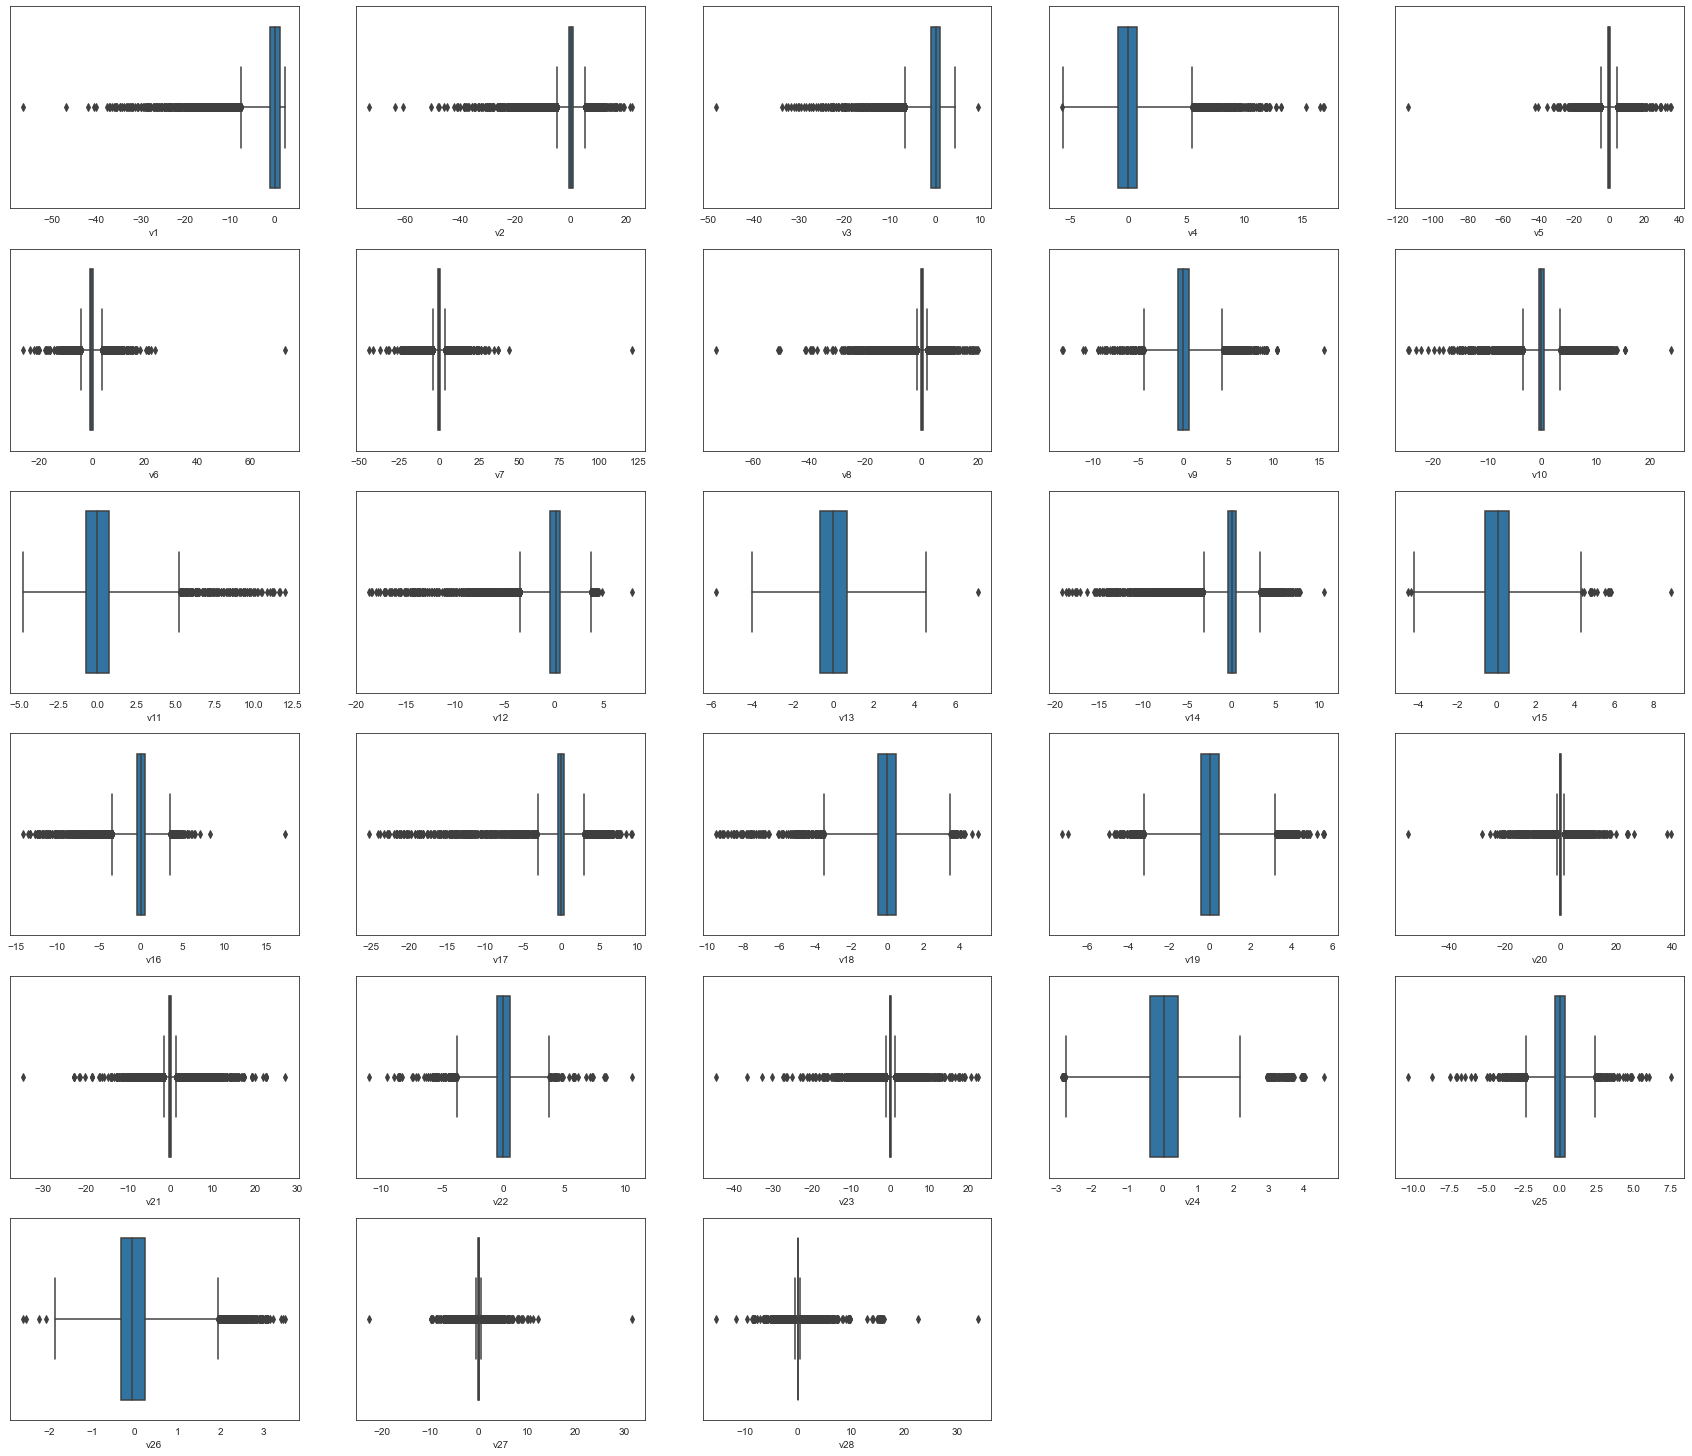

In [60]:
%matplotlib inline
index = 0
plt.figure(figsize=(30, 26))
sns.set_style("white", {'axes.grid' : False}); # to get rid of grid lines
for v in df.columns[1:29]:
    index += 1
    plt.subplot(6, 5, index)
    sns.boxplot(x=v, data=df, whis=3)

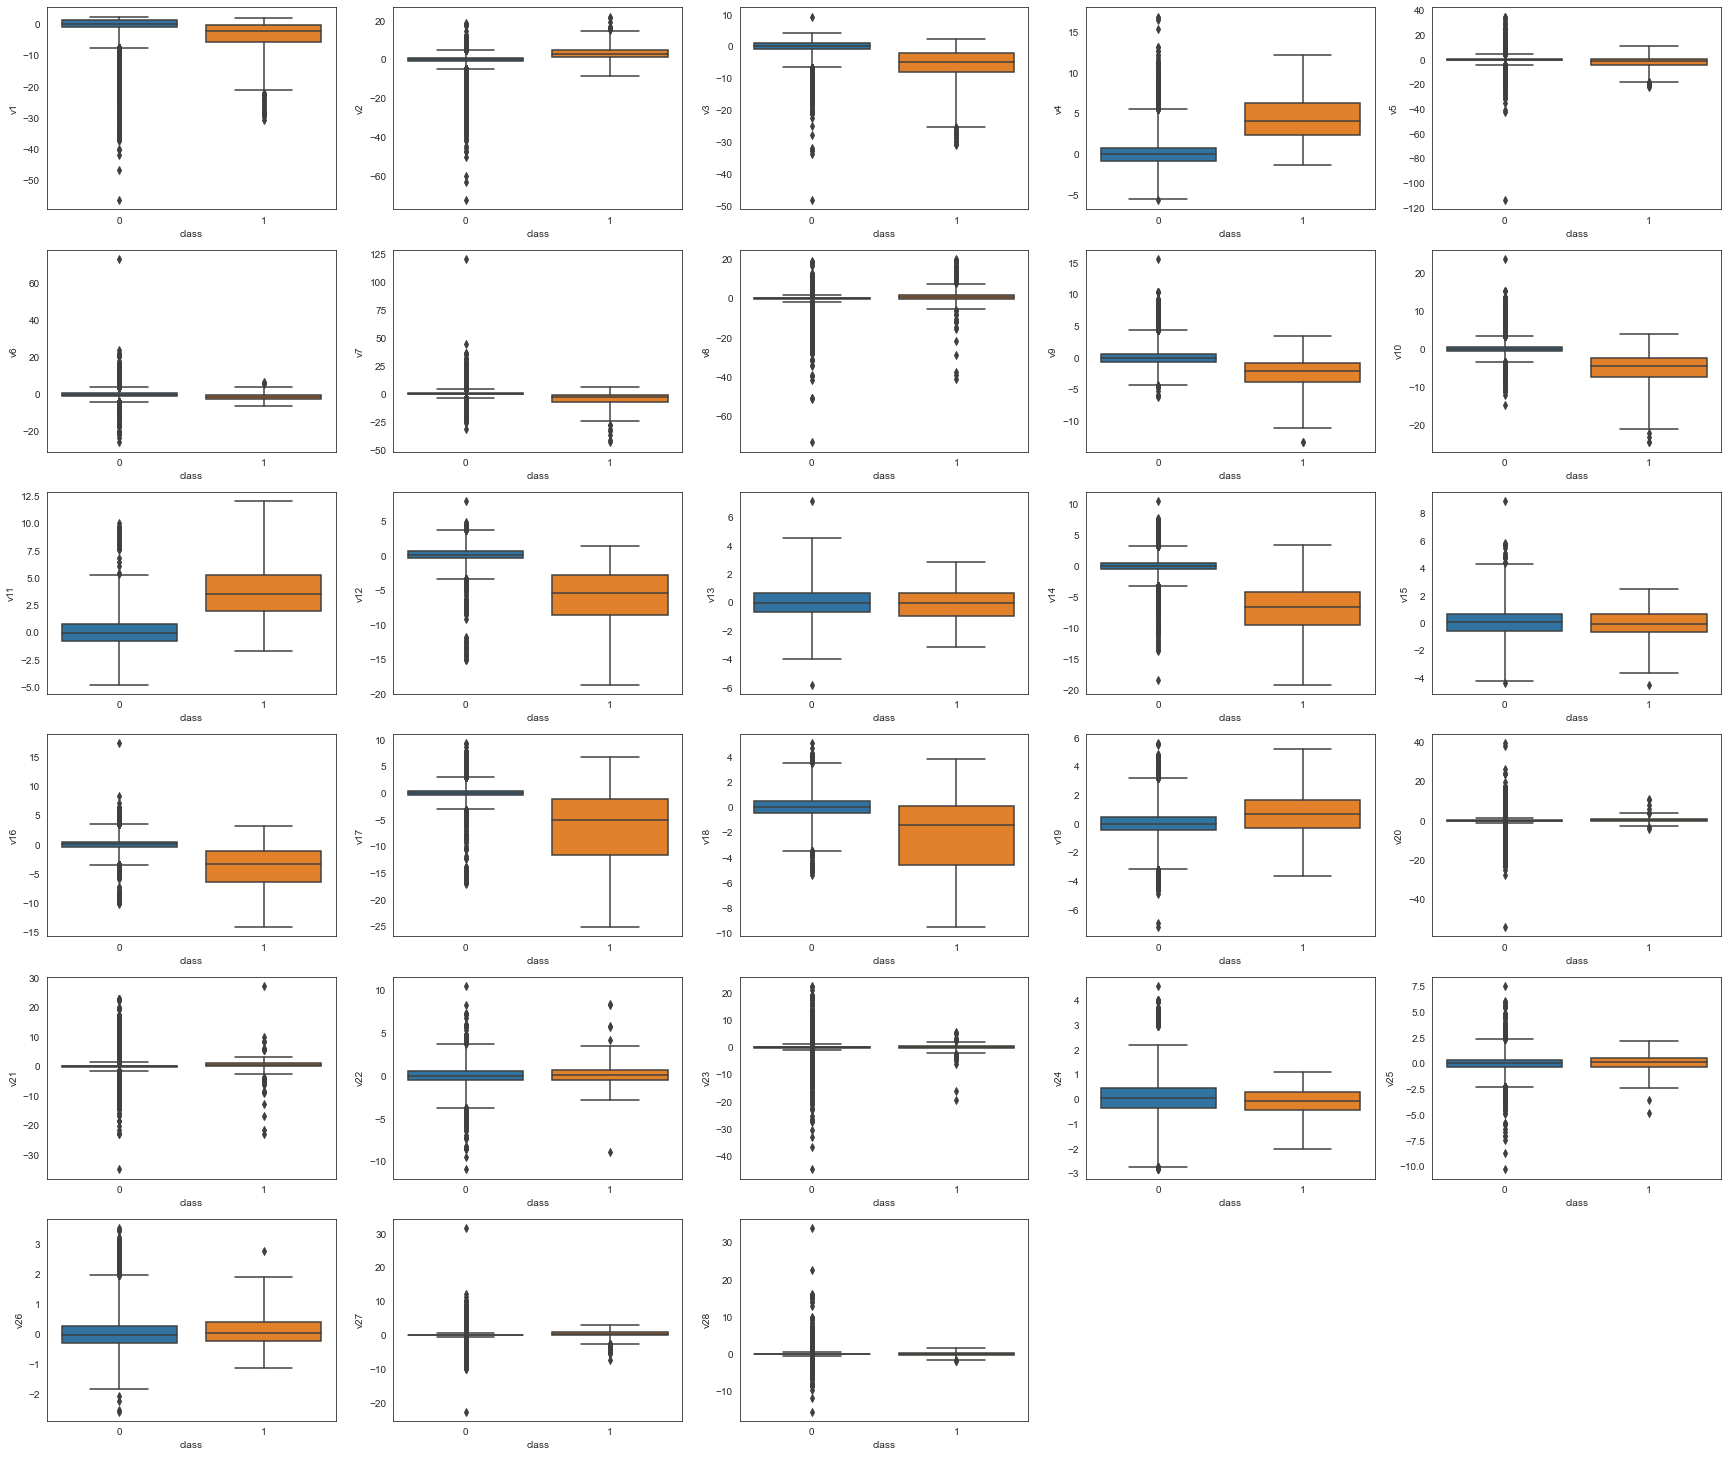

In [61]:
index = 0
plt.figure(figsize=(30, 26))
sns.set_style("white", {'axes.grid' : False});
for v in df.columns[1:29]:
    index += 1
    plt.subplot(6, 5, index)
    sns.boxplot(y=v, x=target, data=df, whis=3)

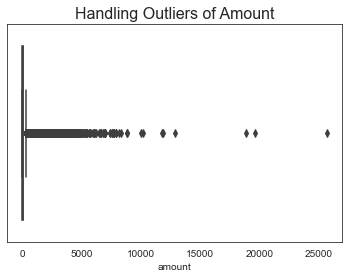

In [62]:
%matplotlib inline
sns.boxplot(x="amount", data=df, whis=3).set_title("Handling Outliers of Amount", fontsize=16);

In [63]:
df.columns[1:30]

Index(['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'v7', 'v8', 'v9', 'v10', 'v11',
       'v12', 'v13', 'v14', 'v15', 'v16', 'v17', 'v18', 'v19', 'v20', 'v21',
       'v22', 'v23', 'v24', 'v25', 'v26', 'v27', 'v28', 'amount'],
      dtype='object')

v1 



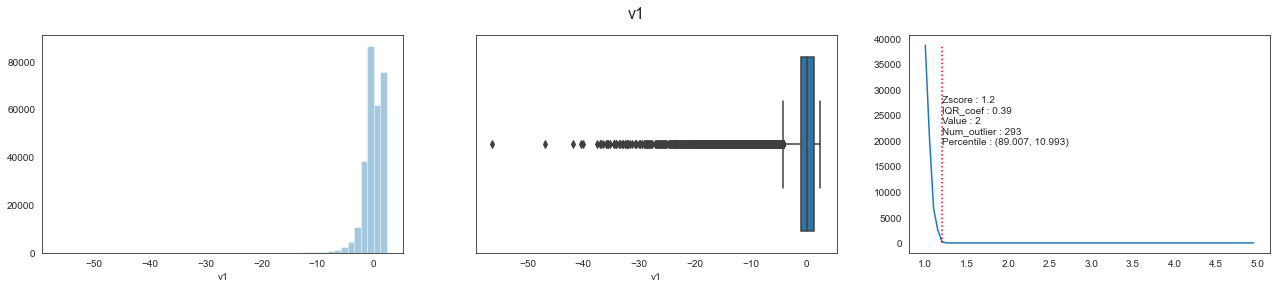

v2 



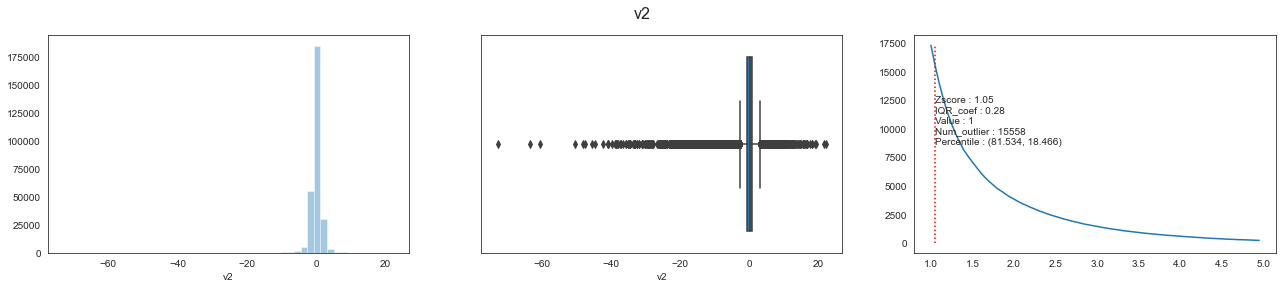

v3 



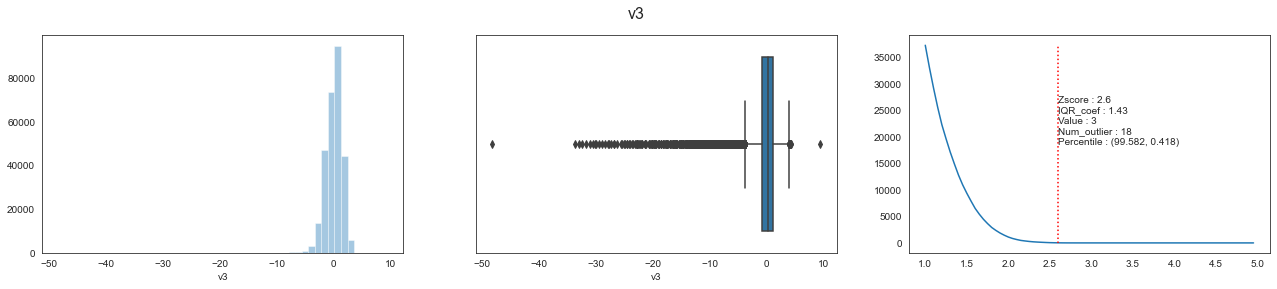

v4 



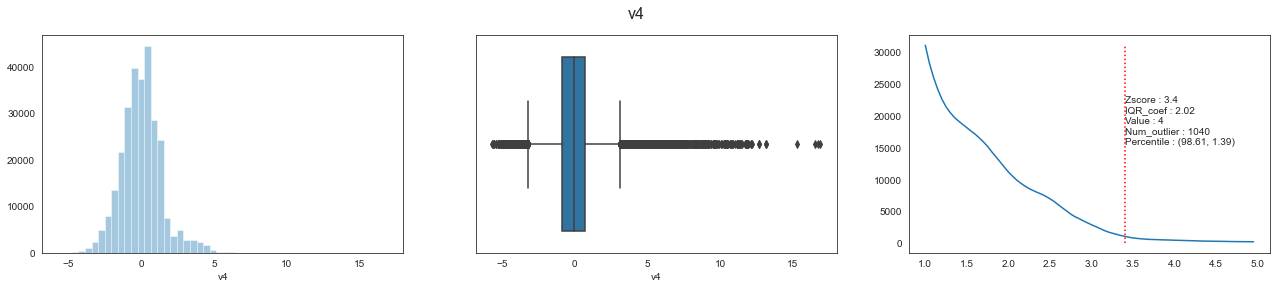

v5 



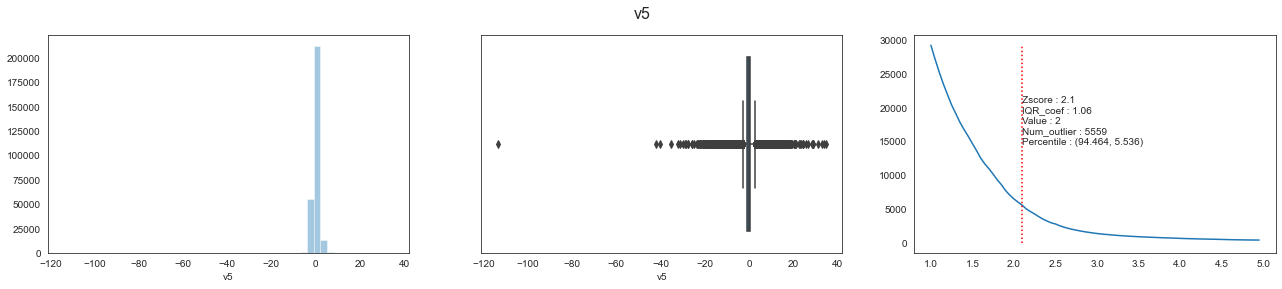

v6 



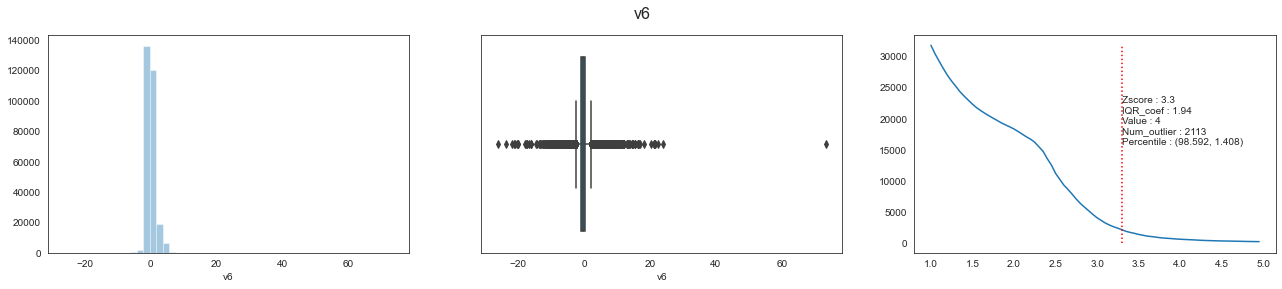

v7 



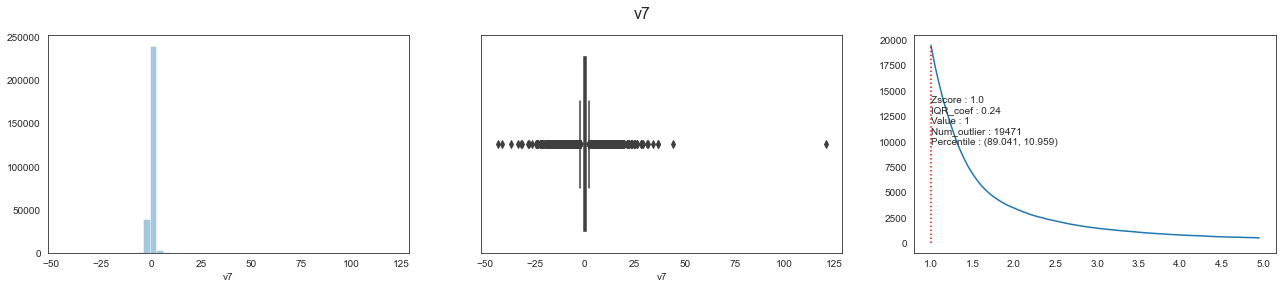

v8 



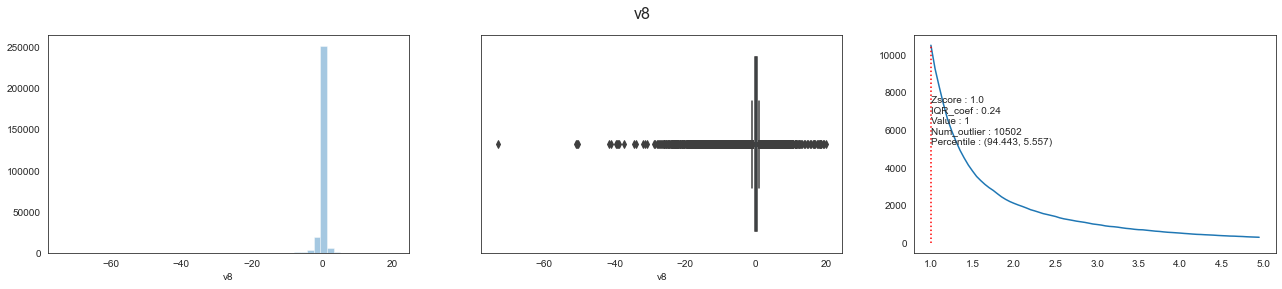

v9 



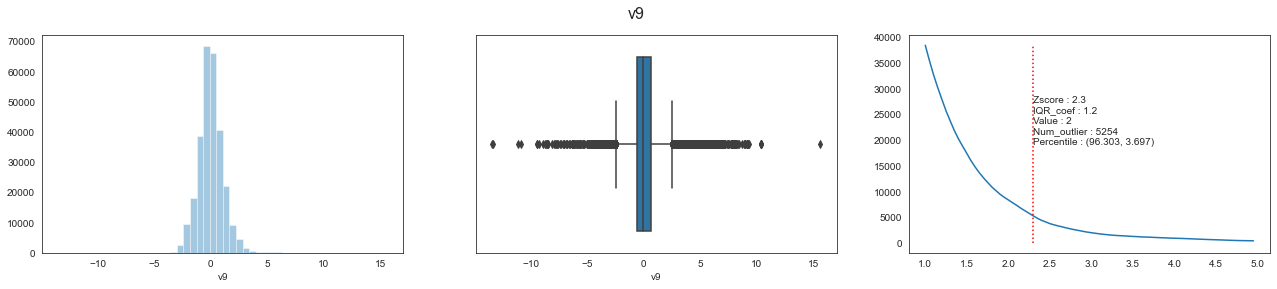

v10 



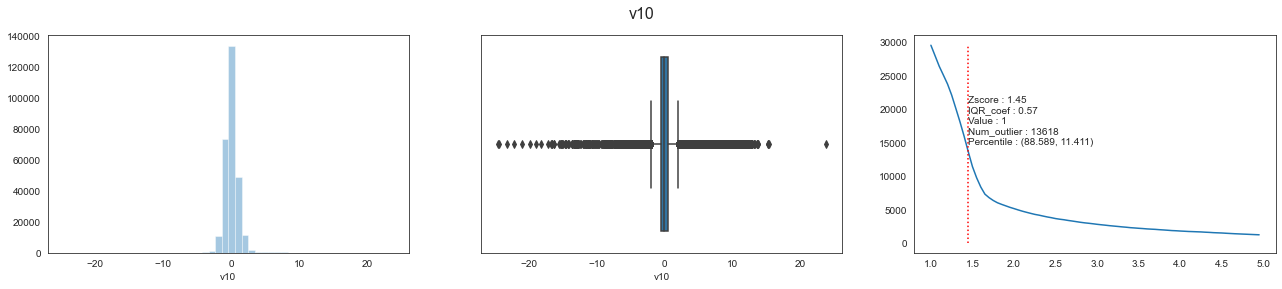

v11 



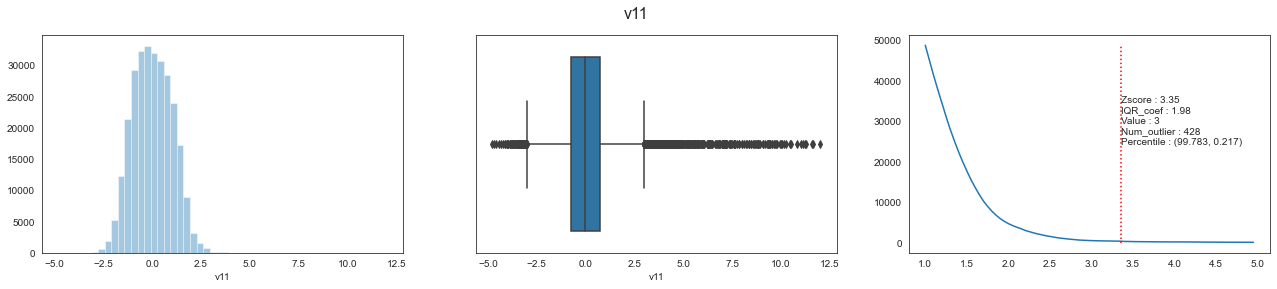

v12 



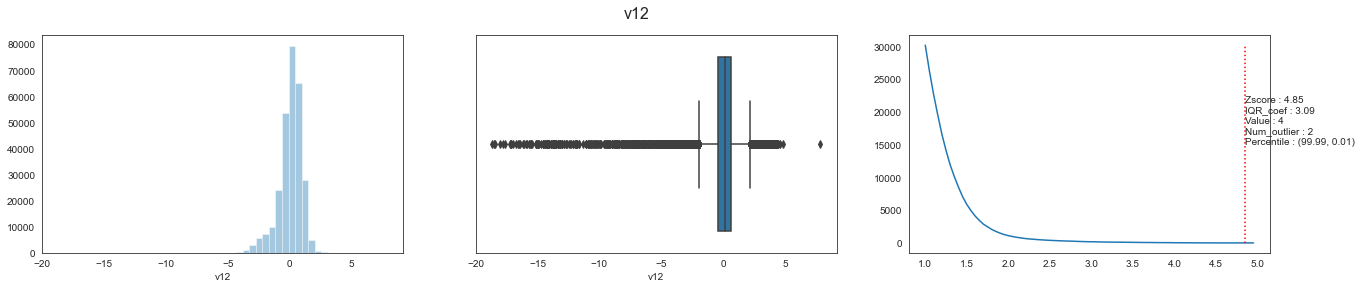

v13 



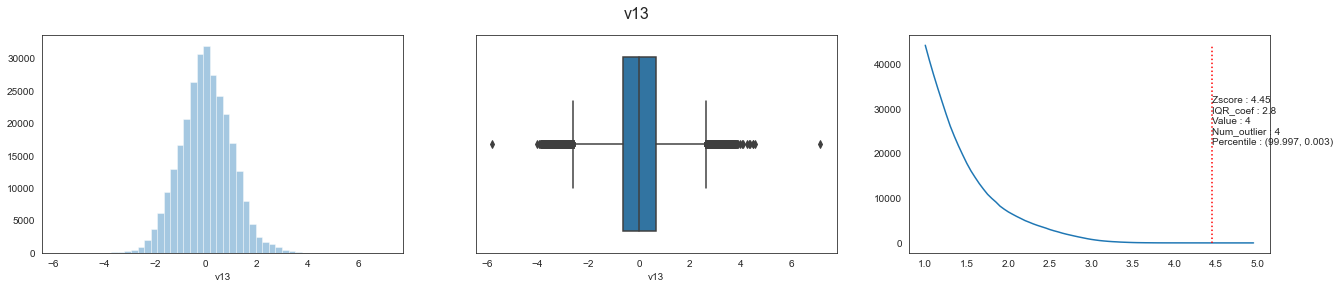

v14 



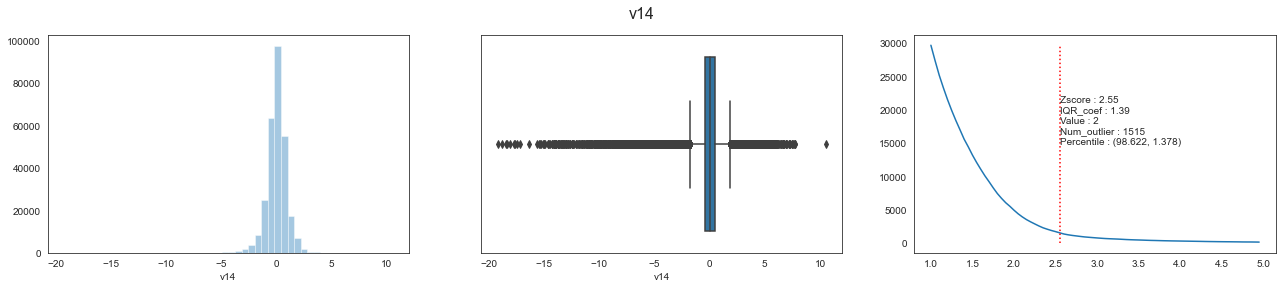

v15 



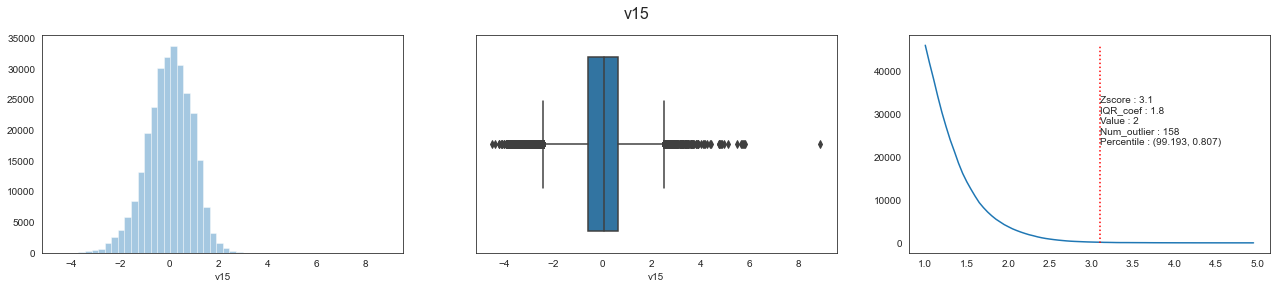

v16 



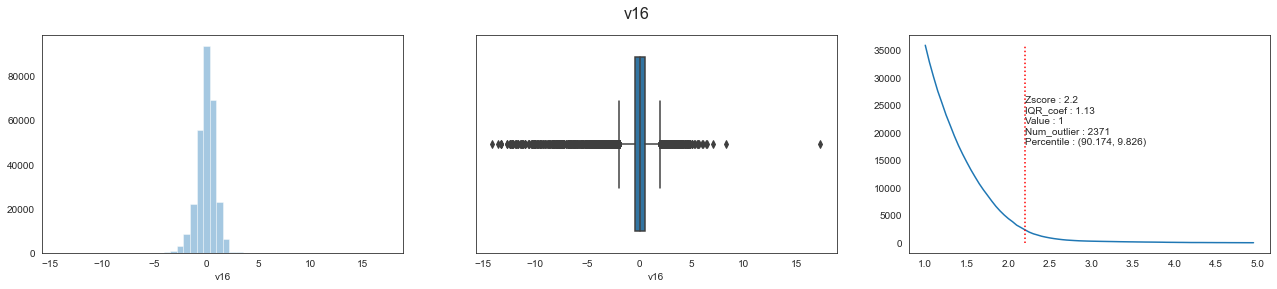

v17 



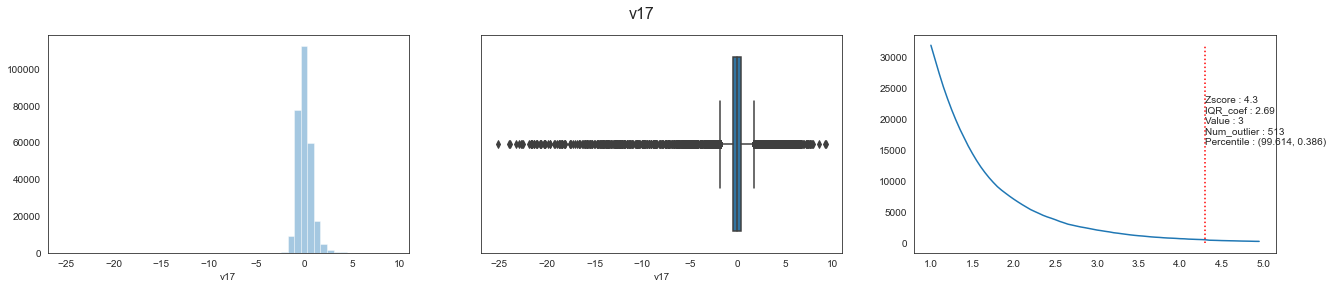

v18 



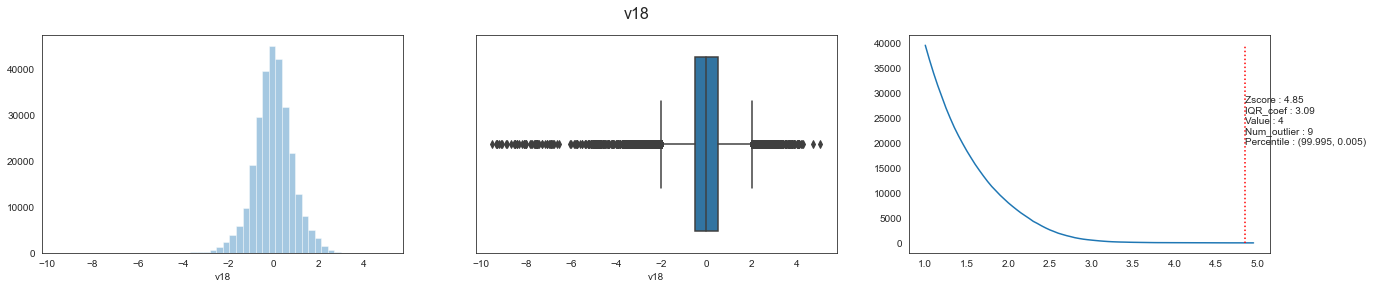

v19 



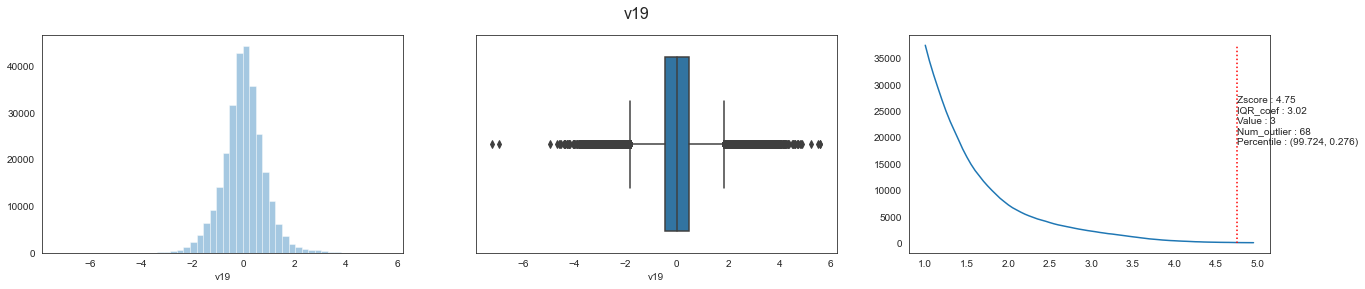

v20 



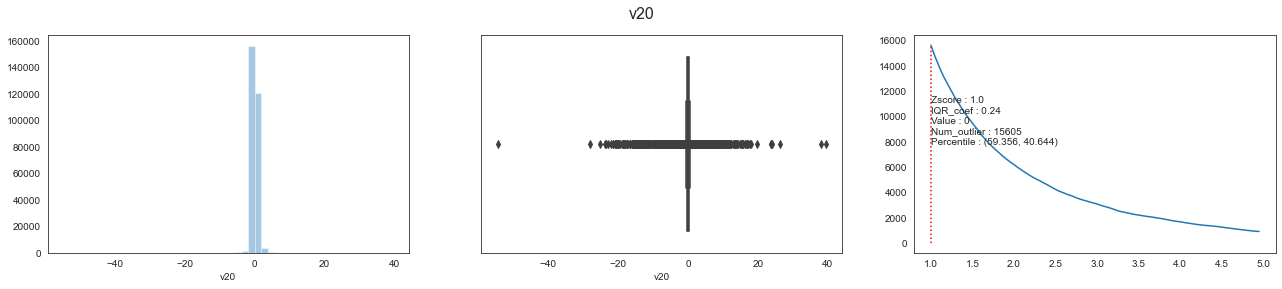

v21 



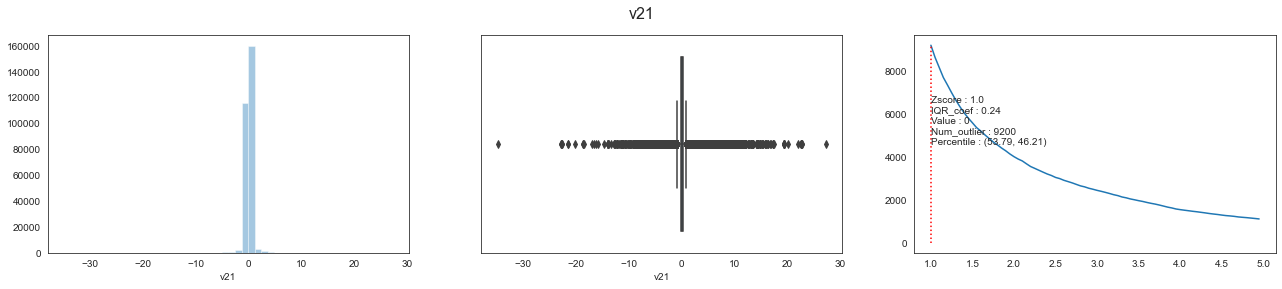

v22 



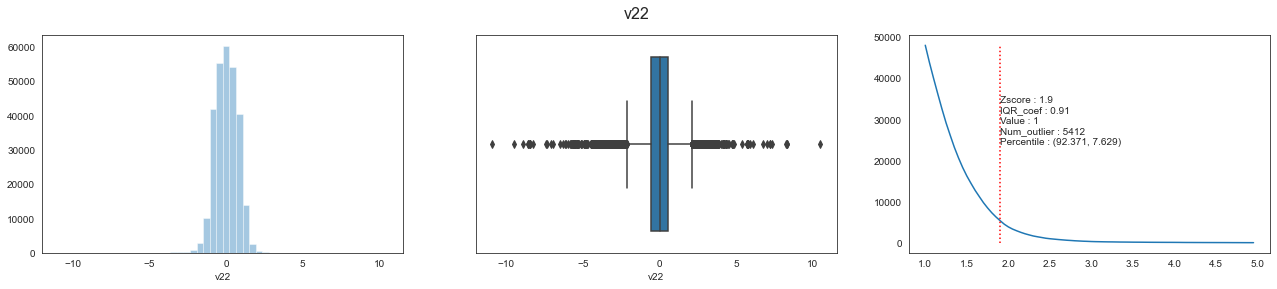

v23 



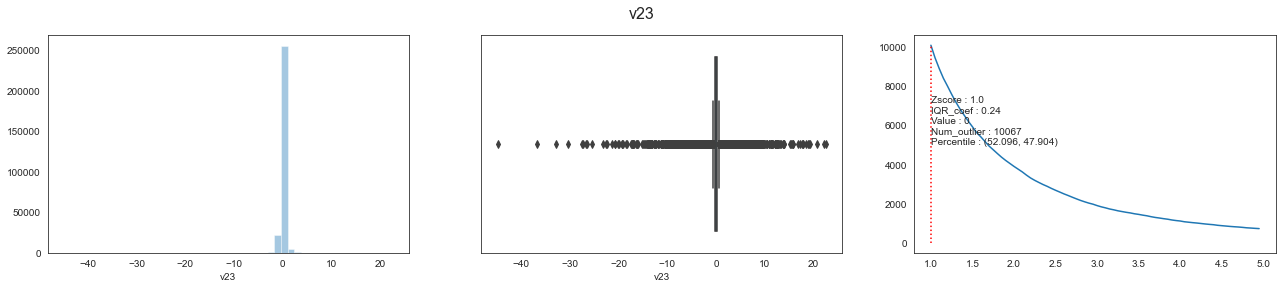

v24 



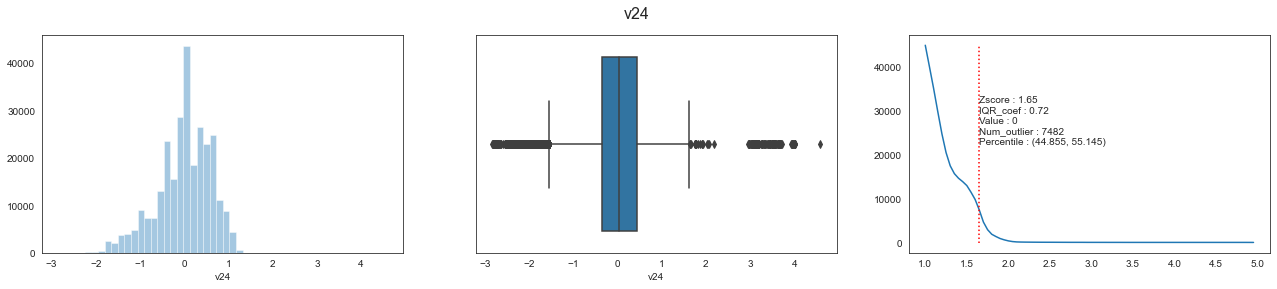

v25 



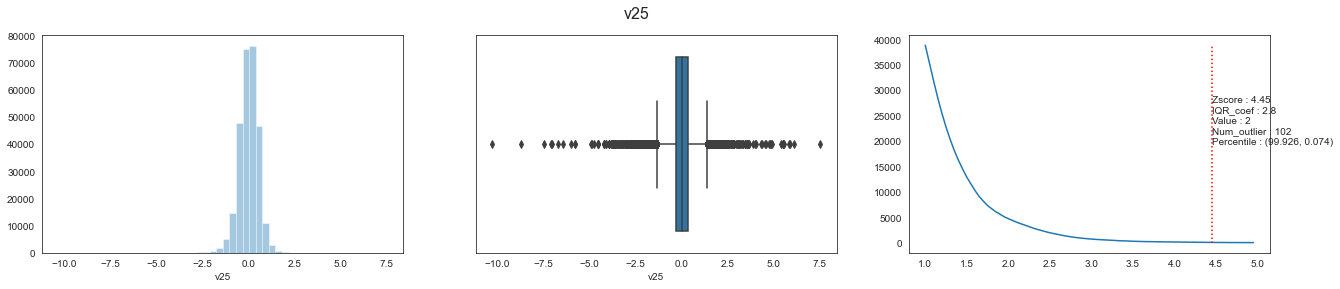

v26 



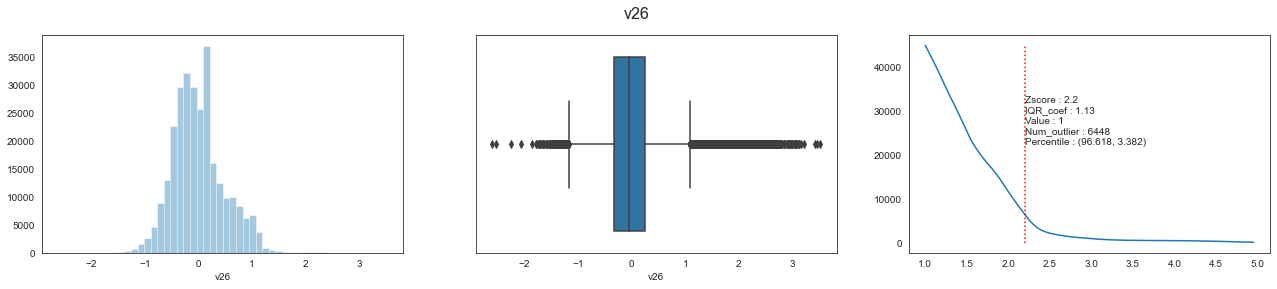

v27 



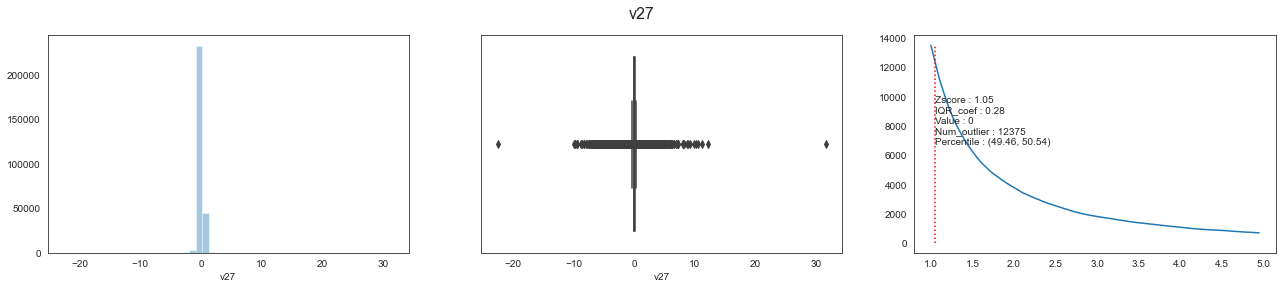

v28 



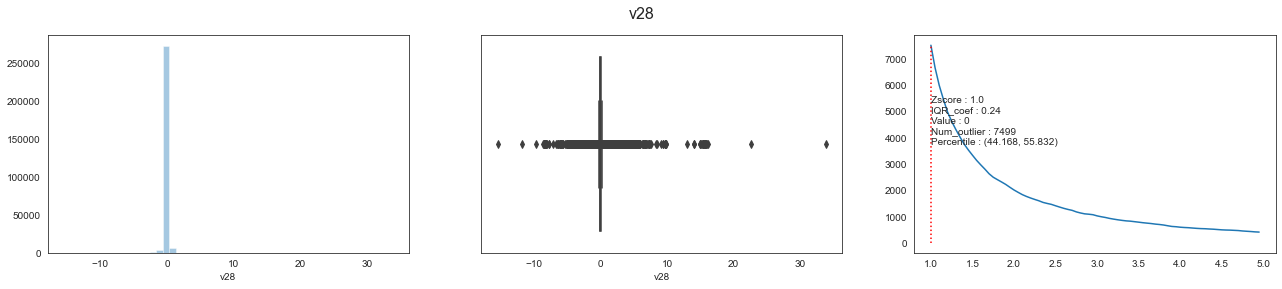

amount 



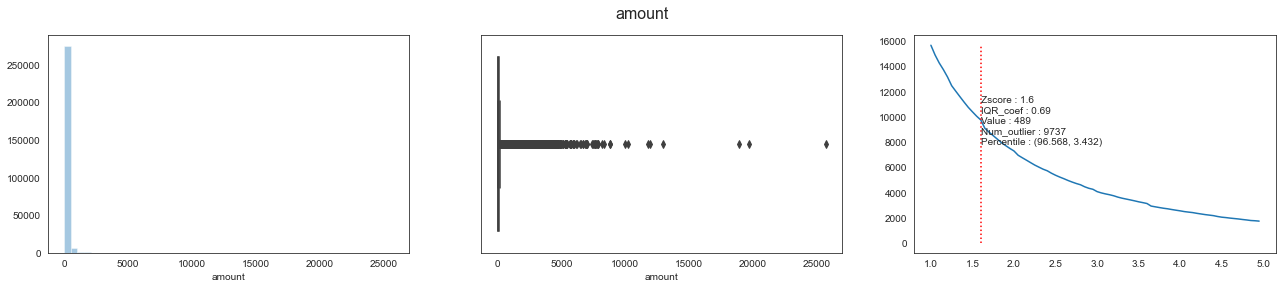

In [64]:
for col in df.columns[1:30]:
    print(col, "\n")
    outlier_inspect(df, col)


In [65]:
IQR_coef = 3
z_score = round(0.675 + IQR_coef*1.35, 2)
z_score

4.73

In [66]:
z_score = 3
iqr_coef = round((z_score - 0.675) / 1.35, 2)
iqr_coef

1.72

In [67]:
df.shape

(283726, 31)

In [68]:
df[target].value_counts()

0    283253
1       473
Name: class, dtype: int64

In [69]:
missing_values(df)

Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []

Column Name: v1
whis: 3
-------------------------------------------
min_threshold: -7.604089690316541 
max_threshold: 8.007446923764526
Num_of_values for 0 : 283253
Num_of_outliers for 0 : 1870
-------------------------------------------
min_threshold: -21.330477603798716 
max_threshold: 15.365359485400905
Num_of_values for 1 : 473
Num_of_outliers for 1 : 19
-------------------------------------------
Column Name: v2
whis: 3
-------------------------------------------
min_threshold: -4.796627511937092 
max_threshold: 4.992241486644909
Num_of_values for 0 : 283253
Num_of_outliers for 0 : 4330
-------------------------------------------
min_threshold: -9.13370526362269 
max_threshold: 14.85082955491482
Num_of_values for 1 : 473
Num_of_outliers for 1 : 12
-------------------------------------------
Column Name: v3
whis: 3
-------------------------------------------
min_threshold: -6.620648975136031 
max_threshold: 6.764944223798885
Num_of_values for 0 : 283253
Num_of_outliers for 0 : 599


Num_of_values for 0 : 283253
Num_of_outliers for 0 : 6761
-------------------------------------------
min_threshold: -3.4663407471882692 
max_threshold: 4.686969254757649
Num_of_values for 1 : 473
Num_of_outliers for 1 : 23
-------------------------------------------
Column Name: v22
whis: 3
-------------------------------------------
min_threshold: -3.755353909843568 
max_threshold: 3.740752815770414
Num_of_values for 0 : 283253
Num_of_outliers for 0 : 180
-------------------------------------------
min_threshold: -3.936883462190517 
max_threshold: 4.031332325372906
Num_of_values for 1 : 473
Num_of_outliers for 1 : 6
-------------------------------------------
Column Name: v23
whis: 3
-------------------------------------------
min_threshold: -1.088860637925542 
max_threshold: 1.075003512755236
Num_of_values for 0 : 283253
Num_of_outliers for 0 : 8047
-------------------------------------------
min_threshold: -2.230500525486926 
max_threshold: 2.176278715195732
Num_of_values for 1 : 4

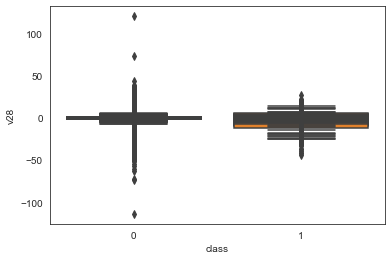

In [70]:
for col in df.columns[1:29]:
    num_outliers(df, col, whis=3)

### 2.3.2 Dealing with Extreme Outliers by whis=3

We have already tried different IQR(whis) values and saw that some outliers are important for our model success. For this reason, we preferred to keep the values ​​between 1.5 IQR and 3 IQR in the dataset instead of discarding them. But we also would like to deal all outliers that's why we applied Robust scaling and Power Transform in next steps.




Shape before handling: (283726, 31)
All Outliers: 114122
Unique Outliers by Rows: 52732
Outliers after remove: 0
Shape after handling: (230994, 31) 



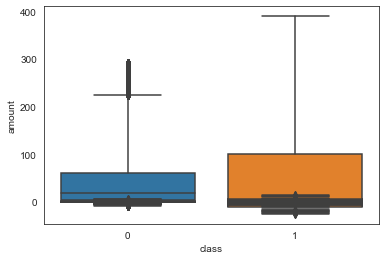

In [71]:
df_ = df.copy()  # df:raw dataset, duplicates were removed

print("Shape before handling:", df_.shape)
for col in df_.columns[1:30]:
    remove_outliers(df_, col, whis=3)
print("All Outliers:", df_.isnull().sum().sum())
print("Unique Outliers by Rows:", df_.isnull().any(axis=1).sum())
df_.dropna(inplace=True)
print("Outliers after remove:", df_.isnull().sum().sum())
print("Shape after handling:", df_.shape, "\n")

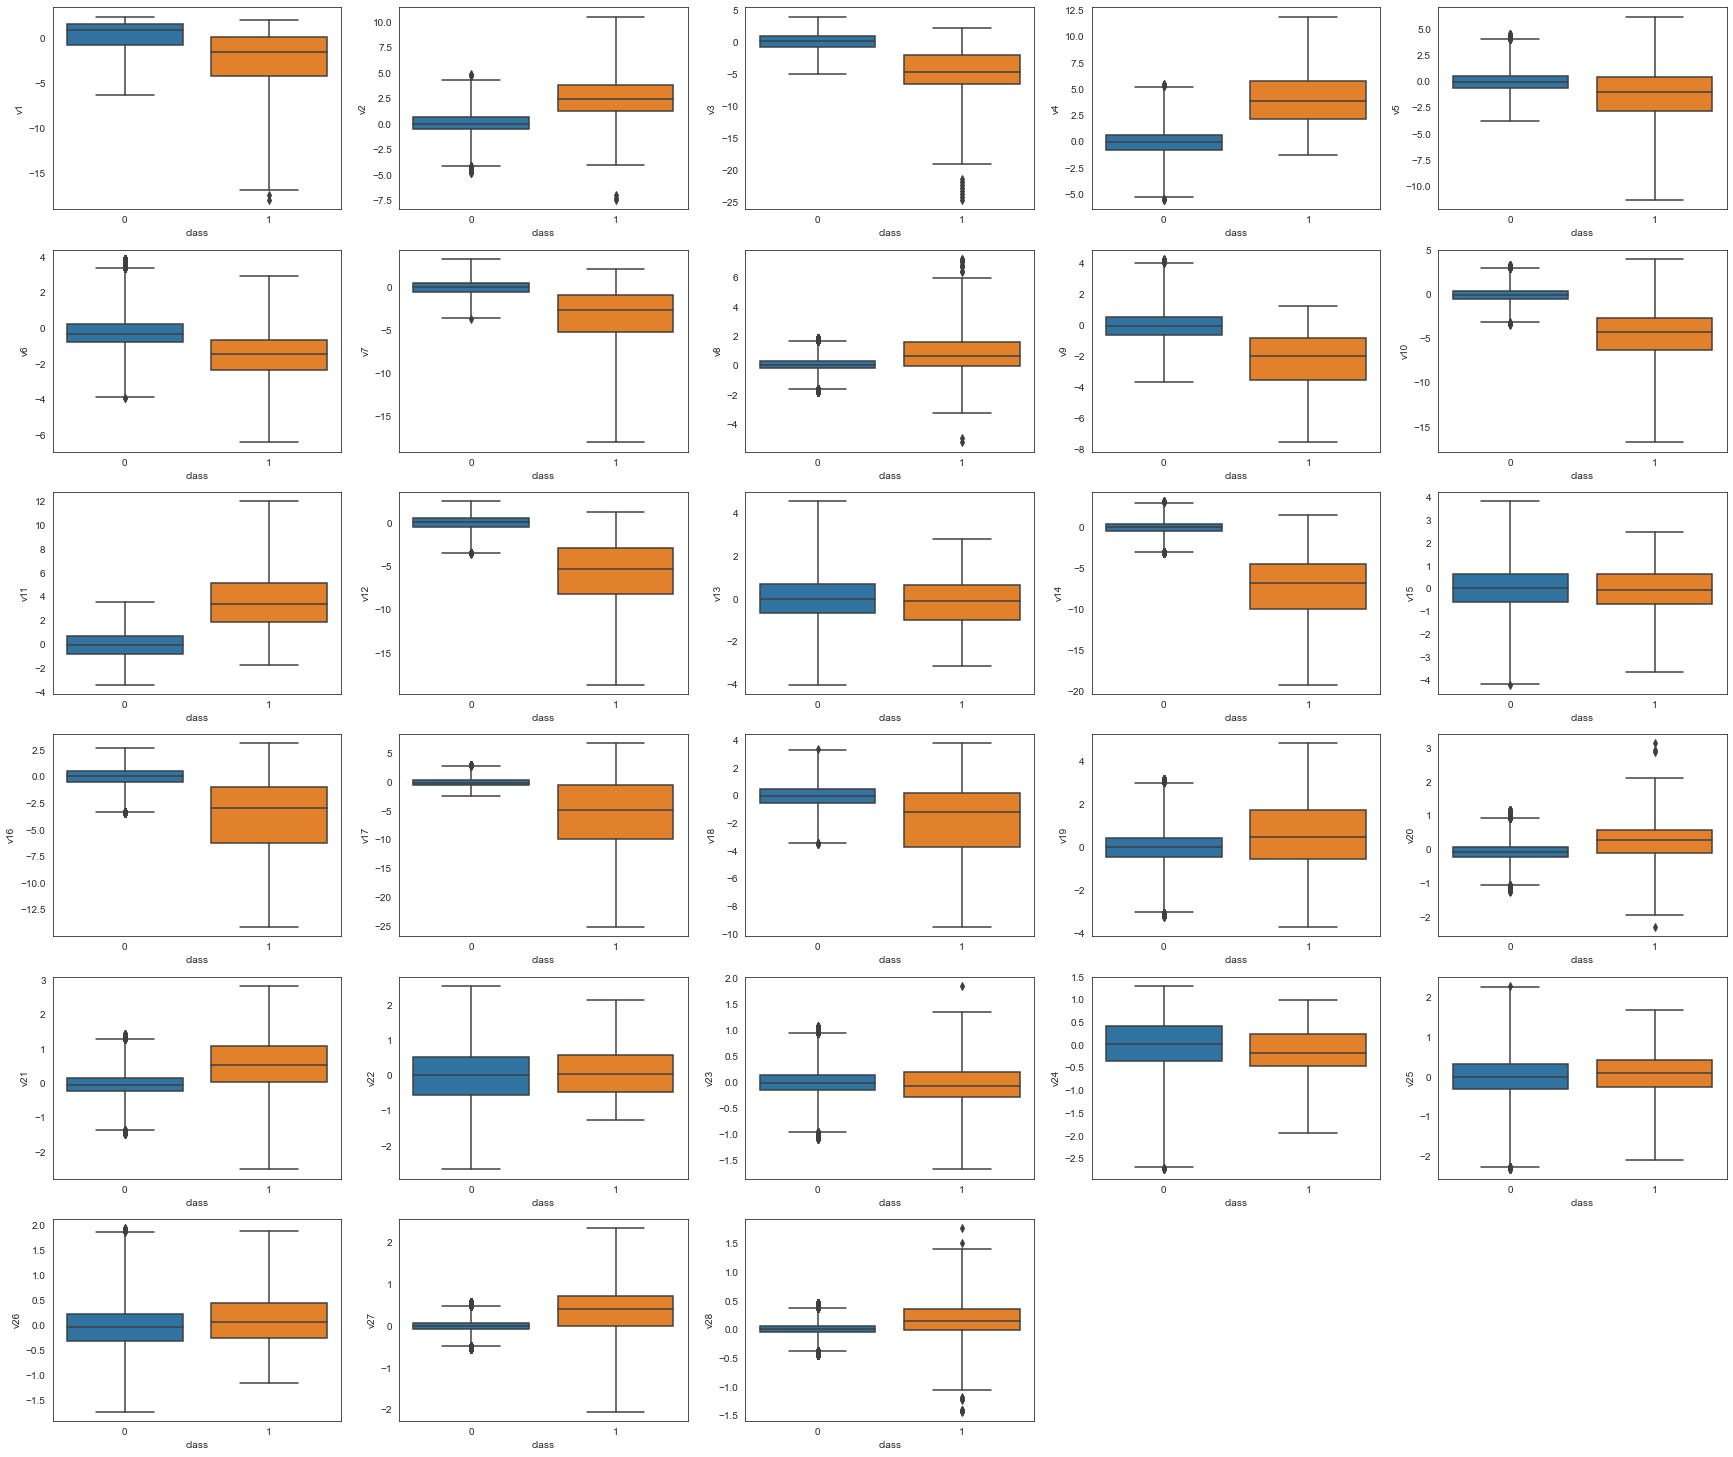

In [72]:
index = 0
plt.figure(figsize=(30, 26))
for v in df_.columns[1:29]:
    index += 1
    plt.subplot(6, 5, index)
    sns.boxplot(y=v, x=target, data=df_, whis=3)

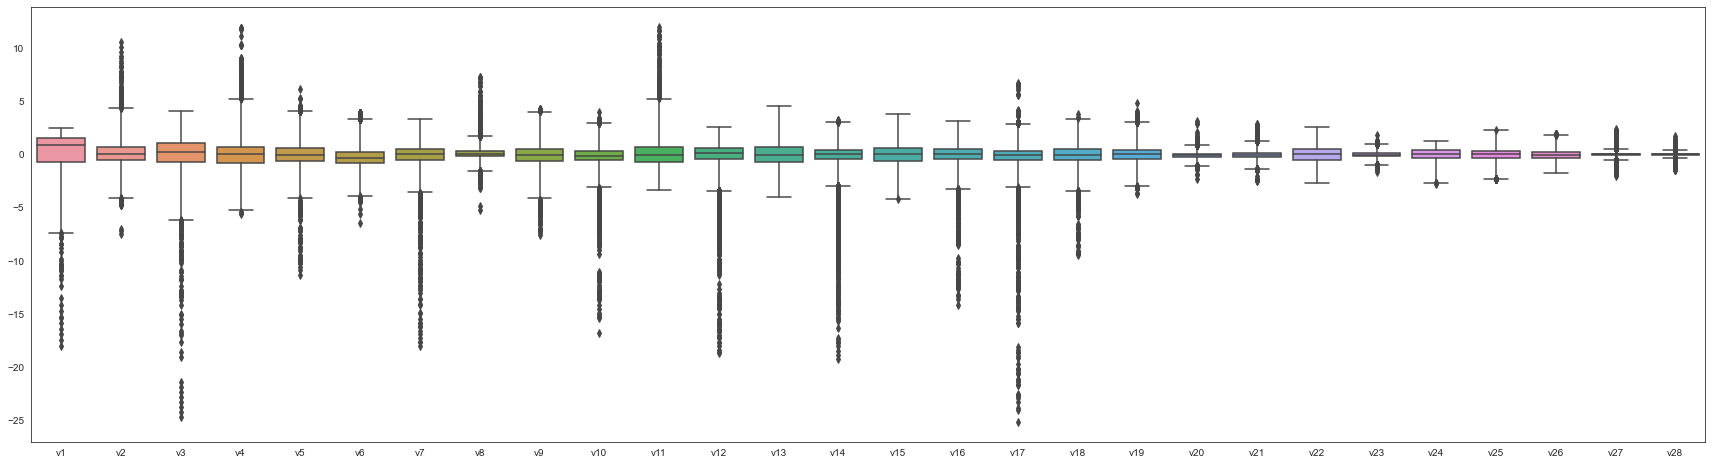

In [73]:
plt.figure(figsize=(30, 8))
sns.boxplot(data = df_.loc[:,(df_.columns!='time') & (df_.columns!='amount') & (df_.columns!='class')], whis=3);

# 3. Data Preprocessing


As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

## 3.1 Train-Test Split|Scale


### 3.1.1 Train-Test Split|Scale

Since all "v" values has already been scaled during PCA we will scale only amount and time features and perform StandardScaler. Due to the severe imbalance dataset case, there is no matter in scaling before train-test split, because we will in any case undersample the dataset. After all features were standart scaled we will perform again RobustScaler and PowerTransformer to the handle with outliers, remember that RobustScaler is less prone to outliers. But after Robust scaling we might need to perform PowerTransform for Standard scaling or QuantileTranformer for MinMax scaling.

How does a robust scaler work?
Scale features using statistics that are robust to outliers. This Scaler removes the median and scales the data according to the quantile range (defaults to IQR: Interquartile Range). The IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile).

In [74]:
# Scaling
df_['amount'] = StandardScaler().fit_transform(df_['amount'].values.reshape(-1,1))
df_['time'] = StandardScaler().fit_transform(df_['time'].values.reshape(-1,1))
# We should scale data normaly after split process to avoid data leakage,
# but in this case almost all dataset was already scaled during the PCA process.
# Therefore we decide to scale amount and time before split. 

# Columns
X_numerical = df_.drop(target, axis=1).select_dtypes('number').astype('float64')
X_categorical = df_.drop(target, axis=1).select_dtypes('object')

X_numerical_list = X_numerical.columns.to_list()
X_categorical_list = X_categorical.columns.to_list()

# Feature - Target                                           
X = df_.drop(target, axis=1).astype('float64')
y = df_[target]

# Train - Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    test_size=0.20, 
                                                    random_state=42)

# # Dealing with outliers by using Robust scaling and Power Tranform
# robust_scaler = RobustScaler()
# X_train = robust_scaler.fit_transform(X_train)
# X_test = robust_scaler.transform(X_test)
# power_tranformer = PowerTransformer(method='yeo-johnson')
# X_train = power_tranformer.fit_transform(X_train)
# X_test = power_tranformer.transform(X_test)

In [75]:
# We reserved all trainset for next steps
X_train_, y_train_ = X_train, y_train # 5.2

# We got copies of test dataset for next steps
X_test_, y_test_ = X_test, y_test  # 5.2
X_test__, y_test__ = X_test, y_test  # 5.3
X_test___, y_test___ = X_test, y_test  # 5.4
X_test____, y_test____ = X_test, y_test  # 5.5

In [76]:
# # Train-Test Split|Scale|OneHotEncoder
# ohe = OneHotEncoder(sparse=False, drop="if_binary")
# ohe_df = ohe.fit_transform(df[X_categorical.columns])
# ohe_df = pd.DataFrame(ohe_df, columns=ohe.get_feature_names(df[X_categorical.columns].columns))

In this study, even if we do NOT need to use OneHotEncoder (OHE) since there is NOT any categorical variable, the following OHE codes will be put down in case they could be used for further studies. 


### 3.1.2 Hard Undersampling

Since the classes in the dataset are highly imbalanced, we performed firstly hard under-sampling. However, in real-life prediction, it should be considered to use soft under-sampling for more reliable results.



In [77]:
# Hard Undersampling
X_train, y_train = RandomUnderSampler(random_state=42).fit_resample(X_train_, y_train_)

# We need this _df in Pycaret and Future Selection steps
_df_X = pd.DataFrame(data=X_train, columns=X_numerical_list)
_df_y = pd.DataFrame(data=y_train, columns=[target])
_df = pd.concat([_df_X, _df_y], axis=1)

print("Train Classes:\n", pd.DataFrame(y_train).rename({0:"class"}, axis=1)[target].value_counts(), "\n", sep="")
shape_control(_df, X_train, y_train, X_test, y_test)

Train Classes:
0    283
1    283
Name: class, dtype: int64

df.shape: (566, 31)
X_train.shape: (566, 30)
y_train.shape: (566,)
X_test.shape: (46199, 30)
y_test.shape: (46199,)


In [78]:
_df.head()

time     v1     v2     v3     v4     v5     v6     v7     v8     v9  \
0 -0.331  1.246 -0.409  0.894 -0.717 -1.285 -0.845 -0.629  0.014  1.947   
1  1.221 -0.823  0.546 -0.161  0.961  0.872 -0.041  1.914 -0.376 -1.178   
2 -0.555 -0.651  0.737  1.803 -1.337 -0.294 -0.874  0.492  0.113 -0.212   
3  1.498  2.031 -1.916 -1.297 -1.602 -1.067 -0.014 -1.045 -0.118 -1.061   
4 -1.959  1.348 -0.253 -1.552 -1.105  2.089  3.110 -0.388  0.707  0.185   

     v10    v11    v12    v13    v14    v15    v16    v17    v18    v19  \
0 -1.055 -0.580  0.299 -0.873  0.017  1.363 -0.404 -0.097  0.290  0.561   
1 -0.097  0.534  0.941  0.743  0.458 -0.986 -0.889 -0.239  0.135  1.231   
2 -0.545  1.308  0.435 -0.645  0.261 -0.152  0.760 -0.821  0.143 -0.470   
3  1.477 -1.631 -1.071  0.496 -0.492  0.047 -0.303  0.259  0.171 -0.031   
4 -0.191 -0.257  0.136 -0.143  0.307  0.335 -0.007 -0.423 -0.312  0.738   

     v20    v21    v22    v23    v24    v25    v26    v27    v28  amount  \
0 -0.179 -0.022  0.146 -0.026  0.387  0.472 -0.684  0.088  0.034  -0.739   
1  0.001  0.165  0.698 -0.331 -0.330  0.336 -0.342  0.148  0.092   2.895   
2 -0.005 -0.026 -0.079 -0.062  0.556 -0.420  0.691  0.253  0.165  -0.743   
3 -0.081 -0.111 -0.176  0.073  0.009 -0.216 -0.182 -0.012 -0.020   2.171   
4  0.045 -0.138 -0.414 -0.128  1.099  0.700  1.137 -0.095 -0.014  -0.571   

   class  
0      0  
1      0  
2      0  
3      0  
4      0

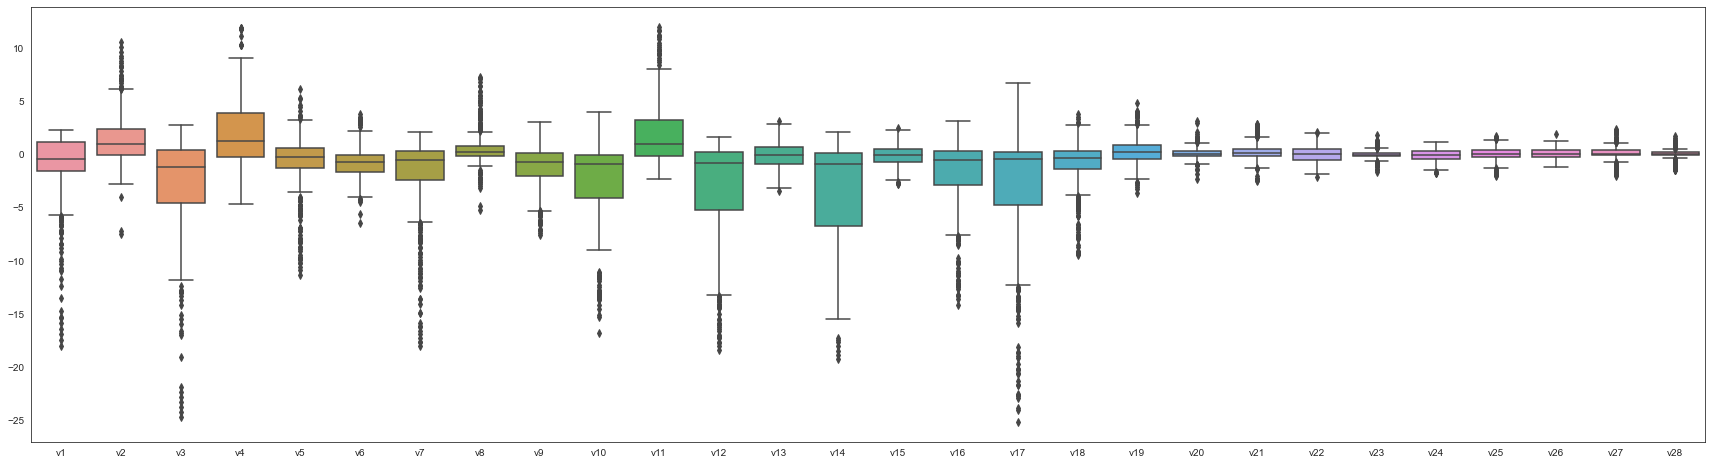

In [79]:
plt.figure(figsize=(30, 8))
sns.boxplot(data = _df.loc[:,(_df.columns!='time') & (_df.columns!='amount') & (_df.columns!='class')])
sns.set_style("white", {'axes.grid' : False});

# 4. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

## 4.1 First Insights to Models by Overall Train Scores

In [80]:
def model_selection(X_train, y_train):
    # Logistic Regression
    log = LogisticRegression(random_state=42)  # class_weight="balanced"
    log.fit(X_train, y_train)
    # Decision Tree
    decision_tree = DecisionTreeClassifier(random_state=42)  # class_weight="balanced"
    decision_tree.fit(X_train, y_train)
    # Random Forest
    random_forest = RandomForestClassifier(random_state=42)  # class_weight="balanced"
    random_forest.fit(X_train, y_train)
    # KNN
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    # SVC
    svc = SVC(random_state=42)  # class_weight="balanced"
    svc.fit(X_train, y_train)
    # XGB
    xgb = XGBClassifier(random_state=42)
    xgb.fit(X_train, y_train)
    # AdaBoosting
    ab = AdaBoostClassifier(random_state=42)
    ab.fit(X_train, y_train)
    # GB GradientBoosting
    gb = GradientBoostingClassifier(random_state=42)
    gb.fit(X_train, y_train)  
    # LGBM 
    lgbm = LGBMClassifier(random_state=42)
    lgbm.fit(X_train, y_train)

    # Model Accuracy on Training Data
    print(f"\033[1m1) Logistic Regression Training Accuracy:\033[0m {log.score(X_train, y_train)}")
    print(f"\033[1m2) Decision Tree Training Accuracy:\033[0m {decision_tree.score(X_train, y_train)}")
    print(f"\033[1m3) Random Forest Training Accuracy:\033[0m {random_forest.score(X_train, y_train)}")
    print(f"\033[1m4) KNN Training Accuracy:\033[0m {knn.score(X_train, y_train)}")
    print(f"\033[1m5) SVC Training Accuracy:\033[0m {svc.score(X_train, y_train)}")
    print(f"\033[1m6) XGBoosting Training Accuracy:\033[0m {xgb.score(X_train, y_train)}")
    print(f"\033[1m7) AdaBoosting Training Accuracy:\033[0m {ab.score(X_train, y_train)}")
    print(f"\033[1m8) GradiendBoosting Training Accuracy:\033[0m {gb.score(X_train, y_train)}")
    print(f"\033[1m8) LGBM Training Accuracy:\033[0m {lgbm.score(X_train, y_train)}")
    return log, decision_tree, random_forest, knn, svc, xgb, ab, gb, lgbm

In [81]:
model_selection(X_train, y_train)

1) Logistic Regression Training Accuracy: 0.9611307420494699
2) Decision Tree Training Accuracy: 1.0
3) Random Forest Training Accuracy: 1.0
4) KNN Training Accuracy: 0.9593639575971732
5) SVC Training Accuracy: 0.9399293286219081
6) XGBoosting Training Accuracy: 1.0
7) AdaBoosting Training Accuracy: 1.0
8) GradiendBoosting Training Accuracy: 1.0
8) LGBM Training Accuracy: 1.0


(LogisticRegression(random_state=42),
 DecisionTreeClassifier(random_state=42),
 RandomForestClassifier(random_state=42),
 KNeighborsClassifier(),
 SVC(random_state=42),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.300000012, max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
               tree_method='exact', validate_parameters=1, verbosity=None),
 AdaBoostClassifier(random_state=42),
 GradientBoostingClassifier(random_state=42),
 LGBMClassifier(random_state=42))

## 4.2 First Insights to Models by Overall Train-Test Scores

In [269]:
# # Transformer for Pipeline
# transformer = ColumnTransformer([("ohe", OneHotEncoder(drop="if_binary"), X_categorical_list),
#                                  ("scaler", StandardScaler(), X_numerical_list)], 
#                                  remainder="passthrough")

# Models
%matplotlib inline
models = []
models.append(("LOG", LogisticRegression(random_state=42)))  # class_weight="balanced"
models.append(("DTC", DecisionTreeClassifier(random_state=42)))  # class_weight="balanced"
models.append(("RFC", RandomForestClassifier(random_state=42)))  # class_weight="balanced"
models.append(("KNN", KNeighborsClassifier()))
models.append(("SVC", SVC(random_state=42)))  # class_weight="balanced"
models.append(("ADA", AdaBoostClassifier(random_state=42)))
models.append(("GBC", GradientBoostingClassifier(random_state=42)))

# Evaluate each model in turn
results = []
names = []
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
precision_recall_auc_scores = []

for name, model in models:
    pipe = Pipeline([("model", model)])
    # we have already scaled our dataset. If we didn't, we could scale it by using pipeline.
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")
    
    results.append(cv_results)
    names.append(name)
    
    print(f"{name}: {round(cv_results.mean(), 4)}")

    y_pred = pipe.fit(X_train, y_train).predict(X_test)
    
    f1_scores.append(f1_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, pos_label=0))
    roc_auc_scores.append(roc_auc_score(y_test, y_pred))
    # calculate the precision-recall auc
    precision, recall, _ = precision_recall_curve(y_test, y_pred)
    precision_recall_auc_scores.append(auc(recall, precision))

result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall-1": recall_scores,
                        "Precision-0": precision_scores,
                        "ROC AUC": roc_auc_scores,
                        "Recall AUC": precision_recall_auc_scores
                        }, index=names)

compare

for score in compare.columns:
    layout = cf.Layout(height=300, width=1200)
    compare[score].sort_values().iplot(kind="barh", title=f"{score} Score", layout=layout)
# https://plotly.com/python/horizontal-bar-charts/
# https://plotly.com/python/renderers/
# https://plotly.com/python/creating-and-updating-figures/
# https://plotly.com/python/figure-labels/

# # For Train Scores
# accuracy_scores_train = []
# recall_scores_train = []
# f1_scores_train = []
# precision_scores_train = []
# y_pred_train = model.predict(X_train)
# accuracy_scores_train.append(accuracy_score(y_train,y_pred_train))
# recall_scores_train.append(recall_score(y_train,y_pred_train))
# f1_scores_train.append(f1_score(y_train,y_pred_train))
# precision_scores_train.append(precision_score(y_train,y_pred_train))

LOG: 0.9118
DTC: 0.9083
RFC: 0.8835
KNN: 0.88
SVC: 0.873
ADA: 0.908
GBC: 0.901


F1  Recall-1  Precision-0  ROC AUC  Recall AUC
LOG 0.077     0.958        1.000    0.961       0.499
DTC 0.035     0.958        1.000    0.939       0.488
RFC 0.133     0.958        1.000    0.969       0.515
KNN 0.150     0.958        1.000    0.971       0.520
SVC 0.424     0.944        1.000    0.970       0.609
ADA 0.051     0.958        1.000    0.951       0.492
GBC 0.078     0.958        1.000    0.961       0.499

## 4.3 First Insights to Models by Pycaret and Lazy Predict

### 4.3.1 First Insights to Models by Pycaret|HU

In [ ]:
!pip install scikit-learn==0.23.2  # For Pycaret

In [ ]:
from pycaret.classification import *
fraud_classifier = setup(_df, 
                         target=target,
                         session_id=123,
                         train_size=0.8,
                         log_experiment=True,
                         log_plots=True,
                         experiment_name='Creditcard Fraud Detection')

In [ ]:
best_model_scores = compare_models()

### 4.3.2 First Insights to Models by Lazy Predict|HU

In [ ]:
!pip install scikit-learn==0.23.1  # For Lazy Predict

In [ ]:
from lazypredict.Supervised import LazyClassifier

lazy_classifier = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=None, predictions=True)
models, predictions = lazy_classifier.fit(X_train, X_test, y_train, y_test)
models

## 4.4 First Insights to Models by "scale_pos_weight" Hyperparameter: Catboost, XGBoost, LightGBM

- CatBoost, XGBoost and LightGBM use **`scale_pos_weight`** hyperparameter to tune the training algorithm for the imbalanced data.

- **`scale_pos_weight`** is **1** by default.

- Both major class and minority class get the same weight.

- When dealing with imbalanced data, story changes a bit.
- **`scale_pos_weight`** gets the number of ( total number of examples in the majority class divided by the total number of examples in the minority class.)

- For example, in our data;
     - Number of Class 1, Fraudulent:  473
     - Number of Class 0, Reliable: 283253
     -  **`scale_pos_weight`** should get 283253 / 473  which is almost **600**
     
- By adjusting the weight, minority class gets 600 times more impact and 600 times more correction than errors made on the majority class. 

- Two important point, 
    - by changing **`scale_pos_weight`** we can also see changes on the **`recall, accuracy, roc-auc, precision score`**
    - If we use extreme values for the **`scale_pos_weight`**, we can overfit the minority class and model could make worse predictions.



- https://www.kaggle.com/kaanboke/xgboost-lightgbm-catboost-imbalanced-data

### 4.4.1 Catboost, XGBoost, LightGBM by Default Parameters

In [280]:
comp_recall = []
comp_recall_name = []

In [313]:
# # Transformer for Pipeline
# transformer = ColumnTransformer([("ohe", OneHotEncoder(drop="if_binary"), X_categorical_list),
#                                  ("scaler", StandardScaler(), X_numerical_list)], 
#                                  remainder="passthrough")

# Models
models = []
models.append(("XGB", XGBClassifier(random_state=42, verbosity = 0)))
models.append(("LGB", LGBMClassifier(random_state=42)))
models.append(("CAT", CatBoostClassifier(random_state=42,
                                         verbose=0, 
                                         cat_features=X_categorical_list)))

# Evaluate each model in turn
results = []
names = []
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
precision_recall_auc_scores = []

for name, model in models:
    if name != "CAT":
        pipe = Pipeline([("model", model)])
        kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        y_pred = pipe.fit(X_train, y_train).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, pos_label=0))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        # calculate the precision-recall auc
        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        precision_recall_auc_scores.append(auc(recall, precision))
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Default")

    else:
        
        kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        
        y_pred = model.fit(X_train, y_train, cat_features=X_categorical_list).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, pos_label=0))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        # calculate the precision-recall auc
        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        precision_recall_auc_scores.append(auc(recall, precision))
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Default")
    
result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T


compare = pd.DataFrame({"F1": f1_scores,
                        "Recall-1": recall_scores,
                        "Precision-0": precision_scores,
                        "ROC AUC": roc_auc_scores,
                        "Recall AUC": precision_recall_auc_scores
                        }, index=names)

print("\n", compare)
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

layout = cf.Layout(height=300, width=1200)
for score in compare.columns:
    print(f"{score} Score")
    compare[score].sort_values().iplot(kind="barh", layout=layout, title=f"{score} Score", )

XGB MODEL: 0.908
LGB MODEL: 0.901
CAT MODEL: 0.8871

        F1  Recall-1  Precision-0  ROC AUC  Recall AUC
XGB 0.076     0.958        1.000    0.961       0.499
LGB 0.104     0.958        1.000    0.966       0.506
CAT 0.142     0.958        1.000    0.970       0.517


F1 Score


Recall-1 Score


Precision-0 Score


ROC AUC Score


Recall AUC Score


### 4.4.2 Catboost, XGBoost, LightGBM by "scale_pos_weight=2"

In [311]:
# # Transformer for Pipeline
# transformer = ColumnTransformer([("ohe", OneHotEncoder(drop="if_binary"), X_categorical_list),
#                                  ("scaler", StandardScaler(), X_numerical_list)], 
#                                  remainder="passthrough")

# Models
models = []
models.append(("XGB", XGBClassifier(random_state=42, verbosity = 0, scale_pos_weight = 2)))
models.append(("LGB", LGBMClassifier(random_state=42, scale_pos_weight = 2)))
models.append(("CAT", CatBoostClassifier(random_state=42, 
                                         verbose=0, 
                                         cat_features=X_categorical_list, 
                                         scale_pos_weight = 2)))

# Evaluate each model in turn
results = []
names = []
f1_scores = []
recall_scores = []
precision_scores = []
roc_auc_scores = []
precision_recall_auc_scores = []

for name, model in models:
    if name != "CAT":
        pipe = Pipeline([("model", model)])
        kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(pipe, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        y_pred = pipe.fit(X_train, y_train).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, pos_label=0))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        # calculate the precision-recall auc
        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        precision_recall_auc_scores.append(auc(recall, precision))
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Scale Post Weight 2")

    else:
        
        kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
        cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="recall")

        results.append(cv_results)
        names.append(name)

        print(f"{name} MODEL: {round(cv_results.mean(), 4)}")
        
        y_pred = model.fit(X_train, y_train,cat_features=X_categorical_list).predict(X_test)

        f1_scores.append(f1_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, pos_label=0))
        roc_auc_scores.append(roc_auc_score(y_test, y_pred))
        # calculate the precision-recall auc
        precision, recall, _ = precision_recall_curve(y_test, y_pred)
        precision_recall_auc_scores.append(auc(recall, precision))      
        
        comp_recall.append(recall_score(y_test, y_pred))
        comp_recall_name.append(f"{name} Scale Pos Weight 2")    

result_df = pd.DataFrame(results, columns=[i for i in range(1, 11)], index=names).T

compare = pd.DataFrame({"F1": f1_scores,
                        "Recall-1": recall_scores,
                        "Precision-0": precision_scores,
                        "ROC AUC": roc_auc_scores,
                        "Recall AUC": precision_recall_auc_scores
                        }, index=names)

print("\n", compare)
result_df.iplot(kind="box", boxpoints="all", title="CV Results")

layout = cf.Layout(height=300, width=1200)
for score in compare.columns:
    print(f"{score} Score")
    compare[score].sort_values().iplot(kind="barh", layout=layout, title=f"{score} Score")

XGB MODEL: 0.9081
LGB MODEL: 0.9081
CAT MODEL: 0.9011

        F1  Recall-1  Precision-0  ROC AUC  Recall AUC
XGB 0.061     0.958        1.000    0.956       0.495
LGB 0.084     0.958        1.000    0.963       0.501
CAT 0.100     0.958        1.000    0.966       0.505


F1 Score


Recall-1 Score


Precision-0 Score


ROC AUC Score


Recall AUC Score


In [312]:
layout = cf.Layout(height=300, width=1200)
print("Recall Scores")
pd.DataFrame(comp_recall, index=comp_recall_name, 
             columns=["Recall"]).sort_values(by="Recall").iplot(kind="barh", 
                                                                title="The Comparison of Models",
                                                                layout=layout)


Recall Scores


# 5. The Evaluation of Models

In [124]:
# lists for comparing models
model_abbrs_ = []
f1_scores_ = []
recall_scores_ = []
precision_scores_ = []
roc_auc_scores_ = []
precision_recall_auc_scores_ = []

## 5.1 The Evaluation of Models by Hard-Undersampled Data

In [125]:
print("Hard under-sampled Dataset:")
_df.head(1)  # Undersampled Data
print(shape_control(_df, X_train, X_test, y_train, y_test), "\n")

Hard under-sampled Dataset:
df.shape: (566, 31)
X_train.shape: (566, 30)
y_train.shape: (46199, 30)
X_test.shape: (566,)
y_test.shape: (46199,)
None 



### 5.1.1 Logistic Regression | Hard-Undersampled Data

#### Logistic Regression | Hyperparameter Tuning | Optuna

https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.Trial.html

In [126]:
# Logistic Regression | Hyperparameter Tuning | Optuna
from sklearn import linear_model

def objective(trial):
    class_weight = trial.suggest_categorical("class_weight", ["balanced", None])
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet", "none"])
    if penalty == "l1" or penalty == "elasticnet":
        solver = trial.suggest_categorical("solver1", ['saga'])
    else:
        solver = trial.suggest_categorical("solver2", ['newton-cg', 'lbfgs', 'sag', 'saga'])
    l1_ratio = trial.suggest_int("l1_ratio", 0, 1)
    C = trial.suggest_loguniform("C", 1e-5, 1e5)
    max_iter = trial.suggest_int("max_iter", 100, 10000, 100)

    model_optuna = LogisticRegression(class_weight=class_weight, 
                                      C=C, 
                                      solver=solver, 
                                      penalty=penalty,
                                      l1_ratio=l1_ratio,
                                      max_iter=max_iter).fit(X_train, y_train)

    y_pred =  model_optuna.predict(X_test)
    recall = recall_score(y_test, y_pred, average="macro")
    return recall

study_log = optuna.create_study(direction="maximize")
study_log.optimize(objective, n_trials=20)

study = study_log
print()
print(f'Recall|Macro   : {study.best_value}')
print(f'Best parameters: {study.best_params}')

[I 2022-01-02 06:13:28,623] A new study created in memory with name: no-name-ab4aa854-9de5-46be-afc3-f8abc10f98f1
[I 2022-01-02 06:13:30,611] Trial 0 finished with value: 0.9650062838006185 and parameters: {'class_weight': 'balanced', 'penalty': 'none', 'solver2': 'saga', 'l1_ratio': 0, 'C': 3.184652552080244, 'max_iter': 3000}. Best is trial 0 with value: 0.9650062838006185.
[I 2022-01-02 06:13:32,886] Trial 1 finished with value: 0.9587661461310353 and parameters: {'class_weight': 'balanced', 'penalty': 'elasticnet', 'solver1': 'saga', 'l1_ratio': 1, 'C': 7.013305076204748, 'max_iter': 4100}. Best is trial 0 with value: 0.9650062838006185.
[I 2022-01-02 06:13:34,491] Trial 2 finished with value: 0.9644101166136605 and parameters: {'class_weight': 'balanced', 'penalty': 'none', 'solver2': 'sag', 'l1_ratio': 0, 'C': 0.9538757573156463, 'max_iter': 8800}. Best is trial 0 with value: 0.9650062838006185.
[I 2022-01-02 06:13:37,441] Trial 3 finished with value: 0.965027962607417 and parame


Recall|Macro   : 0.9737136834185829
Best parameters: {'class_weight': None, 'penalty': 'l2', 'solver2': 'newton-cg', 'l1_ratio': 0, 'C': 0.0304158799332035, 'max_iter': 600}


In [127]:
study = study_log
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_slice(study)

#### Logistic Regression | Hyperparameter Tuning | Optuna | KFold CV


In [128]:
# Logistic Regression | Hyperparameter Tuning | Optuna | KFold CV
def objective(trial):
    class_weight = trial.suggest_categorical("class_weight", ["balanced", None])
    penalty = trial.suggest_categorical("penalty", ["l1", "l2", "elasticnet", "none"])

    if penalty == "l1" or penalty == "elasticnet":
        solver = trial.suggest_categorical("solver1", ['saga'])
    else:
        solver = trial.suggest_categorical("solver2", ['newton-cg', 'lbfgs', 'sag', 'saga'])

    l1_ratio = trial.suggest_int("l1_ratio", 0, 1)
    C = trial.suggest_loguniform("C", 1e-5, 1e5)
    max_iter=trial.suggest_int("max_iter", 100, 10000, 100)
    
    if penalty == "elasticnet":
        model_optuna_KFold = LogisticRegression(class_weight=class_weight, 
                                                C=C, 
                                                solver=solver, 
                                                penalty=penalty,
                                                l1_ratio=l1_ratio,
                                                max_iter=max_iter)
    elif penalty == "none":
        model_optuna_KFold = LogisticRegression(class_weight=class_weight,
                                                solver=solver, 
                                                penalty=penalty,
                                                max_iter=max_iter)
    else:
        model_optuna_KFold = LogisticRegression(class_weight=class_weight, 
                                                C=C, 
                                                solver=solver, 
                                                penalty=penalty,
                                                max_iter=max_iter)
    
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    return cross_val_score(model_optuna_KFold, X_train, y_train, n_jobs=-1, scoring="recall", cv=kfold).mean()

study_KFold_log = optuna.create_study(direction='maximize')
study_KFold_log.optimize(objective, n_trials=20)

study_KFold = study_KFold_log
print()
print(f'Recall|Macro   : {study_KFold.best_value}')
print(f'Best parameters: {study_KFold.best_params}')

[I 2022-01-02 06:13:44,177] A new study created in memory with name: no-name-573ffe9e-3128-494f-a4ae-95664081928b
[I 2022-01-02 06:13:59,682] Trial 0 finished with value: 0.9082512315270936 and parameters: {'class_weight': 'balanced', 'penalty': 'l2', 'solver2': 'sag', 'l1_ratio': 1, 'C': 4.203038064807676, 'max_iter': 8900}. Best is trial 0 with value: 0.9082512315270936.
[I 2022-01-02 06:13:59,815] Trial 1 finished with value: 0.0 and parameters: {'class_weight': None, 'penalty': 'l1', 'solver1': 'saga', 'l1_ratio': 1, 'C': 0.000931775526333482, 'max_iter': 1400}. Best is trial 0 with value: 0.9082512315270936.
[I 2022-01-02 06:14:00,780] Trial 2 finished with value: 0.9153940886699508 and parameters: {'class_weight': 'balanced', 'penalty': 'l2', 'solver2': 'lbfgs', 'l1_ratio': 0, 'C': 490.30866684986916, 'max_iter': 700}. Best is trial 2 with value: 0.9153940886699508.
[I 2022-01-02 06:14:01,731] Trial 3 finished with value: 0.8975369458128079 and parameters: {'class_weight': None, 


Recall|Macro   : 0.9294334975369459
Best parameters: {'class_weight': None, 'penalty': 'none', 'solver2': 'newton-cg', 'l1_ratio': 0, 'C': 18.734818693199628, 'max_iter': 9800}


In [129]:
study_KFold = study_KFold_log
optuna.visualization.plot_optimization_history(study_KFold)
optuna.visualization.plot_slice(study_KFold)

#### Logistic Regression | Model Tunning 

In [130]:
LR_best_parameters = []
study = study_log
study_KFold = study_KFold_log
print("Hard Undersampled|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("Hard Undersampled|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parameters:", study_KFold.best_params)
LR_best_parameters.append(study.best_params)
LR_best_parameters.append(study_KFold.best_params)

Hard Undersampled|Recall|Macro: 0.974 Best Parameters: {'class_weight': None, 'penalty': 'l2', 'solver2': 'newton-cg', 'l1_ratio': 0, 'C': 0.0304158799332035, 'max_iter': 600}
Hard Undersampled|Recall|KFold: 0.929 Best Parameters: {'class_weight': None, 'penalty': 'none', 'solver2': 'newton-cg', 'l1_ratio': 0, 'C': 18.734818693199628, 'max_iter': 9800}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.96      0.98     46128
           1       0.03      0.97      0.06        71

    accuracy                           0.96     46199
   macro avg       0.52      0.96      0.52     46199
weighted avg       1.00      0.96      0.98     46199



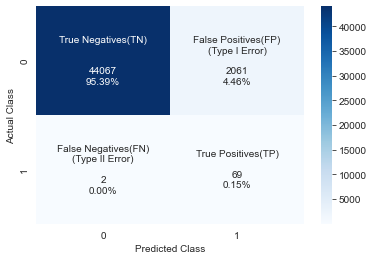

In [131]:
# Logistic Regression | Model Tunning 
study = study_KFold_log
tuned_model = LogisticRegression(class_weight=study.best_params["class_weight"],
                                 penalty=study.best_params["penalty"],
                                 solver=study.best_params["solver2"],
                                 l1_ratio=study.best_params["l1_ratio"],
                                 C=study.best_params["C"],
                                 max_iter=study.best_params["max_iter"]).fit(X_train, y_train)

y_pred = tuned_model.predict(X_test)
print('Classification Report:\n\n', classification_report(y_test, y_pred))

# Confussion Matrix
cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("LG_HU")
f1_scores_.append(f1_score(y_test, y_pred))
recall_scores_.append(recall_score(y_test, y_pred))
precision_scores_.append(precision_score(y_test, y_pred, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test, y_pred))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test, y_pred)
precision_recall_auc_scores_.append(auc(recall_, precision_))

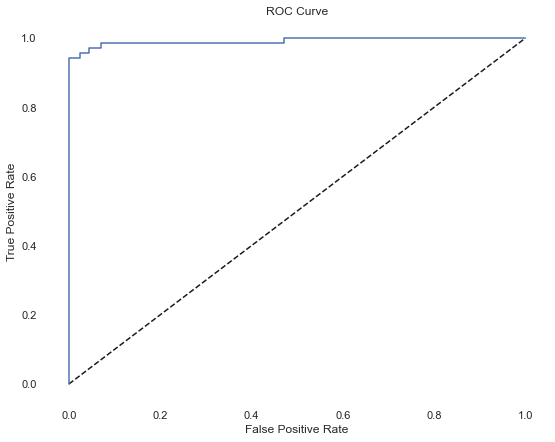


Optimal Threshold, Roc-Auc: 0.9997521265511256 



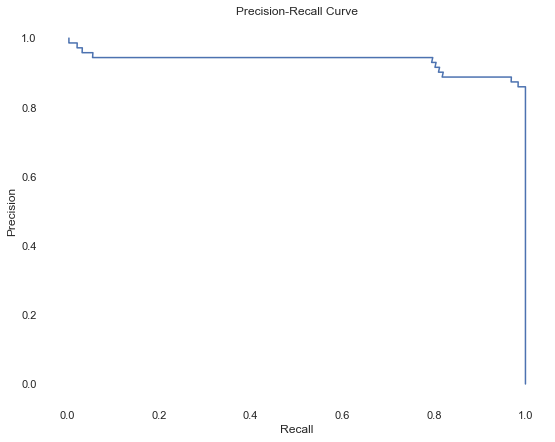


Optimal Threshold, Precision and Recall Curve: 0.9999965478869981


In [132]:
# Prediction Probabilities
y_pred_proba = tuned_model.predict_proba(X_test)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

### 5.1.2 RandomForest Classifier | Hard Undersampled Data

#### RandomForest Classifier | Hyperparameter Tuning | Optuna

In [133]:
# RandomForest Classifier | Hyperparameter Tuning | Optuna
def objective(trial):
    class_weight = trial.suggest_categorical("class_weight", ("balanced", None))
    criterion = trial.suggest_categorical('criterion', ["gini", "entropy"])
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
    n_estimators = trial.suggest_int('n_estimators', 5, 150, 5) 
    max_depth = trial.suggest_int('max_depth', 1, 15, 2) 
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10, 1)         
    
    model_optuna = sklearn.ensemble.RandomForestClassifier(class_weight = class_weight,
                                                          criterion =criterion,
                                                          max_features =max_features,
                                                          max_leaf_nodes =max_leaf_nodes,
                                                          bootstrap =bootstrap,
                                                          n_estimators=n_estimators, 
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split)
            
    model_optuna.fit(X_train, y_train)
    y_pred =  model_optuna.predict(X_test)
    recall = recall_score(y_test, y_pred, average="macro")
    return recall

study_rf = optuna.create_study(direction="maximize")
study_rf.optimize(objective, n_trials=20)

study = study_rf
print()
print(f'Recall|Macro: {study.best_value}')
print(f'Best parameter: {study.best_params}')

[I 2022-01-02 06:14:44,074] A new study created in memory with name: no-name-029f868a-1828-45be-b41b-1fe4647cdeed


<IPython.core.display.Javascript object>

[I 2022-01-02 06:14:44,373] Trial 0 finished with value: 0.971375730972725 and parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'max_leaf_nodes': 120, 'bootstrap': 'False', 'n_estimators': 15, 'max_depth': 1, 'min_samples_split': 9}. Best is trial 0 with value: 0.971375730972725.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:14:46,751] Trial 1 finished with value: 0.9682756616005432 and parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'max_leaf_nodes': 8419, 'bootstrap': 'False', 'n_estimators': 145, 'max_depth': 5, 'min_samples_split': 8}. Best is trial 0 with value: 0.971375730972725.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:14:47,008] Trial 2 finished with value: 0.9677194933388049 and parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'max_leaf_nodes': 149, 'bootstrap': 'False', 'n_estimators': 10, 'max_depth': 9, 'min_samples_split': 3}. Best is trial 0 with value: 0.971375730972725.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:14:48,996] Trial 3 finished with value: 0.9696597465472683 and parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 1578, 'bootstrap': 'True', 'n_estimators': 115, 'max_depth': 11, 'min_samples_split': 5}. Best is trial 0 with value: 0.971375730972725.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:14:50,322] Trial 4 finished with value: 0.969464637286082 and parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'max_leaf_nodes': 8106, 'bootstrap': 'False', 'n_estimators': 70, 'max_depth': 15, 'min_samples_split': 5}. Best is trial 0 with value: 0.971375730972725.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:14:51,991] Trial 5 finished with value: 0.9692945655200715 and parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'max_leaf_nodes': 4259, 'bootstrap': 'True', 'n_estimators': 125, 'max_depth': 3, 'min_samples_split': 9}. Best is trial 0 with value: 0.971375730972725.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:14:52,276] Trial 6 finished with value: 0.9691753320826799 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 1622, 'bootstrap': 'True', 'n_estimators': 20, 'max_depth': 3, 'min_samples_split': 9}. Best is trial 0 with value: 0.971375730972725.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:14:54,470] Trial 7 finished with value: 0.9714048904945455 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 7774, 'bootstrap': 'True', 'n_estimators': 145, 'max_depth': 9, 'min_samples_split': 3}. Best is trial 7 with value: 0.9714048904945455.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:14:56,432] Trial 8 finished with value: 0.9729549251806364 and parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 6237, 'bootstrap': 'False', 'n_estimators': 130, 'max_depth': 7, 'min_samples_split': 4}. Best is trial 8 with value: 0.9729549251806364.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:14:58,425] Trial 9 finished with value: 0.9702775925410247 and parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'max_leaf_nodes': 4184, 'bootstrap': 'True', 'n_estimators': 125, 'max_depth': 13, 'min_samples_split': 8}. Best is trial 8 with value: 0.9729549251806364.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:14:59,716] Trial 10 finished with value: 0.9729115675670394 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 6316, 'bootstrap': 'False', 'n_estimators': 80, 'max_depth': 7, 'min_samples_split': 2}. Best is trial 8 with value: 0.9729549251806364.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:00,771] Trial 11 finished with value: 0.9727706553228492 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 6198, 'bootstrap': 'False', 'n_estimators': 70, 'max_depth': 7, 'min_samples_split': 2}. Best is trial 8 with value: 0.9729549251806364.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:02,024] Trial 12 finished with value: 0.9726405824820585 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 6014, 'bootstrap': 'False', 'n_estimators': 95, 'max_depth': 7, 'min_samples_split': 4}. Best is trial 8 with value: 0.9729549251806364.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:02,922] Trial 13 finished with value: 0.9737353622253814 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 9875, 'bootstrap': 'False', 'n_estimators': 55, 'max_depth': 5, 'min_samples_split': 2}. Best is trial 13 with value: 0.9737353622253814.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:03,829] Trial 14 finished with value: 0.9742773323953433 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 9664, 'bootstrap': 'False', 'n_estimators': 45, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 14 with value: 0.9742773323953433.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:04,547] Trial 15 finished with value: 0.9685032890719272 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 9878, 'bootstrap': 'False', 'n_estimators': 45, 'max_depth': 3, 'min_samples_split': 7}. Best is trial 14 with value: 0.9742773323953433.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:05,309] Trial 16 finished with value: 0.9740713837307577 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 9826, 'bootstrap': 'False', 'n_estimators': 45, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 14 with value: 0.9742773323953433.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:05,817] Trial 17 finished with value: 0.9433367897290088 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 8834, 'bootstrap': 'False', 'n_estimators': 35, 'max_depth': 1, 'min_samples_split': 6}. Best is trial 14 with value: 0.9742773323953433.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:06,483] Trial 18 finished with value: 0.9731175162316249 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 7429, 'bootstrap': 'False', 'n_estimators': 45, 'max_depth': 5, 'min_samples_split': 6}. Best is trial 14 with value: 0.9742773323953433.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:06,998] Trial 19 finished with value: 0.9698114981948576 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 9341, 'bootstrap': 'False', 'n_estimators': 30, 'max_depth': 11, 'min_samples_split': 7}. Best is trial 14 with value: 0.9742773323953433.



Recall|Macro: 0.9742773323953433
Best parameter: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 9664, 'bootstrap': 'False', 'n_estimators': 45, 'max_depth': 5, 'min_samples_split': 6}


In [134]:
study = study_rf
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_slice(study)

#### RandomForest Classifier | Hyperparameter Tuning | Optuna | KFold CV

In [ ]:
!pip install scikit-learn==0.23.1

In [136]:
# RandomForest Classifier | Hyperparameter Tuning | Optuna | KFold CV
def objective(trial):
    class_weight = trial.suggest_categorical("class_weight", ("balanced", None))
    criterion = trial.suggest_categorical('criterion', ["gini", "entropy"])
    max_features = trial.suggest_categorical('max_features', ['auto', 'sqrt','log2'])
    max_leaf_nodes = trial.suggest_int('max_leaf_nodes', 1, 10000)
    bootstrap = trial.suggest_categorical('bootstrap',['True','False'])
    n_estimators = trial.suggest_int('n_estimators', 5, 150, 5) 
    max_depth = trial.suggest_int('max_depth', 1, 15, 1) 
    min_samples_split = trial.suggest_int('min_samples_split', 2, 12, 1)         

    
    model_optuna_KFold = sklearn.ensemble.RandomForestClassifier(class_weight = class_weight,
                                                          criterion =criterion,
                                                          max_features =max_features,
                                                          max_leaf_nodes =max_leaf_nodes,
                                                          bootstrap =bootstrap,
                                                          n_estimators=n_estimators, 
                                                          max_depth=max_depth,
                                                          min_samples_split=min_samples_split)

    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    return sklearn.model_selection.cross_val_score(model_optuna_KFold , X_train, y_train, n_jobs=-1, scoring="recall", cv=kfold).mean()

study_KFold_rf = optuna.create_study(direction='maximize')
study_KFold_rf.optimize(objective, n_trials=30)

study_KFold = study_KFold_rf 
print()
print(f'Recall|Macro  : {study_KFold.best_value}')
print(f'Best parameter: {study_KFold.best_params}')

[I 2022-01-02 06:15:34,359] A new study created in memory with name: no-name-15665585-a4ab-4187-a73e-70909e3a00f0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:36,051] Trial 0 finished with value: 0.8942118226600986 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'auto', 'max_leaf_nodes': 8644, 'bootstrap': 'True', 'n_estimators': 70, 'max_depth': 14, 'min_samples_split': 5}. Best is trial 0 with value: 0.8942118226600986.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:36,709] Trial 1 finished with value: 0.8518472906403941 and parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 7944, 'bootstrap': 'True', 'n_estimators': 35, 'max_depth': 2, 'min_samples_split': 7}. Best is trial 0 with value: 0.8942118226600986.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:38,713] Trial 2 finished with value: 0.8836206896551724 and parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'max_leaf_nodes': 6513, 'bootstrap': 'False', 'n_estimators': 110, 'max_depth': 9, 'min_samples_split': 10}. Best is trial 0 with value: 0.8942118226600986.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:40,454] Trial 3 finished with value: 0.8518472906403941 and parameters: {'class_weight': None, 'criterion': 'entropy', 'max_features': 'sqrt', 'max_leaf_nodes': 3877, 'bootstrap': 'False', 'n_estimators': 100, 'max_depth': 2, 'min_samples_split': 10}. Best is trial 0 with value: 0.8942118226600986.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:41,376] Trial 4 finished with value: 0.8799261083743841 and parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 3883, 'bootstrap': 'False', 'n_estimators': 55, 'max_depth': 10, 'min_samples_split': 10}. Best is trial 0 with value: 0.8942118226600986.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:41,776] Trial 5 finished with value: 0.8800492610837438 and parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'bootstrap': 'True', 'n_estimators': 15, 'max_depth': 5, 'min_samples_split': 3}. Best is trial 0 with value: 0.8942118226600986.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:43,577] Trial 6 finished with value: 0.8764778325123153 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 24, 'bootstrap': 'True', 'n_estimators': 130, 'max_depth': 5, 'min_samples_split': 7}. Best is trial 0 with value: 0.8942118226600986.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:44,119] Trial 7 finished with value: 0.8730295566502463 and parameters: {'class_weight': None, 'criterion': 'entropy', 'max_features': 'auto', 'max_leaf_nodes': 7007, 'bootstrap': 'True', 'n_estimators': 25, 'max_depth': 4, 'min_samples_split': 8}. Best is trial 0 with value: 0.8942118226600986.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:45,940] Trial 8 finished with value: 0.8764778325123153 and parameters: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'sqrt', 'max_leaf_nodes': 5850, 'bootstrap': 'False', 'n_estimators': 95, 'max_depth': 5, 'min_samples_split': 5}. Best is trial 0 with value: 0.8942118226600986.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:47,780] Trial 9 finished with value: 0.8695812807881772 and parameters: {'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'max_leaf_nodes': 4534, 'bootstrap': 'False', 'n_estimators': 145, 'max_depth': 3, 'min_samples_split': 8}. Best is trial 0 with value: 0.8942118226600986.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:48,865] Trial 10 finished with value: 0.8871921182266009 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 9969, 'bootstrap': 'True', 'n_estimators': 65, 'max_depth': 15, 'min_samples_split': 2}. Best is trial 0 with value: 0.8942118226600986.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:50,126] Trial 11 finished with value: 0.8976600985221674 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 9853, 'bootstrap': 'True', 'n_estimators': 60, 'max_depth': 15, 'min_samples_split': 2}. Best is trial 11 with value: 0.8976600985221674.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:51,412] Trial 12 finished with value: 0.8905172413793103 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 9732, 'bootstrap': 'True', 'n_estimators': 75, 'max_depth': 15, 'min_samples_split': 4}. Best is trial 11 with value: 0.8976600985221674.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:52,248] Trial 13 finished with value: 0.8906403940886699 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'auto', 'max_leaf_nodes': 8539, 'bootstrap': 'True', 'n_estimators': 50, 'max_depth': 12, 'min_samples_split': 5}. Best is trial 11 with value: 0.8976600985221674.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:53,515] Trial 14 finished with value: 0.8800492610837438 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 8556, 'bootstrap': 'True', 'n_estimators': 80, 'max_depth': 12, 'min_samples_split': 2}. Best is trial 11 with value: 0.8976600985221674.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:53,743] Trial 15 finished with value: 0.8906403940886699 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'auto', 'max_leaf_nodes': 2547, 'bootstrap': 'True', 'n_estimators': 5, 'max_depth': 13, 'min_samples_split': 5}. Best is trial 11 with value: 0.8976600985221674.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:54,455] Trial 16 finished with value: 0.8834975369458128 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 7623, 'bootstrap': 'True', 'n_estimators': 45, 'max_depth': 7, 'min_samples_split': 4}. Best is trial 11 with value: 0.8976600985221674.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:56,121] Trial 17 finished with value: 0.8906403940886699 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 9087, 'bootstrap': 'True', 'n_estimators': 85, 'max_depth': 13, 'min_samples_split': 3}. Best is trial 11 with value: 0.8976600985221674.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:57,877] Trial 18 finished with value: 0.8834975369458128 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'auto', 'max_leaf_nodes': 5843, 'bootstrap': 'True', 'n_estimators': 115, 'max_depth': 15, 'min_samples_split': 12}. Best is trial 11 with value: 0.8976600985221674.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:58,987] Trial 19 finished with value: 0.8977832512315272 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 2347, 'bootstrap': 'True', 'n_estimators': 65, 'max_depth': 11, 'min_samples_split': 3}. Best is trial 19 with value: 0.8977832512315272.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:15:59,803] Trial 20 finished with value: 0.8907635467980295 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 1798, 'bootstrap': 'True', 'n_estimators': 35, 'max_depth': 10, 'min_samples_split': 2}. Best is trial 19 with value: 0.8977832512315272.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:16:00,943] Trial 21 finished with value: 0.8907635467980295 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 2008, 'bootstrap': 'True', 'n_estimators': 65, 'max_depth': 13, 'min_samples_split': 4}. Best is trial 19 with value: 0.8977832512315272.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:16:02,076] Trial 22 finished with value: 0.8905172413793103 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 3051, 'bootstrap': 'True', 'n_estimators': 65, 'max_depth': 11, 'min_samples_split': 6}. Best is trial 19 with value: 0.8977832512315272.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:16:03,504] Trial 23 finished with value: 0.8906403940886699 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 9251, 'bootstrap': 'True', 'n_estimators': 85, 'max_depth': 14, 'min_samples_split': 3}. Best is trial 19 with value: 0.8977832512315272.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:16:04,686] Trial 24 finished with value: 0.8834975369458128 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'auto', 'max_leaf_nodes': 1256, 'bootstrap': 'True', 'n_estimators': 55, 'max_depth': 8, 'min_samples_split': 3}. Best is trial 19 with value: 0.8977832512315272.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:16:05,492] Trial 25 finished with value: 0.8906403940886699 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 5150, 'bootstrap': 'True', 'n_estimators': 40, 'max_depth': 14, 'min_samples_split': 6}. Best is trial 19 with value: 0.8977832512315272.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:16:06,788] Trial 26 finished with value: 0.8905172413793103 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'auto', 'max_leaf_nodes': 7325, 'bootstrap': 'False', 'n_estimators': 70, 'max_depth': 11, 'min_samples_split': 4}. Best is trial 19 with value: 0.8977832512315272.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:16:07,819] Trial 27 finished with value: 0.8870689655172412 and parameters: {'class_weight': None, 'criterion': 'entropy', 'max_features': 'log2', 'max_leaf_nodes': 8191, 'bootstrap': 'True', 'n_estimators': 55, 'max_depth': 14, 'min_samples_split': 2}. Best is trial 19 with value: 0.8977832512315272.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:16:09,103] Trial 28 finished with value: 0.8871921182266009 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 1024, 'bootstrap': 'True', 'n_estimators': 85, 'max_depth': 12, 'min_samples_split': 6}. Best is trial 19 with value: 0.8977832512315272.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[I 2022-01-02 06:16:09,652] Trial 29 finished with value: 0.8906403940886699 and parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'auto', 'max_leaf_nodes': 9227, 'bootstrap': 'True', 'n_estimators': 25, 'max_depth': 11, 'min_samples_split': 3}. Best is trial 19 with value: 0.8977832512315272.



Recall|Macro  : 0.8977832512315272
Best parameter: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 2347, 'bootstrap': 'True', 'n_estimators': 65, 'max_depth': 11, 'min_samples_split': 3}


In [137]:
study_KFold = study_KFold_rf
optuna.visualization.plot_optimization_history(study_KFold)
optuna.visualization.plot_slice(study_KFold)

#### RandomForest Classifier | Model Tunning

In [138]:
RF_best_parameters = []
study = study_rf
study_KFold = study_KFold_rf
print("Hard Undersampled|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("Hard Undersampled|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parametrs:", study_KFold.best_params)
RF_best_parameters.append(study.best_params)
RF_best_parameters.append(study_KFold.best_params)

Hard Undersampled|Recall|Macro: 0.974 Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 9664, 'bootstrap': 'False', 'n_estimators': 45, 'max_depth': 5, 'min_samples_split': 6}
Hard Undersampled|Recall|KFold: 0.898 Best Parametrs: {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 2347, 'bootstrap': 'True', 'n_estimators': 65, 'max_depth': 11, 'min_samples_split': 3}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.98      0.99     46128
           1       0.06      0.96      0.11        71

    accuracy                           0.98     46199
   macro avg       0.53      0.97      0.55     46199
weighted avg       1.00      0.98      0.99     46199



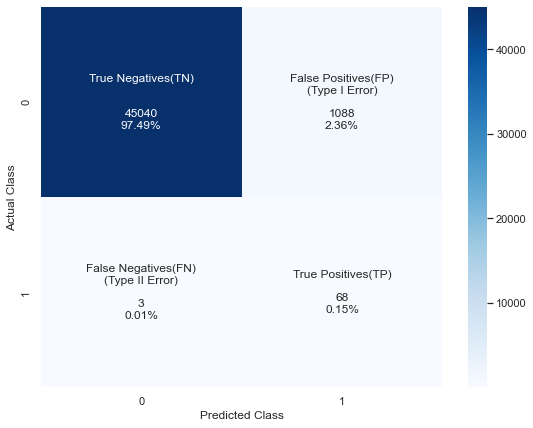

In [139]:
# RandomForest Classifier | Model Tunning
study = study_KFold_rf
tuned_model = RandomForestClassifier(class_weight = study.best_params['class_weight'],
                                    bootstrap=study.best_params['bootstrap'], 
                                    criterion=study.best_params['criterion'],
                                    max_depth=study.best_params['max_depth'],
                                    max_features=study.best_params['max_features'],
                                    max_leaf_nodes=study.best_params['max_leaf_nodes'],
                                    n_estimators=study.best_params['n_estimators'],
                                    n_jobs=-1).fit(X_train, y_train)

y_pred = tuned_model .predict(X_test)
print('Classification Report:\n\n', classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("RF_HU")
f1_scores_.append(f1_score(y_test, y_pred))
recall_scores_.append(recall_score(y_test, y_pred))
precision_scores_.append(precision_score(y_test, y_pred, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test, y_pred))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test, y_pred)
precision_recall_auc_scores_.append(auc(recall_, precision_))

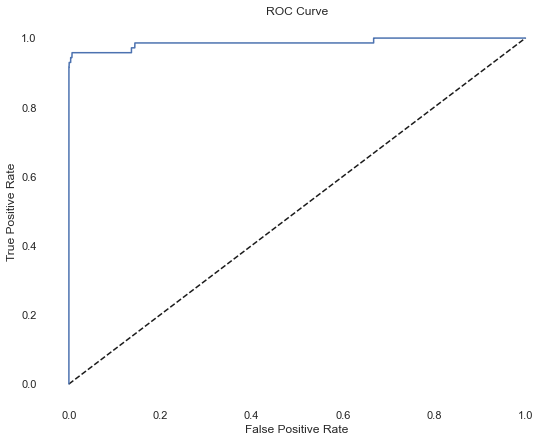


Optimal Threshold, Roc-Auc: 0.6307692307692307 



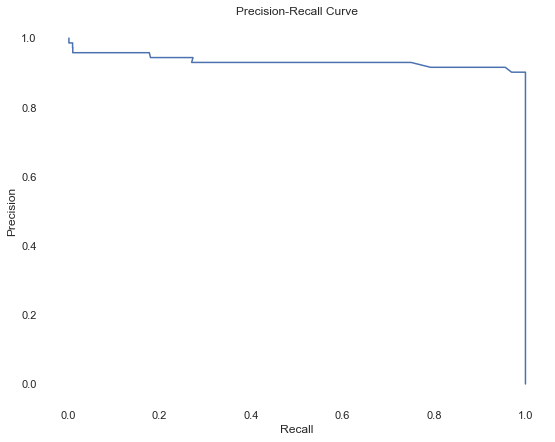


Optimal Threshold, Precision and Recall Curve: 0.9538461538461539


In [140]:
# Prediction Probabilities
y_pred_proba = tuned_model.predict_proba(X_test)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

#### RF | Feature Importance | Shap

In [141]:
feature_importances(tuned_model).T.nlargest(10, "Feature Importance")

Feature Importance
v14               0.185
v4                0.159
v17               0.103
v12               0.074
v11               0.062
v2                0.057
v7                0.053
v10               0.046
v16               0.034
v19               0.026

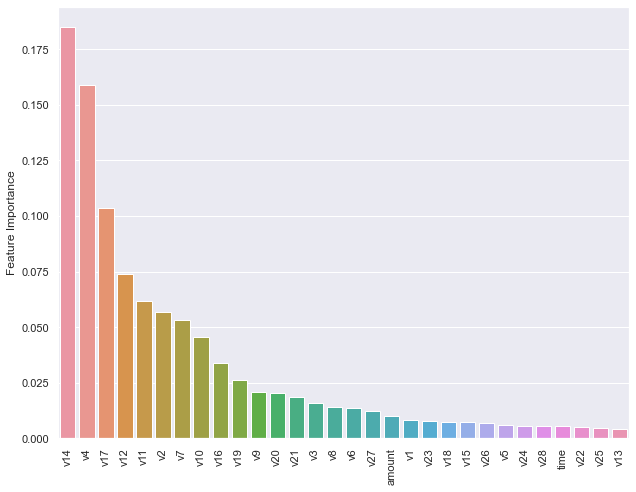

In [142]:
plt.axes().set_facecolor("white")
plt.grid(False)
feature_importances_bar(tuned_model)

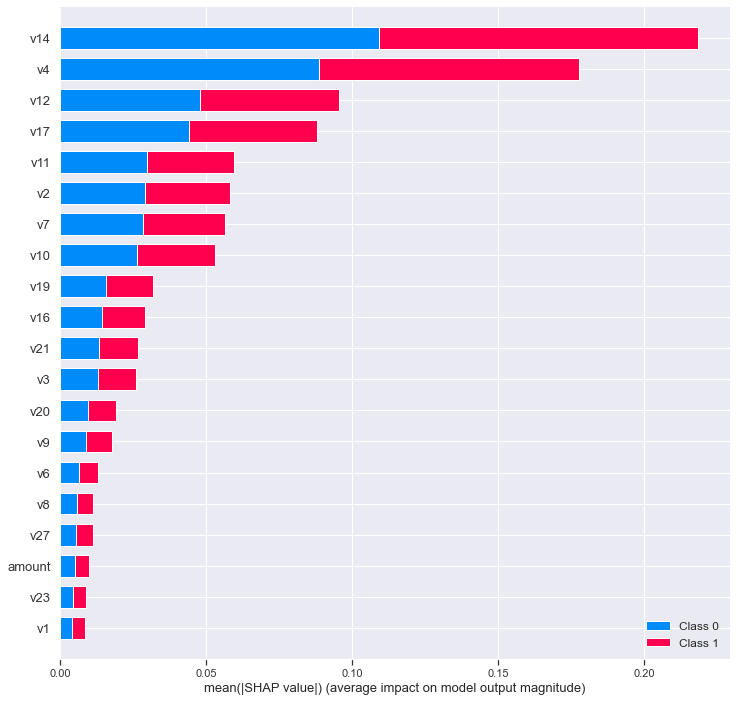

In [143]:
# import shap
plt.axes().set_facecolor("white")
plt.grid(False)
explainercat = shap.TreeExplainer(tuned_model)
shap_values_rf_test = explainercat.shap_values(X_test)
shap_values_rf_train = explainercat.shap_values(X_train)
shap.summary_plot(shap_values_rf_train, X_train, plot_type="bar", plot_size=(12,12))

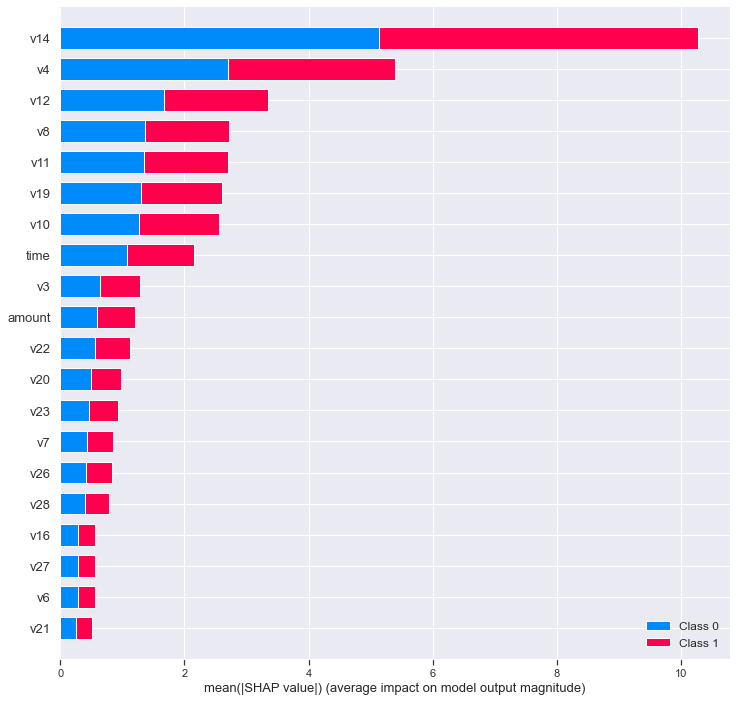

In [244]:
shap.summary_plot(shap_values_rf_test, X_test, plot_type="bar", plot_size=(12,12))

In [144]:
# fig = plt.subplots(figsize=(6,6),dpi=200)
# ax = shap.summary_plot(shap_values_rf_train, X_train plot_type="dot")

### 5.1.3 LGBM Classifier | Hard Undersampled Data

#### LGBM Classifier | Hyperparameter Tuning | Optuna

In [145]:
# LGBM Classifier | Hyperparameter Tuning | Optuna
def objective(trial):
    params = {"n_estimators": trial.suggest_int("n_estimators",10, 1000, 10),
              "max_depth": trial.suggest_int("max_depth", 2, 16),
              "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
              "subsample": trial.suggest_float("subsample", 0.2, 1),
              "num_leaves": trial.suggest_int("num_leaves", 10, 200, 10)
              #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, 100),
              #"lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
              #"lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
              #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
              #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.2, 0.95, step=0.1),
              #"bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
              #"feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.95, step=0.1)
              }

    model_optuna = LGBMClassifier(**params, random_state=42)
    model_optuna.fit(X_train, y_train)
    y_pred =  model_optuna.predict(X_test)
    recall = recall_score(y_test, y_pred, average="macro")
    return recall

study_lgbm = optuna.create_study(direction="maximize")
study_lgbm.optimize(objective, n_trials=20)

study = study_lgbm
print()
print(f'Recall|Macro: {study.best_value}')
print(f'Best parameters: {study.best_params}')

[I 2022-01-02 06:17:42,044] A new study created in memory with name: no-name-0a12a3c6-5c18-48a6-9318-8540ddc63aac
[I 2022-01-02 06:17:42,896] Trial 0 finished with value: 0.9647278180006156 and parameters: {'n_estimators': 120, 'max_depth': 14, 'learning_rate': 0.12023437362921466, 'subsample': 0.5154811288483696, 'num_leaves': 170}. Best is trial 0 with value: 0.9647278180006156.
[I 2022-01-02 06:17:43,951] Trial 1 finished with value: 0.9637305928878857 and parameters: {'n_estimators': 260, 'max_depth': 16, 'learning_rate': 0.10977604905873914, 'subsample': 0.8327508021196395, 'num_leaves': 180}. Best is trial 0 with value: 0.9647278180006156.
[I 2022-01-02 06:17:44,595] Trial 2 finished with value: 0.963882344535475 and parameters: {'n_estimators': 240, 'max_depth': 5, 'learning_rate': 0.1937510260766709, 'subsample': 0.40931446017781997, 'num_leaves': 40}. Best is trial 0 with value: 0.9647278180006156.
[I 2022-01-02 06:17:45,226] Trial 3 finished with value: 0.9625165797071712 and


Recall|Macro: 0.9658876341643339
Best parameters: {'n_estimators': 570, 'max_depth': 16, 'learning_rate': 0.015328329855618966, 'subsample': 0.5175156726973662, 'num_leaves': 130}


In [146]:
study = study_lgbm
optuna.visualization.plot_optimization_history(study)
optuna.visualization.plot_slice(study)

#### LGBM Classifier | Hyperparameter Tuning | Optuna | KFold CV

In [147]:
# LGBM Classifier | Hyperparameter Tuning | Optuna | KFold CV
def objective(trial):
    params = {"n_estimators": trial.suggest_int("n_estimators", 100, 1000, 10),
              "max_depth": trial.suggest_int("max_depth", 2, 16),
              "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
              "subsample": trial.suggest_float("subsample", 0.2, 1),
              "num_leaves": trial.suggest_int("num_leaves", 10, 200, 10)
              #"min_data_in_leaf": trial.suggest_int("min_data_in_leaf", 200, 10000, 100),
              #"lambda_l1": trial.suggest_int("lambda_l1", 0, 100, step=5),
              #"lambda_l2": trial.suggest_int("lambda_l2", 0, 100, step=5),
              #"min_gain_to_split": trial.suggest_float("min_gain_to_split", 0, 15),
              #"bagging_fraction": trial.suggest_float("bagging_fraction", 0.2, 0.95, step=0.1),
              #"bagging_freq": trial.suggest_categorical("bagging_freq", [1]),
              #"feature_fraction": trial.suggest_float("feature_fraction", 0.2, 0.95, step=0.1)
              }

    model_optuna_KFold = LGBMClassifier(**params, random_state=42)      
    kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
    return sklearn.model_selection.cross_val_score(model_optuna_KFold , X_train, y_train, n_jobs=-1, scoring="recall", cv=kfold).mean()

study_KFold_lgbm = optuna.create_study(direction='maximize')
study_KFold_lgbm.optimize(objective, n_trials=20)

study_KFold = study_KFold_lgbm
print()
print(f'Recall|Macro: {study_KFold.best_value}')
print(f'Best parameters: {study_KFold.best_params}')

[I 2022-01-02 06:18:17,260] A new study created in memory with name: no-name-97fc4df3-1f94-4bd8-a32d-f4f2d56a3d32


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:26,781] Trial 0 finished with value: 0.9150246305418721 and parameters: {'n_estimators': 740, 'max_depth': 11, 'learning_rate': 0.04800199717260619, 'subsample': 0.6920148079204198, 'num_leaves': 110}. Best is trial 0 with value: 0.9150246305418721.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:28,096] Trial 1 finished with value: 0.911576354679803 and parameters: {'n_estimators': 540, 'max_depth': 3, 'learning_rate': 0.158043890698849, 'subsample': 0.5889157389216779, 'num_leaves': 180}. Best is trial 0 with value: 0.9150246305418721.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:29,225] Trial 2 finished with value: 0.8974137931034483 and parameters: {'n_estimators': 590, 'max_depth': 2, 'learning_rate': 0.029046934386195045, 'subsample': 0.599692049654347, 'num_leaves': 150}. Best is trial 0 with value: 0.9150246305418721.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:31,971] Trial 3 finished with value: 0.911576354679803 and parameters: {'n_estimators': 740, 'max_depth': 16, 'learning_rate': 0.09909961403912224, 'subsample': 0.687913394785653, 'num_leaves': 80}. Best is trial 0 with value: 0.9150246305418721.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:34,331] Trial 4 finished with value: 0.9185960591133006 and parameters: {'n_estimators': 690, 'max_depth': 5, 'learning_rate': 0.07405072403688212, 'subsample': 0.3828656631865241, 'num_leaves': 80}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:34,795] Trial 5 finished with value: 0.8834975369458128 and parameters: {'n_estimators': 200, 'max_depth': 2, 'learning_rate': 0.021785860578833784, 'subsample': 0.3583152323518924, 'num_leaves': 130}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:35,251] Trial 6 finished with value: 0.8974137931034483 and parameters: {'n_estimators': 220, 'max_depth': 2, 'learning_rate': 0.29238483536567805, 'subsample': 0.2505330469742926, 'num_leaves': 200}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:38,871] Trial 7 finished with value: 0.9185960591133006 and parameters: {'n_estimators': 930, 'max_depth': 14, 'learning_rate': 0.06301236981416762, 'subsample': 0.7740218524323201, 'num_leaves': 80}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:40,170] Trial 8 finished with value: 0.9078817733990148 and parameters: {'n_estimators': 220, 'max_depth': 5, 'learning_rate': 0.15451817815230273, 'subsample': 0.6098334744304286, 'num_leaves': 110}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:41,328] Trial 9 finished with value: 0.9115763546798028 and parameters: {'n_estimators': 480, 'max_depth': 5, 'learning_rate': 0.22423136391870654, 'subsample': 0.5175594456523067, 'num_leaves': 110}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:43,334] Trial 10 finished with value: 0.9080049261083744 and parameters: {'n_estimators': 970, 'max_depth': 8, 'learning_rate': 0.11441775492271673, 'subsample': 0.9886258436446571, 'num_leaves': 10}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:46,650] Trial 11 finished with value: 0.911576354679803 and parameters: {'n_estimators': 960, 'max_depth': 15, 'learning_rate': 0.08212876797296051, 'subsample': 0.8608807488481858, 'num_leaves': 60}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:50,149] Trial 12 finished with value: 0.9080049261083744 and parameters: {'n_estimators': 810, 'max_depth': 12, 'learning_rate': 0.07072868440645665, 'subsample': 0.40231235422379924, 'num_leaves': 50}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:52,196] Trial 13 finished with value: 0.9151477832512315 and parameters: {'n_estimators': 840, 'max_depth': 8, 'learning_rate': 0.14807078517720196, 'subsample': 0.8395674023492226, 'num_leaves': 70}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:54,017] Trial 14 finished with value: 0.9114532019704432 and parameters: {'n_estimators': 390, 'max_depth': 13, 'learning_rate': 0.12183493329913976, 'subsample': 0.2132685166086306, 'num_leaves': 30}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:55,743] Trial 15 finished with value: 0.9044334975369457 and parameters: {'n_estimators': 650, 'max_depth': 10, 'learning_rate': 0.19053663033451984, 'subsample': 0.42556186837528637, 'num_leaves': 90}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:18:58,694] Trial 16 finished with value: 0.9150246305418721 and parameters: {'n_estimators': 880, 'max_depth': 5, 'learning_rate': 0.05931763155165147, 'subsample': 0.7981125150325901, 'num_leaves': 40}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:19:07,803] Trial 17 finished with value: 0.9011083743842365 and parameters: {'n_estimators': 690, 'max_depth': 14, 'learning_rate': 0.011243834367097624, 'subsample': 0.32365276465565507, 'num_leaves': 150}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:19:09,029] Trial 18 finished with value: 0.911576354679803 and parameters: {'n_estimators': 410, 'max_depth': 7, 'learning_rate': 0.2195054658433734, 'subsample': 0.4893856371257542, 'num_leaves': 90}. Best is trial 4 with value: 0.9185960591133006.


<IPython.core.display.Javascript object>

[I 2022-01-02 06:19:11,741] Trial 19 finished with value: 0.9150246305418719 and parameters: {'n_estimators': 1000, 'max_depth': 10, 'learning_rate': 0.0903621703321066, 'subsample': 0.7574820368885009, 'num_leaves': 20}. Best is trial 4 with value: 0.9185960591133006.



Recall|Macro: 0.9185960591133006
Best parameters: {'n_estimators': 690, 'max_depth': 5, 'learning_rate': 0.07405072403688212, 'subsample': 0.3828656631865241, 'num_leaves': 80}


In [148]:
study_KFold = study_KFold_lgbm
optuna.visualization.plot_optimization_history(study_KFold)
optuna.visualization.plot_slice(study_KFold)

#### LGBM Classifier | Model Tunning

In [149]:
LGBM_best_parameters = []
study = study_lgbm
study_KFold = study_KFold_lgbm
print("Hard Undersampled|Recall|Macro:", round(study.best_value, 3), "Best Parameters:",  study.best_params)
print("Hard Undersampled|Recall|Kfold:", round(study_KFold.best_value, 3), "Best Parameters:", study_KFold.best_params)
LGBM_best_parameters.append(study.best_params)
LGBM_best_parameters.append(study_KFold.best_params)

Hard Undersampled|Recall|Macro: 0.966 Best Parameters: {'n_estimators': 570, 'max_depth': 16, 'learning_rate': 0.015328329855618966, 'subsample': 0.5175156726973662, 'num_leaves': 130}
Hard Undersampled|Recall|Kfold: 0.919 Best Parameters: {'n_estimators': 690, 'max_depth': 5, 'learning_rate': 0.07405072403688212, 'subsample': 0.3828656631865241, 'num_leaves': 80}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.98     46128
           1       0.05      0.96      0.09        71

    accuracy                           0.97     46199
   macro avg       0.52      0.96      0.54     46199
weighted avg       1.00      0.97      0.98     46199



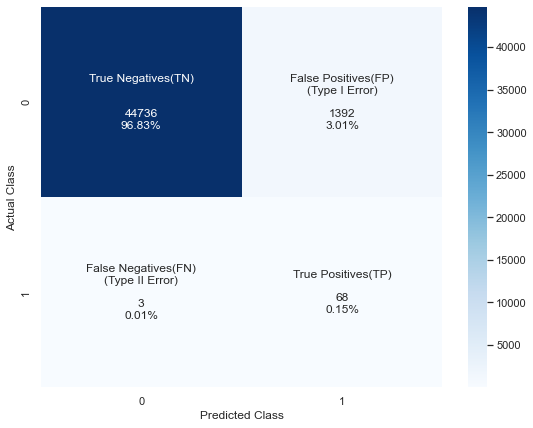

In [150]:
# LGBM Classifier | Model Tunning
study = study_KFold_lgbm
tuned_model = LGBMClassifier(n_estimators=study.best_params["n_estimators"], 
                             max_depth=study.best_params["max_depth"],
                             learning_rate=study.best_params["learning_rate"],
                             subsample=study.best_params["subsample"],
                             num_leaves=study.best_params["num_leaves"]).fit(X_train, y_train)

y_pred = tuned_model .predict(X_test)
print('Classification Report:\n\n', classification_report(y_test, y_pred))

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("LGBM_HU")
f1_scores_.append(f1_score(y_test, y_pred))
recall_scores_.append(recall_score(y_test, y_pred))
precision_scores_.append(precision_score(y_test, y_pred, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test, y_pred))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test, y_pred)
precision_recall_auc_scores_.append(auc(recall_, precision_))

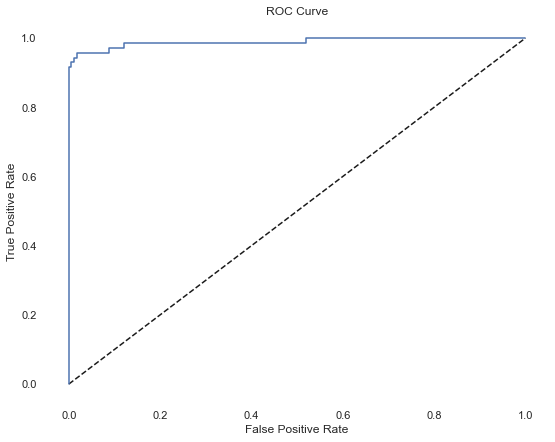


Optimal Threshold, Roc-Auc: 0.8577468348567189 



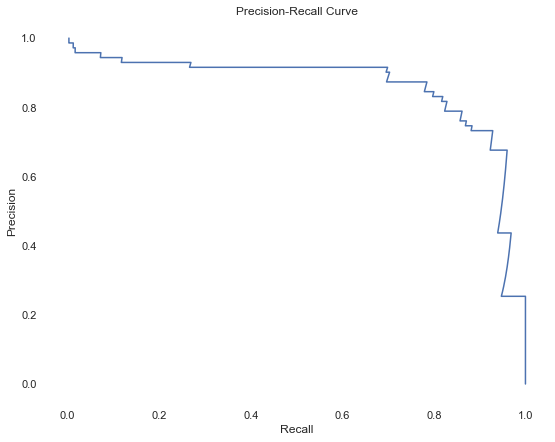


Optimal Threshold, Precision and Recall Curve: 0.999998045224646


In [151]:
# Prediction Probabilities
y_pred_proba = tuned_model.predict_proba(X_test)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

#### LGBM | Feature Importance | Shap

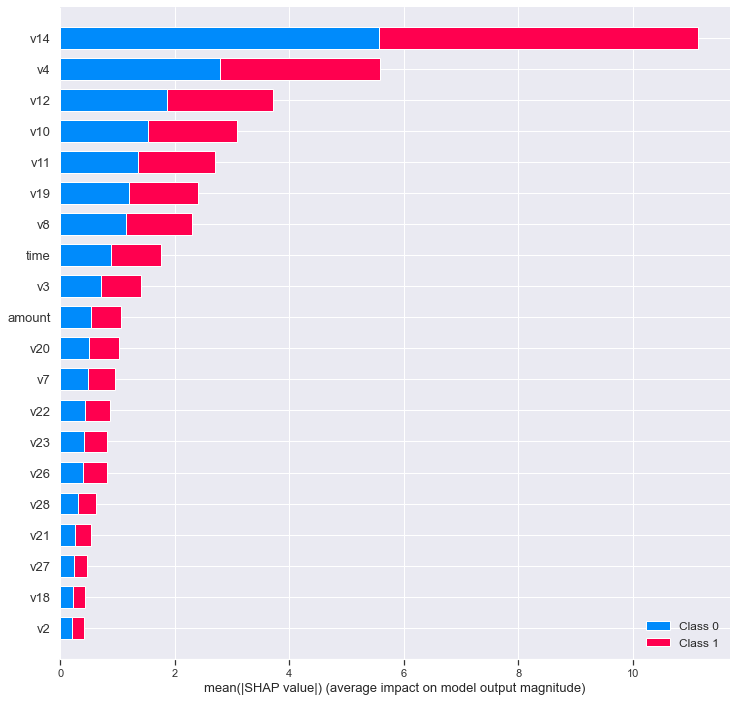

In [152]:
# import shap
explainercat = shap.TreeExplainer(tuned_model)
shap_values_rf_test = explainercat.shap_values(X_test)
shap_values_rf_train = explainercat.shap_values(X_train)
shap.summary_plot(shap_values_rf_train, X_train, plot_type="bar", plot_size=(12,12))

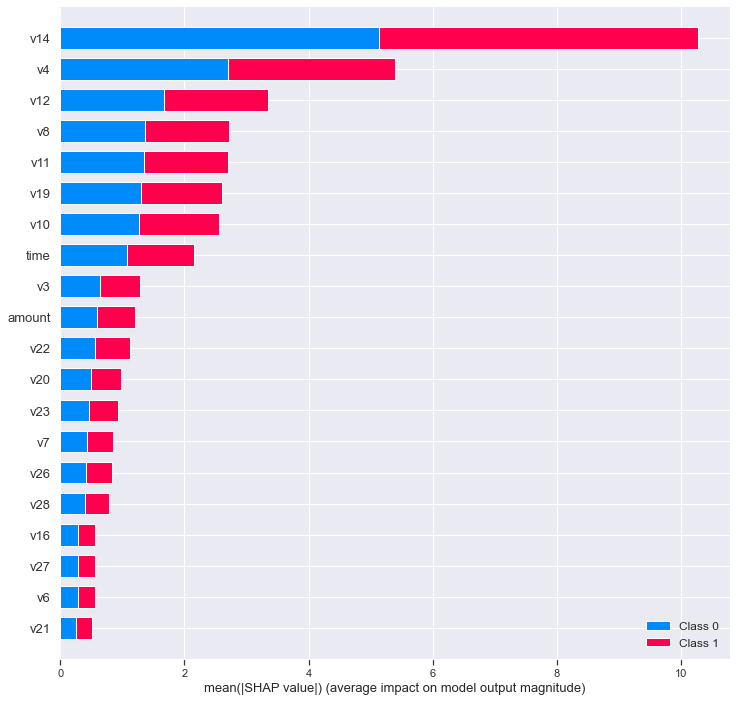

In [243]:
shap.summary_plot(shap_values_rf_test, X_test, plot_type="bar", plot_size=(12,12))

### 5.1.4 Neural Networks | Hard Unsampled Data

class_weights: {0: 1.0, 1: 1.0}
Restoring model weights from the end of the best epoch.
Epoch 00033: early stopping

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                1984      
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_____

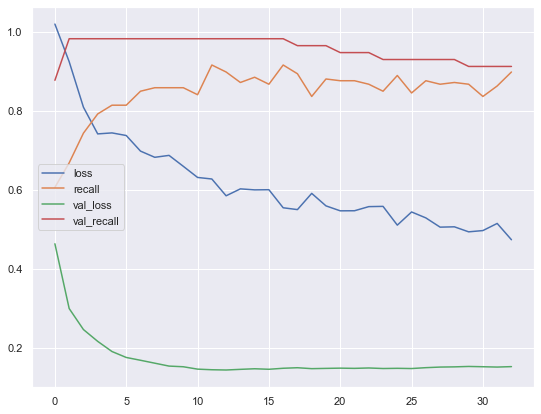

In [153]:
# Import Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, Adamax, RMSprop,Adadelta
from tensorflow.keras.layers import Dropout
from sklearn.utils import class_weight
from sklearn.utils import compute_class_weight
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# Define Model
dl_model = Sequential()
dl_model.add(Dense(64, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(32, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(16, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(1, activation = "sigmoid"))

# Compile Model
optimizer = SGD(lr = 0.001)
dl_model.compile(loss = 'binary_crossentropy',
                 optimizer = optimizer,
                 metrics = ["Recall"])

# Fit Model
train_classes = y_train
class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(train_classes),
                                     y = train_classes)
class_weights = dict(zip(np.unique(train_classes), class_weights))
print("class_weights:", class_weights)

# Early Stop
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20, restore_best_weights = True)

# Fit-Train
dl_model.fit(x = X_train,
             y = y_train,
             validation_split = 0.1, 
             batch_size = 32,
             epochs = 500, verbose = 0, 
             callbacks = [early_stop],
             class_weight = class_weights)
print()
print("Model Summary:\n", dl_model.summary())
print()

# Prediction and Model Evaluating
loss_df = pd.DataFrame(dl_model.history.history)
print("Loss:\n", loss_df.sort_values(by="recall", ascending=False).head(1))
print()
loss_df.plot();
print("Train:\n", dl_model.evaluate(X_train, y_train))
print()
print("Test:\n",dl_model.evaluate(X_test, y_test))

loss, accuracy = dl_model.evaluate(X_test, y_test, verbose=0)
print("Loss(Test)    :", loss)
print("Accuracy(Test):", accuracy)

# Confusion Matrix-Classification Report
y_pred = (dl_model.predict(X_test) > 0.5).astype("int32")
# y_pred = model.predict_classes(X_test)
print(confusion_matrix(y_test, y_pred))
print()
print("Test Report:\n", classification_report(y_test, y_pred))

# Scores to Comparing
model_abbrs_.append("ANN_HU")
f1_scores_.append(f1_score(y_test, y_pred))
recall_scores_.append(recall_score(y_test, y_pred))
precision_scores_.append(precision_score(y_test, y_pred, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test, y_pred))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test, y_pred)
precision_recall_auc_scores_.append(auc(recall_, precision_))

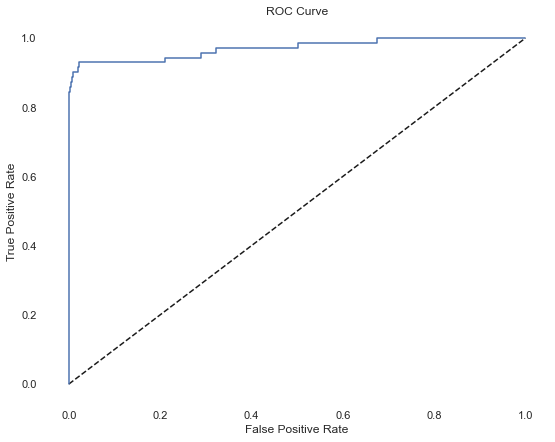


Optimal Threshold, Roc-Auc: 0.7099086 



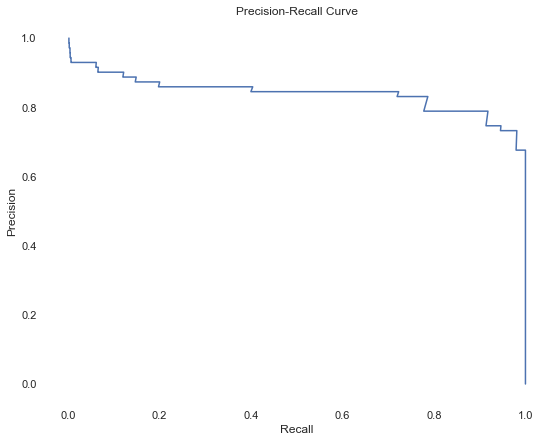


Optimal Threshold, Precision and Recall Curve: 0.857529


In [154]:
# Prediction Probabilities
y_pred_proba = dl_model.predict(X_test)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba)
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(precisions, recalls, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

## 5.2. Model Evaluation with All Data | Standard Scaled | Without Outliers

In [155]:
print("All Dataset:\n")
df_X_all = pd.DataFrame(data=X_train_, columns=X_numerical_list)
df_y_all = pd.DataFrame(data=y_train_, columns=[target])
df_all = pd.concat([df_X_all, df_y_all], axis=1)
df_all.head(1)  # Dataset
print("Train Classes:\n", pd.DataFrame(y_train_).rename({0:"class"}, axis=1)[target].value_counts(), "\n", sep="")
shape_control(df_, X_train_, y_train_, X_test_, y_test_)

All Dataset:

Train Classes:
0    184512
1       283
Name: class, dtype: int64

df.shape: (230994, 31)
X_train.shape: (184795, 30)
y_train.shape: (184795,)
X_test.shape: (46199, 30)
y_test.shape: (46199,)


### 5.2.1 Logistic Regression | All Data | Standard Scaled | Without Outliers

In [156]:
study = study_log
study_KFold = study_KFold_log
print("Without outliers|Dataset|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("Without outliers|Dataset|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parameters", study_KFold.best_params)

Without outliers|Dataset|Recall|Macro: 0.974 Best Parameters: {'class_weight': None, 'penalty': 'l2', 'solver2': 'newton-cg', 'l1_ratio': 0, 'C': 0.0304158799332035, 'max_iter': 600}
Without outliers|Dataset|Recall|KFold: 0.929 Best Parameters {'class_weight': None, 'penalty': 'none', 'solver2': 'newton-cg', 'l1_ratio': 0, 'C': 18.734818693199628, 'max_iter': 9800}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46128
           1       1.00      0.87      0.93        71

    accuracy                           1.00     46199
   macro avg       1.00      0.94      0.97     46199
weighted avg       1.00      1.00      1.00     46199



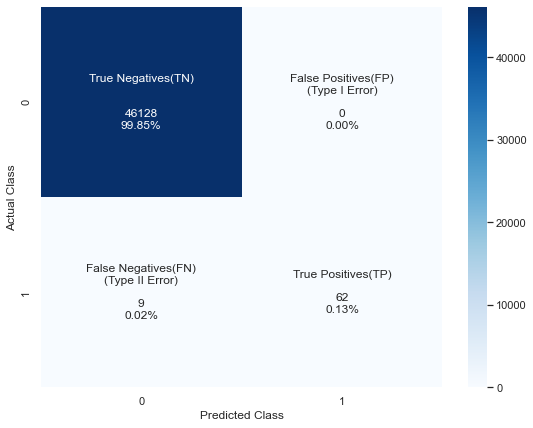

In [157]:
# Logistic Regression | Model Tunning 
study = study_log
tuned_model = LogisticRegression(class_weight=study.best_params["class_weight"],
                                penalty=study.best_params["penalty"],
                                solver=study.best_params["solver2"],
                                l1_ratio=study.best_params["l1_ratio"],
                                C=study.best_params["C"],
                                max_iter=study.best_params["max_iter"]).fit(X_train_, y_train_)

y_pred_ = tuned_model .predict(X_test_)
print('Classification Report:\n\n', classification_report(y_test_, y_pred_))

cf_matrix = confusion_matrix(y_test_, y_pred_)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("LR_Dataset")
f1_scores_.append(f1_score(y_test_, y_pred_))
recall_scores_.append(recall_score(y_test_, y_pred_))
precision_scores_.append(precision_score(y_test_, y_pred_, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test_, y_pred_))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test_, y_pred_)
precision_recall_auc_scores_.append(auc(recall_, precision_))

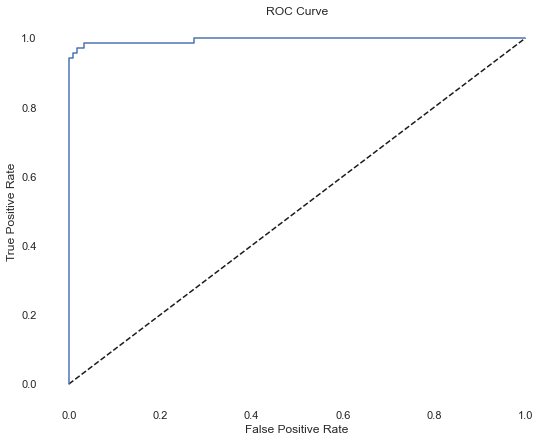


Optimal Threshold, Roc-Auc: 0.0019382219148193183 



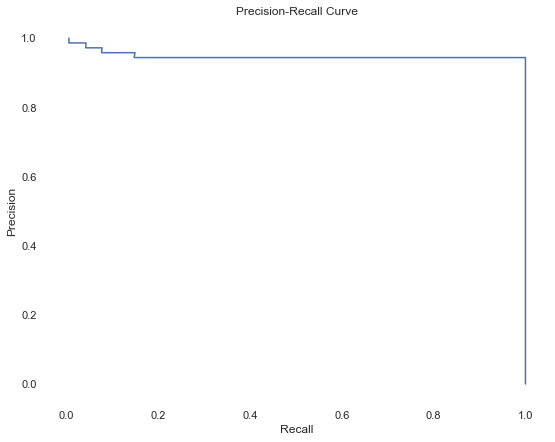


Optimal Threshold, Precision and Recall Curve: 0.12114313038428404


In [158]:
# Prediction Probabilities
y_pred_proba = tuned_model.predict_proba(X_test)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

### 5.2.2 RandomForest Classifier | All Data | Standard Scaled | Without Outliers

In [159]:
study = study_rf
study_KFold = study_KFold_rf
print("Without outliers|Dataset|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("Without outliers|Dataset|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parameters", study_KFold.best_params)

Without outliers|Dataset|Recall|Macro: 0.974 Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 9664, 'bootstrap': 'False', 'n_estimators': 45, 'max_depth': 5, 'min_samples_split': 6}
Without outliers|Dataset|Recall|KFold: 0.898 Best Parameters {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 2347, 'bootstrap': 'True', 'n_estimators': 65, 'max_depth': 11, 'min_samples_split': 3}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46128
           1       1.00      0.96      0.98        71

    accuracy                           1.00     46199
   macro avg       1.00      0.98      0.99     46199
weighted avg       1.00      1.00      1.00     46199



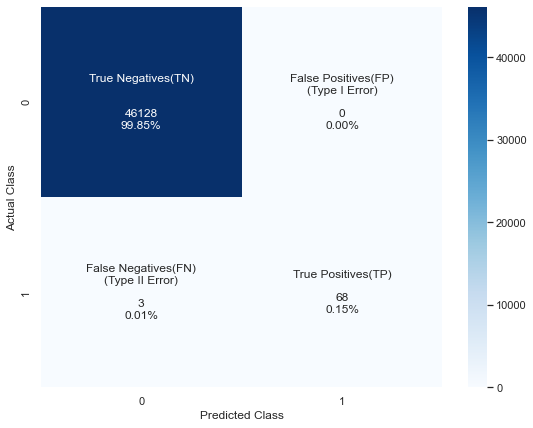

In [160]:
# RandomForest Classifier | Model Tunning
study = study_KFold_rf
tuned_model = RandomForestClassifier(bootstrap=study.best_params['bootstrap'], 
                                    criterion=study.best_params['criterion'],
                                    max_depth=study.best_params['max_depth'],
                                    max_features=study.best_params['max_features'],
                                    max_leaf_nodes=study.best_params['max_leaf_nodes'],
                                    n_estimators=study.best_params['n_estimators'],
                                    n_jobs=-1).fit(X_train_, y_train_)

y_pred_ = tuned_model .predict(X_test_)
print('Classification Report:\n\n', classification_report(y_test_, y_pred_))

cf_matrix = confusion_matrix(y_test_, y_pred_)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("RF_Dataset")
f1_scores_.append(f1_score(y_test_, y_pred_))
recall_scores_.append(recall_score(y_test_, y_pred_))
precision_scores_.append(precision_score(y_test_, y_pred_, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test_, y_pred_))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test_, y_pred_)
precision_recall_auc_scores_.append(auc(recall_, precision_))

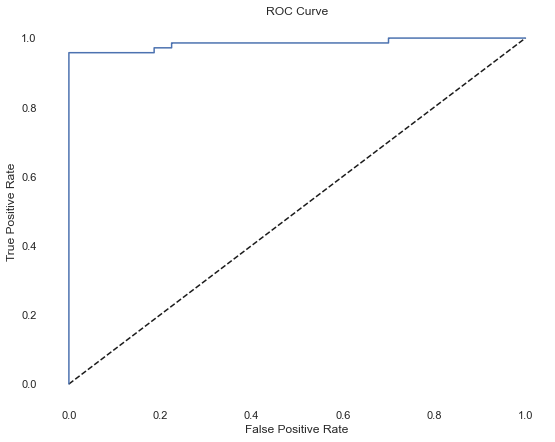


Optimal Threshold, Roc-Auc: 0.5246120252319878 



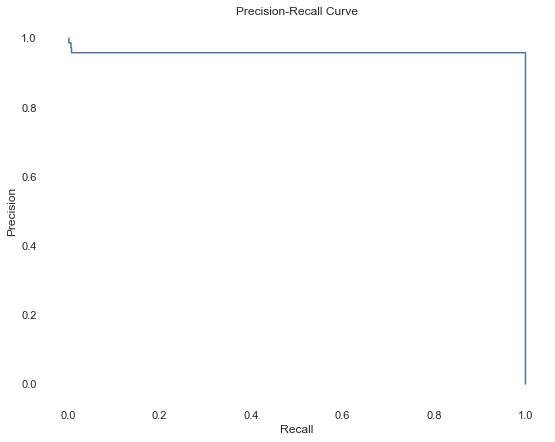


Optimal Threshold, Precision and Recall Curve: 0.5246120252319878


In [161]:
# Prediction Probabilities
y_pred_proba_ = tuned_model.predict_proba(X_test_)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test_, y_pred_proba_[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test_, y_pred_proba_[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test_, y_pred_proba_[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test_, y_pred_proba_[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

### 5.2.3 LGBM Classifier | All Data | Standard Scaled | Without Outliers

In [162]:
study = study_lgbm
study_KFold = study_KFold_lgbm
print("Without outliers|Dataset|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("Without outliers|Dataset|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parameters", study_KFold.best_params)

Without outliers|Dataset|Recall|Macro: 0.966 Best Parameters: {'n_estimators': 570, 'max_depth': 16, 'learning_rate': 0.015328329855618966, 'subsample': 0.5175156726973662, 'num_leaves': 130}
Without outliers|Dataset|Recall|KFold: 0.919 Best Parameters {'n_estimators': 690, 'max_depth': 5, 'learning_rate': 0.07405072403688212, 'subsample': 0.3828656631865241, 'num_leaves': 80}


classification_report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46128
           1       1.00      0.92      0.96        71

    accuracy                           1.00     46199
   macro avg       1.00      0.96      0.98     46199
weighted avg       1.00      1.00      1.00     46199



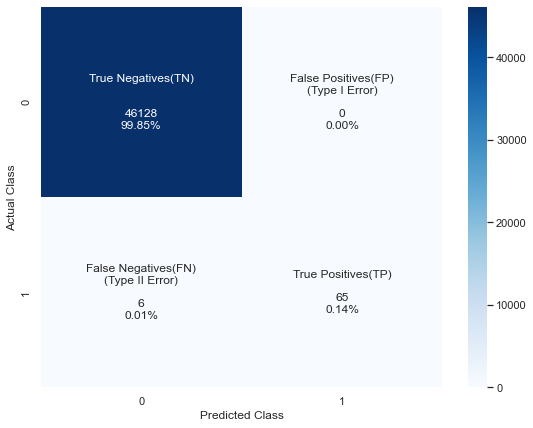

In [163]:
# LGBM Classifier | Model Tunning
study = study_lgbm
tuned_model = LGBMClassifier(n_estimators=study.best_params["n_estimators"], 
                            max_depth=study.best_params["max_depth"],
                            learning_rate=study.best_params["learning_rate"],
                            subsample=study.best_params["subsample"],
                            num_leaves=study.best_params["num_leaves"]).fit(X_train_, y_train_)

y_pred_ = tuned_model.predict(X_test_)
print('classification_report:\n\n', classification_report(y_test_, y_pred_))

cf_matrix = confusion_matrix(y_test_, y_pred_)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("LGBM_Dataset")
f1_scores_.append(f1_score(y_test_, y_pred_))
recall_scores_.append(recall_score(y_test_, y_pred_))
precision_scores_.append(precision_score(y_test_, y_pred_, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test_, y_pred_))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test_, y_pred_)
precision_recall_auc_scores_.append(auc(recall_, precision_))

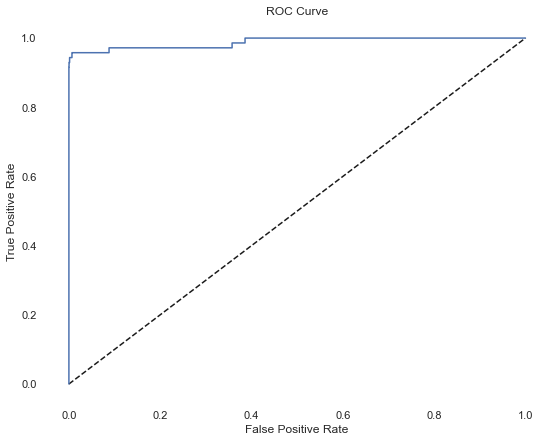


Optimal Threshold, Roc-Auc: 2.945211728811655e-06 



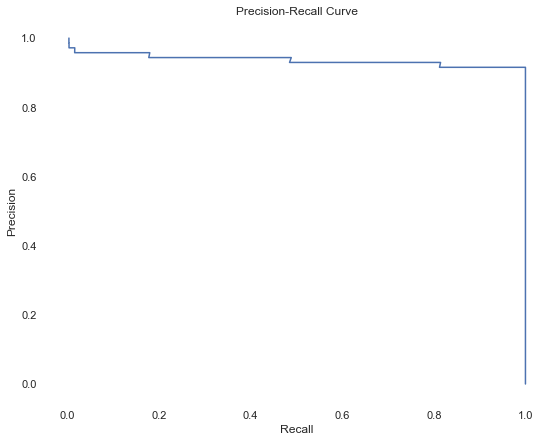


Optimal Threshold, Precision and Recall Curve: 0.9683833642694286


In [164]:
# Prediction Probabilities
y_pred_proba_ = tuned_model.predict_proba(X_test_)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test_, y_pred_proba_[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test_, y_pred_proba_[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test_, y_pred_proba_[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test_, y_pred_proba_[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

### 5.2.4 Neural Networks | All Data | Standard Scaled | Without Outliers

class_weights: {0: 0.500766887790496, 1: 326.4929328621908}
Restoring model weights from the end of the best epoch.
Epoch 00065: early stopping

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 64)                1984      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_4 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 16)                528       
_________________________________________________________________
dropout_5 (Dropout)          (None, 16)  

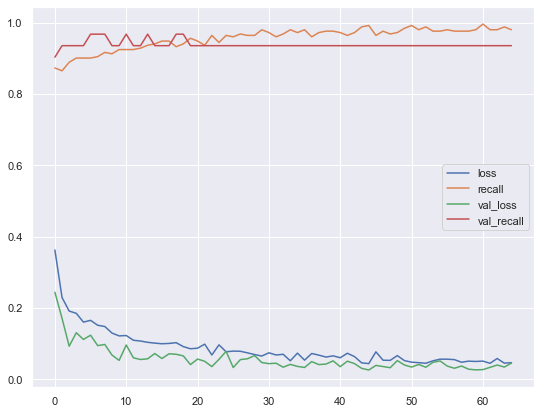

In [165]:
# Import Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, Adamax, RMSprop,Adadelta
from tensorflow.keras.layers import Dropout
from sklearn.utils import class_weight
from sklearn.utils import compute_class_weight
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# Define Model
dl_model = Sequential()
dl_model.add(Dense(64, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(32, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(16, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(1, activation = "sigmoid"))

# Compile Model
optimizer = SGD(lr = 0.001)
dl_model.compile(loss = 'binary_crossentropy',
                 optimizer = optimizer,
                 metrics = ["Recall"])

# Fit Model
train_classes = y_train_
class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(train_classes),
                                     y = train_classes)
class_weights = dict(zip(np.unique(train_classes), class_weights))
print("class_weights:", class_weights)

# Early Stop
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20, restore_best_weights = True)

# Fit-Train
dl_model.fit(x = X_train_,
             y = y_train_,
             validation_split = 0.1, 
             batch_size = 32,
             epochs = 500, verbose = 0, 
             callbacks = [early_stop],
             class_weight = class_weights)
print()
print("Model Summary:\n", dl_model.summary())
print()

# Prediction and Model Evaluating
loss_df = pd.DataFrame(dl_model.history.history)
print("Loss:\n", loss_df.head())
print()
loss_df.plot();
print("Train:\n", dl_model.evaluate(X_train_, y_train_))
print()
print("Test:\n",dl_model.evaluate(X_test_, y_test_))

loss, accuracy = dl_model.evaluate(X_test_, y_test_, verbose=0)
print("Loss(Test)    :", loss)
print("Accuracy(Test):", accuracy)

# Confusion Matrix-Classification Report
y_pred_ = (dl_model.predict(X_test_) > 0.5).astype("int32")
print(confusion_matrix(y_test_, y_pred_))
print()
print("Test Report:\n", classification_report(y_test_, y_pred_))

# Scores to Comparing
model_abbrs_.append("ANN_Dataset")
f1_scores_.append(f1_score(y_test_, y_pred_))
recall_scores_.append(recall_score(y_test_, y_pred_))
precision_scores_.append(precision_score(y_test_, y_pred_, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test_, y_pred_))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test_, y_pred_)
precision_recall_auc_scores_.append(auc(recall_, precision_))

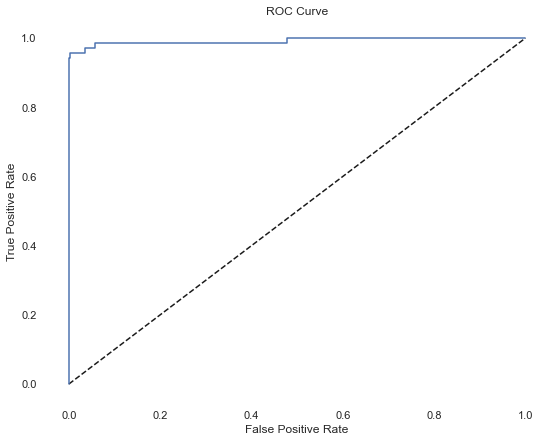


Optimal Threshold, Roc-Auc: 0.8523624


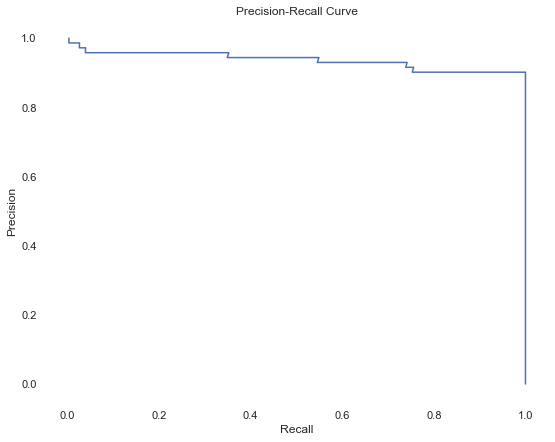


Optimal Threshold, Precision and Recall Curve: 0.99234575


In [166]:
# Proediction Probabilities
y_pred_proba_ = dl_model.predict(X_test_)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test_, y_pred_proba_)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test_, y_pred_proba_)
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold)

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test_, y_pred_proba_)
plt.plot(precisions, recalls, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test_, y_pred_proba_)
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

## 5.3 Model Evaluation | Standard Scaled | Without Outliers | Over-Under Sampled Data

In [167]:
# Dataset = Over-Under Sampled Data

# Resampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 
from imblearn.pipeline import Pipeline

# # Hard Undersampling
# X_train, y_train = RandomUnderSampler(random_state=42).fit_resample(X_train_, y_train_)

# Over Under Sampling
over = RandomOverSampler(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)
X_train__, y_train__= pipeline.fit_resample(X_train_, y_train_)

print("Train Classes before resampling:\n", pd.DataFrame(y_train_).rename({0:"class"}, axis=1)[target].value_counts(), "\n", sep="")
print("Train Classes after resampling:\n", pd.DataFrame(y_train__).rename({0:"class"}, axis=1)[target].value_counts(), "\n", sep="")
print("Test Classes:\n", pd.DataFrame(y_test__).rename({0:"class"}, axis=1)[target].value_counts(), "\n", sep="")

print("Over under-sampled Dataset:")
__df_X = pd.DataFrame(data=X_train__, columns=X_numerical_list )
__df_y= pd.DataFrame(data=y_train__, columns=[target])
__df = pd.concat([__df_X, __df_y], axis=1)
__df.head(1)  # OU
print(shape_control(__df, X_train__, y_train__, X_test__, y_test__), "\n")

Train Classes before resampling:
0    184512
1       283
Name: class, dtype: int64

Train Classes after resampling:
0    36902
1    18451
Name: class, dtype: int64

Test Classes:
0    46128
1       71
Name: class, dtype: int64

Over under-sampled Dataset:
df.shape: (55353, 31)
X_train.shape: (55353, 30)
y_train.shape: (55353,)
X_test.shape: (46199, 30)
y_test.shape: (46199,)
None 



### 5.3.1 Logistic Regression | Standard Scaled | Without Outliers | Over-Under Sampled Data

In [168]:
study = study_log
study_KFold = study_KFold_log
print("OU|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("OU|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parameters", study_KFold.best_params)

OU|Recall|Macro: 0.974 Best Parameters: {'class_weight': None, 'penalty': 'l2', 'solver2': 'newton-cg', 'l1_ratio': 0, 'C': 0.0304158799332035, 'max_iter': 600}
OU|Recall|KFold: 0.929 Best Parameters {'class_weight': None, 'penalty': 'none', 'solver2': 'newton-cg', 'l1_ratio': 0, 'C': 18.734818693199628, 'max_iter': 9800}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.99      1.00     46128
           1       0.13      0.96      0.23        71

    accuracy                           0.99     46199
   macro avg       0.57      0.97      0.61     46199
weighted avg       1.00      0.99      0.99     46199



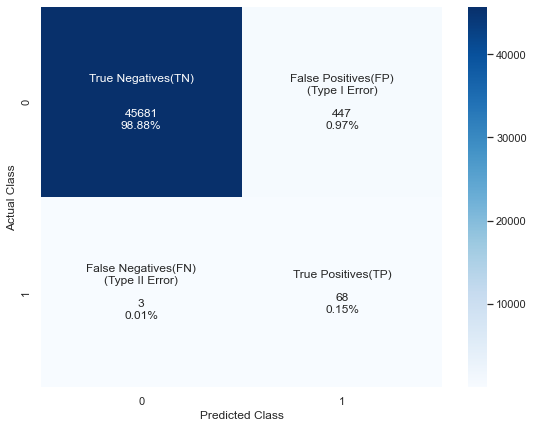

In [170]:
# Logistic Regression | Model Tunning 
study = study_log
# 0       1.00      0.93      0.96     46128
# 1       0.02      0.99      0.04        71
tuned_model = LogisticRegression(class_weight=study.best_params["class_weight"],
                                penalty=study.best_params["penalty"],
                                solver=study.best_params["solver2"],
                                l1_ratio=study.best_params["l1_ratio"],
                                C=study.best_params["C"],
                                max_iter=study.best_params["max_iter"]).fit(X_train__, y_train__)

y_pred__ = tuned_model .predict(X_test__)
print('Classification Report:\n\n', classification_report(y_test__, y_pred__))

cf_matrix = confusion_matrix(y_test__, y_pred__)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("LR_OU")
f1_scores_.append(f1_score(y_test__, y_pred__))
recall_scores_.append(recall_score(y_test__, y_pred__))
precision_scores_.append(precision_score(y_test__, y_pred__, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test__, y_pred__))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test__, y_pred__)
precision_recall_auc_scores_.append(auc(recall_, precision_))

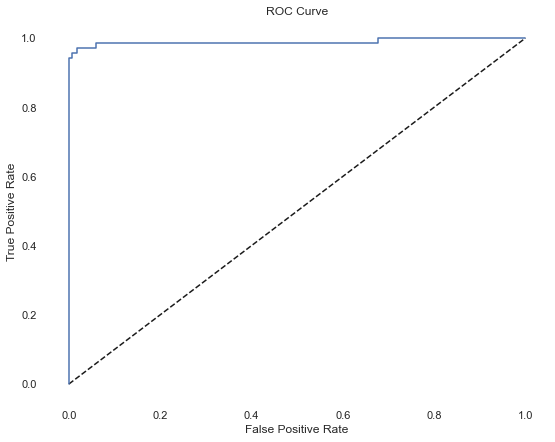


Optimal Threshold, Roc-Auc: 0.3674265873800277 



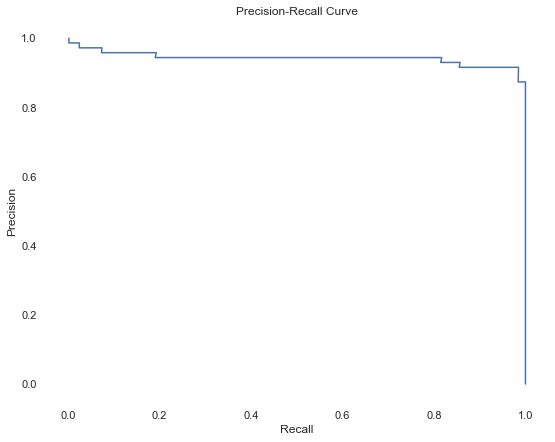


Optimal Threshold, Precision and Recall Curve: 0.9901388039445412


In [171]:
# Prediction Probabilities
y_pred_proba__ = tuned_model.predict_proba(X_test__)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test__, y_pred_proba__[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test__, y_pred_proba__[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test__, y_pred_proba__[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test__, y_pred_proba__[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

### 5.3.2 RandomForest Classifier | Standard Scaled | Without Outliers | Over-Under Sampled Data

In [172]:
study = study_rf
study_KFold = study_KFold_rf
print("OU|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("OU|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parameters", study_KFold.best_params)

OU|Recall|Macro: 0.974 Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 9664, 'bootstrap': 'False', 'n_estimators': 45, 'max_depth': 5, 'min_samples_split': 6}
OU|Recall|KFold: 0.898 Best Parameters {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 2347, 'bootstrap': 'True', 'n_estimators': 65, 'max_depth': 11, 'min_samples_split': 3}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46128
           1       0.66      0.93      0.77        71

    accuracy                           1.00     46199
   macro avg       0.83      0.96      0.89     46199
weighted avg       1.00      1.00      1.00     46199



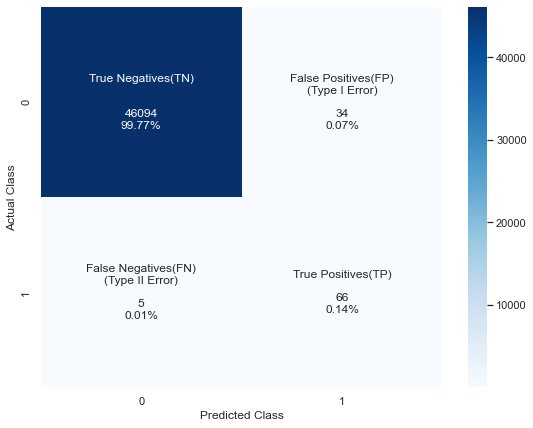

In [173]:
# RandomForest Classifier | Model Tunning
study = study_rf
tuned_model = RandomForestClassifier(bootstrap=study.best_params['bootstrap'], 
                                    criterion=study.best_params['criterion'],
                                    max_depth=study.best_params['max_depth'],
                                    max_features=study.best_params['max_features'],
                                    max_leaf_nodes=study.best_params['max_leaf_nodes'],
                                    n_estimators=study.best_params['n_estimators'],
                                    n_jobs=-1).fit(X_train__, y_train__)

y_pred__ = tuned_model .predict(X_test__)
print('Classification Report:\n\n', classification_report(y_test__, y_pred__))

cf_matrix = confusion_matrix(y_test__, y_pred__)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("RF_OU")
f1_scores_.append(f1_score(y_test__, y_pred__))
recall_scores_.append(recall_score(y_test__, y_pred__))
precision_scores_.append(precision_score(y_test__, y_pred__, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test__, y_pred__))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test__, y_pred__)
precision_recall_auc_scores_.append(auc(recall_, precision_))

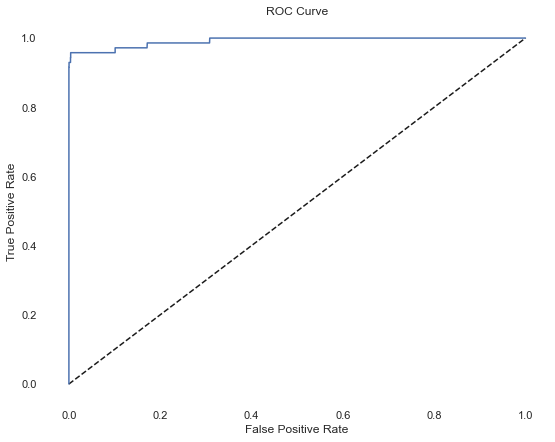


Optimal Threshold, Roc-Auc: 0.3418762359954303 



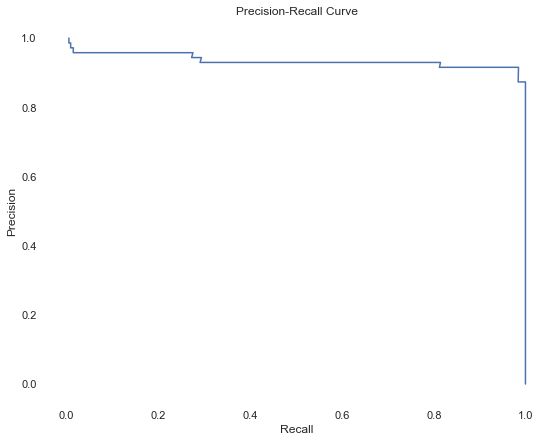


Optimal Threshold, Precision and Recall Curve: 0.7780613953701031


In [174]:
# Prediction Probabilities
y_pred_proba__ = tuned_model.predict_proba(X_test__)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test__, y_pred_proba__[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test__, y_pred_proba__[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test__, y_pred_proba__[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test__, y_pred_proba__[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

### 5.3.3 LGBM Classifier | Standard Scaled | Without Outliers | Over-Under Sampled Data

In [175]:
study = study_lgbm
study_KFold = study_KFold_lgbm
print("OU|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("OU|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parameters", study_KFold.best_params)

OU|Recall|Macro: 0.966 Best Parameters: {'n_estimators': 570, 'max_depth': 16, 'learning_rate': 0.015328329855618966, 'subsample': 0.5175156726973662, 'num_leaves': 130}
OU|Recall|KFold: 0.919 Best Parameters {'n_estimators': 690, 'max_depth': 5, 'learning_rate': 0.07405072403688212, 'subsample': 0.3828656631865241, 'num_leaves': 80}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46128
           1       0.97      0.93      0.95        71

    accuracy                           1.00     46199
   macro avg       0.99      0.96      0.97     46199
weighted avg       1.00      1.00      1.00     46199



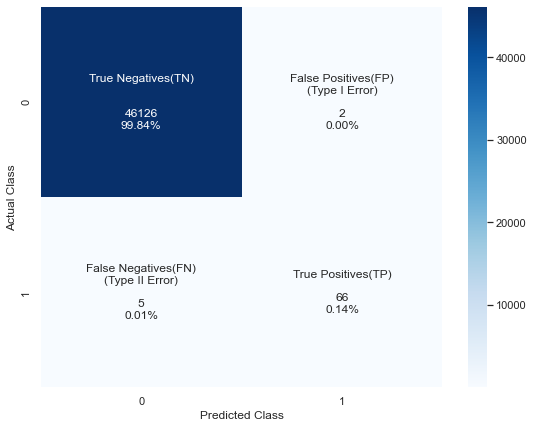

In [176]:
# LGBM Classifier | Model Tunning
study = study_KFold_lgbm
# 0       1.00      0.58      0.73     46128
# 1       0.00      1.00      0.01        71
tuned_model = LGBMClassifier(n_estimators=study.best_params["n_estimators"], 
                            max_depth=study.best_params["max_depth"],
                            learning_rate=study.best_params["learning_rate"],
                            subsample=study.best_params["subsample"],
                            num_leaves=study.best_params["num_leaves"]).fit(X_train__, y_train__)

y_pred__ = tuned_model .predict(X_test__)
print('Classification Report:\n\n', classification_report(y_test__, y_pred__))

cf_matrix = confusion_matrix(y_test__, y_pred__)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("LGBM_OU")
f1_scores_.append(f1_score(y_test__, y_pred__))
recall_scores_.append(recall_score(y_test__, y_pred__))
precision_scores_.append(precision_score(y_test__, y_pred__, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test__, y_pred__))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test__, y_pred__)
precision_recall_auc_scores_.append(auc(recall_, precision_))

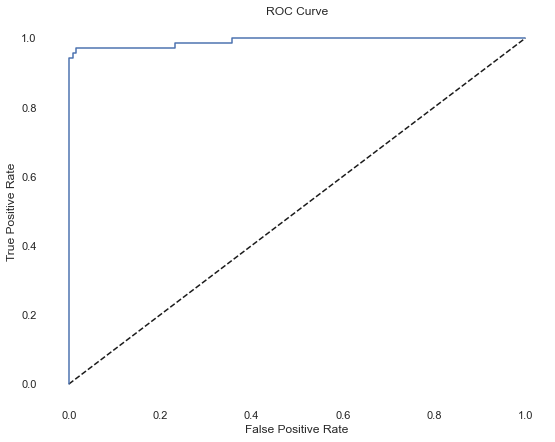


Optimal Threshold, Roc-Auc: 1.3369311082447288e-06 



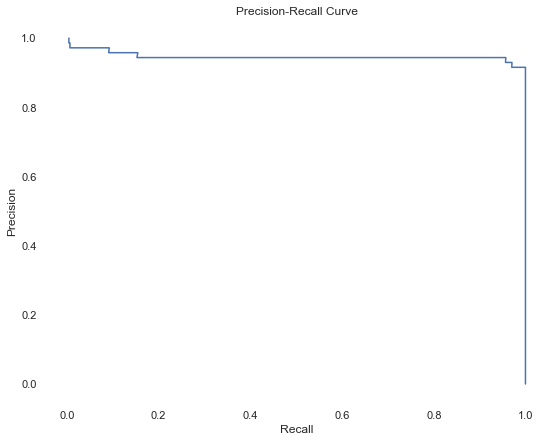


Optimal Threshold, Precision and Recall Curve: 0.9999155273827882


In [177]:
# Prediction Probabilities
y_pred_proba__ = tuned_model.predict_proba(X_test__)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test__, y_pred_proba__[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test__, y_pred_proba__[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test__, y_pred_proba__[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test__, y_pred_proba__[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

### 5.3.4 Neural Networks | Standard Scaled | Without Outliers | Over-Under Sampled Data

class_weights: {0: 0.75, 1: 1.5}

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                1984      
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dropout_7 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_8 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_11 (Dense)    

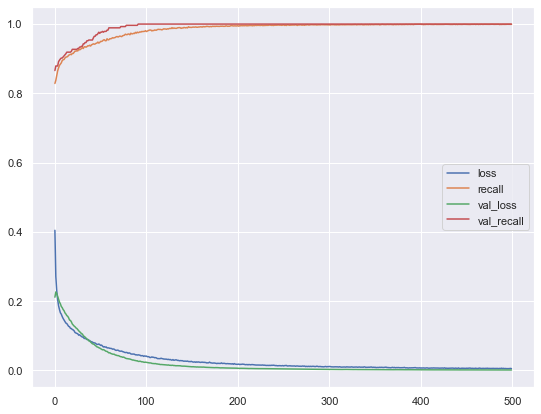

In [178]:
# Import Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, Adamax, RMSprop,Adadelta
from tensorflow.keras.layers import Dropout
from sklearn.utils import class_weight
from sklearn.utils import compute_class_weight
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# Define Model
dl_model = Sequential()
dl_model.add(Dense(64, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(32, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(16, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(1, activation = "sigmoid"))

# Compile Model
optimizer = SGD(lr = 0.001)
dl_model.compile(loss = 'binary_crossentropy',
                 optimizer = optimizer,
                 metrics = ["Recall"])

# Fit Model
train_classes = y_train__
class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(train_classes),
                                     y = train_classes)
class_weights = dict(zip(np.unique(train_classes), class_weights))
print("class_weights:", class_weights)

# Early Stop
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20, restore_best_weights = True)

# Fit-Train
dl_model.fit(x = X_train__,
             y = y_train__,
             validation_split = 0.1, 
             batch_size = 32,
             epochs = 500, verbose = 0, 
             callbacks = [early_stop],
             class_weight = class_weights)
print()
print("Model Summary:\n", dl_model.summary())
print()

# Prediction and Model Evaluating
loss_df = pd.DataFrame(dl_model.history.history)
print("Loss:\n", loss_df.head())
print()
loss_df.plot();
print("Train:\n", dl_model.evaluate(X_train__, y_train__))
print()
print("Test:\n",dl_model.evaluate(X_test__, y_test__))

loss, accuracy = dl_model.evaluate(X_test__, y_test__, verbose=0)
print("Loss(Test)    :", loss)
print("Accuracy(Test):", accuracy)

# Confusion Matrix-Classification Report
y_pred__ = (dl_model.predict(X_test__) > 0.5).astype("int32")
print(confusion_matrix(y_test__, y_pred__))
print()
print("Test Report:\n", classification_report(y_test__, y_pred__))

# Scores to Comparing
model_abbrs_.append("ANN_OU")
f1_scores_.append(f1_score(y_test__, y_pred__))
recall_scores_.append(recall_score(y_test__, y_pred__))
precision_scores_.append(precision_score(y_test__, y_pred__, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test__, y_pred__))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test__, y_pred__)
precision_recall_auc_scores_.append(auc(recall_, precision_))

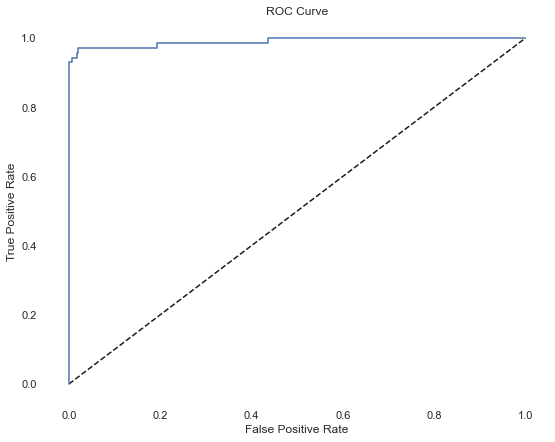


Optimal Threshold, Roc-Auc: 0.00012615323 



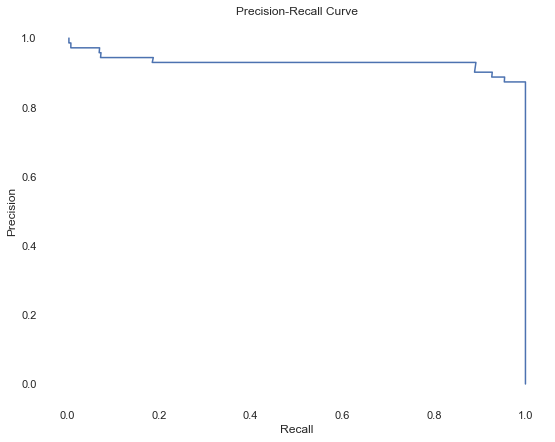


Optimal Threshold, Precision and Recall Curve: 0.9999957


In [179]:
# Proediction Probabilities
y_pred_proba__ = dl_model.predict(X_test__)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test__, y_pred_proba__)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test__, y_pred_proba__)
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test__, y_pred_proba__)
plt.plot(precisions, recalls, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test__, y_pred_proba__)
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

## 5.4 Model Evaluation | Standard Scaled | Without Outliers | Smote | Tomek

In [180]:
# Dataset = SMOTETomek Sampled Data

# Resampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 
from imblearn.pipeline import Pipeline

# # Hard Undersampling
# X_train, y_train = RandomUnderSampler(random_state=42).fit_resample(X_train_, y_train_)

# # Over Under Sampling
# over = RandomOverSampler(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# X_train__, y_train__= pipeline.fit_resample(X_train_, y_train_)

# SMOTETomek Sampling
X_train___, y_train___ = SMOTETomek().fit_resample(X_train_, y_train_)

print("Train Classes before resampling:\n", pd.DataFrame(y_train_).rename({0:"class"}, axis=1)[target].value_counts(), "\n", sep="")
print("Train Classes after resampling:\n", pd.DataFrame(y_train___).rename({0:"class"}, axis=1)[target].value_counts(), "\n", sep="")
print("Test Classes:\n", pd.DataFrame(y_test___).rename({0:"class"}, axis=1)[target].value_counts(), "\n", sep="")

print("Over under-sampled Dataset:")
___df_X = pd.DataFrame(data=X_train___, columns=X_numerical_list )
___df_y= pd.DataFrame(data=y_train___, columns=[target])
___df = pd.concat([___df_X, ___df_y], axis=1)
___df.head(1)  # OU
print(shape_control(___df, X_train___, y_train___, X_test___, y_test___), "\n")

Train Classes before resampling:
0    184512
1       283
Name: class, dtype: int64

Train Classes after resampling:
0    184512
1    184512
Name: class, dtype: int64

Test Classes:
0    46128
1       71
Name: class, dtype: int64

Over under-sampled Dataset:
df.shape: (369024, 31)
X_train.shape: (369024, 30)
y_train.shape: (369024,)
X_test.shape: (46199, 30)
y_test.shape: (46199,)
None 



### 5.4.1 Logistic Regression | Standard Scaled | Without Outliers | Smote | Tomek

In [181]:
study = study_log
study_KFold = study_KFold_log
print("Tomek|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("Tomek|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parameters", study_KFold.best_params)

Tomek|Recall|Macro: 0.974 Best Parameters: {'class_weight': None, 'penalty': 'l2', 'solver2': 'newton-cg', 'l1_ratio': 0, 'C': 0.0304158799332035, 'max_iter': 600}
Tomek|Recall|KFold: 0.929 Best Parameters {'class_weight': None, 'penalty': 'none', 'solver2': 'newton-cg', 'l1_ratio': 0, 'C': 18.734818693199628, 'max_iter': 9800}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.99     46128
           1       0.05      0.97      0.10        71

    accuracy                           0.97     46199
   macro avg       0.53      0.97      0.54     46199
weighted avg       1.00      0.97      0.98     46199



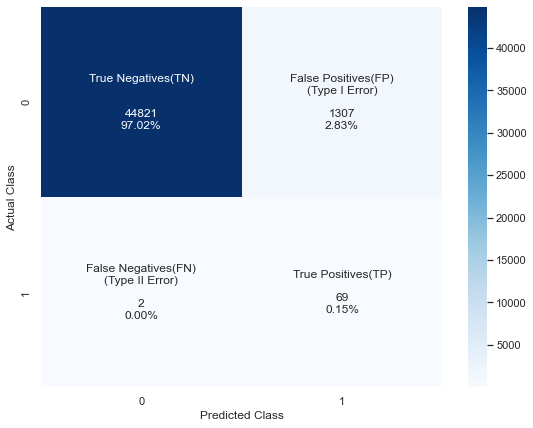

In [182]:
# Logistic Regression | Model Tunning
study = study_KFold_log
# 0       1.00      0.98      0.99     46128
# 1       0.06      0.97      0.11        71
tuned_model = LogisticRegression(class_weight=study.best_params["class_weight"],
                                penalty=study.best_params["penalty"],
                                solver=study.best_params["solver2"],
                                l1_ratio=study.best_params["l1_ratio"],
                                C=study.best_params["C"],
                                max_iter=study.best_params["max_iter"]).fit(X_train___, y_train___)

y_pred___ = tuned_model .predict(X_test___)
print('Classification Report:\n\n', classification_report(y_test___, y_pred___))

cf_matrix = confusion_matrix(y_test___, y_pred___)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("LR_Tomek")
f1_scores_.append(f1_score(y_test___, y_pred___))
recall_scores_.append(recall_score(y_test___, y_pred___))
precision_scores_.append(precision_score(y_test___, y_pred___, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test___, y_pred___))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test___, y_pred___)
precision_recall_auc_scores_.append(auc(recall_, precision_))

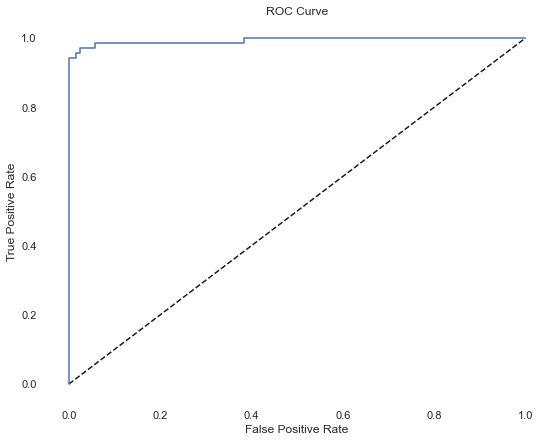


Optimal Threshold, Roc-Auc: 0.5636419590003185 



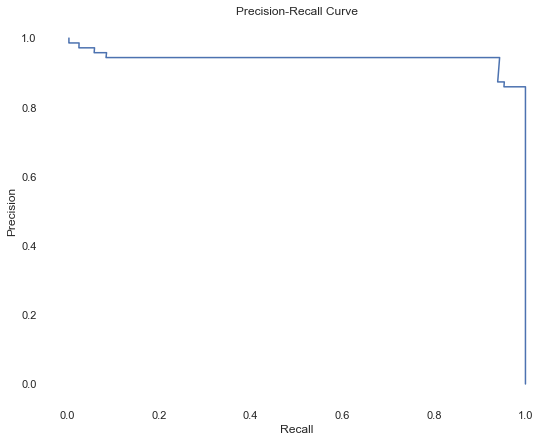


Optimal Threshold, Precision and Recall Curve: 0.9994950021798018


In [183]:
# Prediction Probabilities
y_pred_proba___ = tuned_model.predict_proba(X_test___)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test___, y_pred_proba___[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test___, y_pred_proba___[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test___, y_pred_proba___[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test___, y_pred_proba___[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

### 5.4.2 RandomForest Classifier | Standard Scaled | Without Outliers | Smote | Tomek

In [184]:
study = study_rf
study_KFold = study_KFold_rf
print("Tomek|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("Tomek|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parameters", study_KFold.best_params)

Tomek|Recall|Macro: 0.974 Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 9664, 'bootstrap': 'False', 'n_estimators': 45, 'max_depth': 5, 'min_samples_split': 6}
Tomek|Recall|KFold: 0.898 Best Parameters {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 2347, 'bootstrap': 'True', 'n_estimators': 65, 'max_depth': 11, 'min_samples_split': 3}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46128
           1       0.66      0.92      0.77        71

    accuracy                           1.00     46199
   macro avg       0.83      0.96      0.88     46199
weighted avg       1.00      1.00      1.00     46199



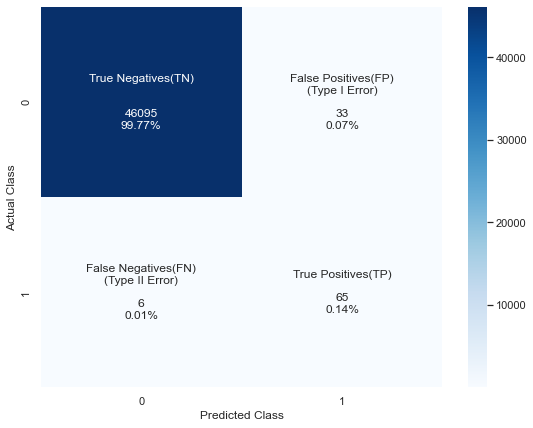

In [185]:
# RandomForest Classifier | Model Tunning
study = study_KFold_rf
# 0       1.00      1.00      1.00     46128
# 1       0.29      0.94      0.45        71
tuned_model = RandomForestClassifier(bootstrap=study.best_params['bootstrap'], 
                                    criterion=study.best_params['criterion'],
                                    max_depth=study.best_params['max_depth'],
                                    max_features=study.best_params['max_features'],
                                    max_leaf_nodes=study.best_params['max_leaf_nodes'],
                                    n_estimators=study.best_params['n_estimators'],
                                    n_jobs=-1).fit(X_train___, y_train___)
                                    
y_pred___ = tuned_model .predict(X_test___)
print('Classification Report:\n\n', classification_report(y_test___, y_pred___))

cf_matrix = confusion_matrix(y_test___, y_pred___)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("RF_Tomek")
f1_scores_.append(f1_score(y_test___, y_pred___))
recall_scores_.append(recall_score(y_test___, y_pred___))
precision_scores_.append(precision_score(y_test___, y_pred___, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test___, y_pred___))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test___, y_pred___)
precision_recall_auc_scores_.append(auc(recall_, precision_))

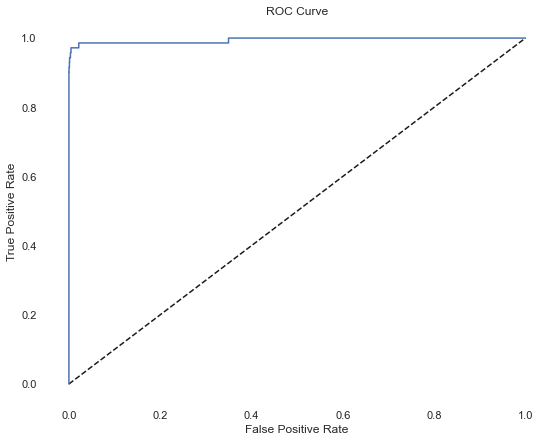


Optimal Threshold, Roc-Auc: 0.31947445113151773 



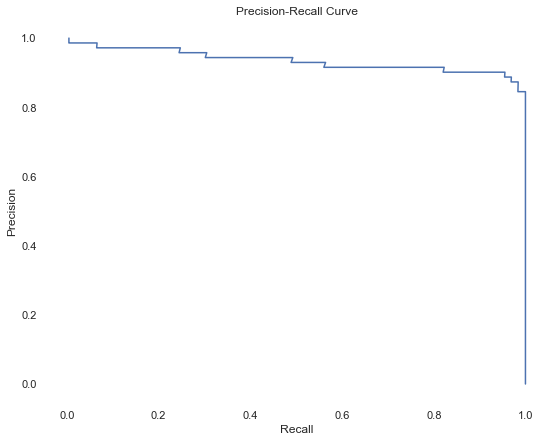


Optimal Threshold, Precision and Recall Curve: 0.7517022476798276


In [186]:
# Prediction Probabilities
y_pred_proba___ = tuned_model.predict_proba(X_test___)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test___, y_pred_proba___[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test___, y_pred_proba___[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test___, y_pred_proba___[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test___, y_pred_proba___[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

### 5.4.3 LGBM Classifier | Standard Scaled | Without Outliers | Smote | Tomek

In [187]:
study = study_lgbm
study_KFold = study_KFold_lgbm
print("Tomek|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("Tomek|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parameters", study_KFold.best_params)

Tomek|Recall|Macro: 0.966 Best Parameters: {'n_estimators': 570, 'max_depth': 16, 'learning_rate': 0.015328329855618966, 'subsample': 0.5175156726973662, 'num_leaves': 130}
Tomek|Recall|KFold: 0.919 Best Parameters {'n_estimators': 690, 'max_depth': 5, 'learning_rate': 0.07405072403688212, 'subsample': 0.3828656631865241, 'num_leaves': 80}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46128
           1       0.85      0.94      0.89        71

    accuracy                           1.00     46199
   macro avg       0.92      0.97      0.95     46199
weighted avg       1.00      1.00      1.00     46199



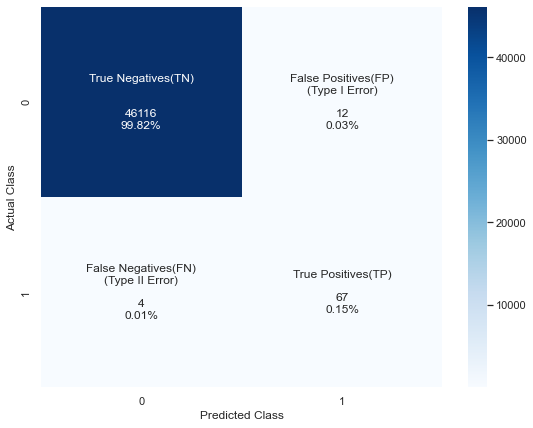

In [188]:
# LGBM Classifier | Model Tunning
study = study_KFold_lgbm
# 0       1.00      0.98      0.99     46128
# 1       0.09      0.94      0.16        71
tuned_model = LGBMClassifier(n_estimators=study.best_params["n_estimators"], 
                            max_depth=study.best_params["max_depth"],
                            learning_rate=study.best_params["learning_rate"],
                            subsample=study.best_params["subsample"],
                            num_leaves=study.best_params["num_leaves"]).fit(X_train___, y_train___)

y_pred___ = tuned_model .predict(X_test___)
print('Classification Report:\n\n', classification_report(y_test___, y_pred___))

cf_matrix = confusion_matrix(y_test___, y_pred___)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("LGBM_Tomek")
f1_scores_.append(f1_score(y_test___, y_pred___))
recall_scores_.append(recall_score(y_test___, y_pred___))
precision_scores_.append(precision_score(y_test___, y_pred___, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test___, y_pred___))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test___, y_pred___)
precision_recall_auc_scores_.append(auc(recall_, precision_))

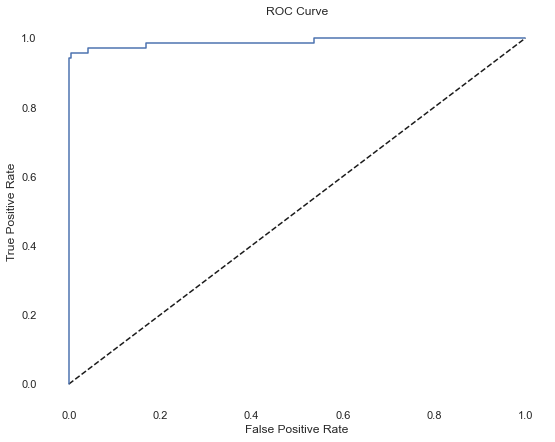


Optimal Threshold, Roc-Auc: 0.0028345687968122897 



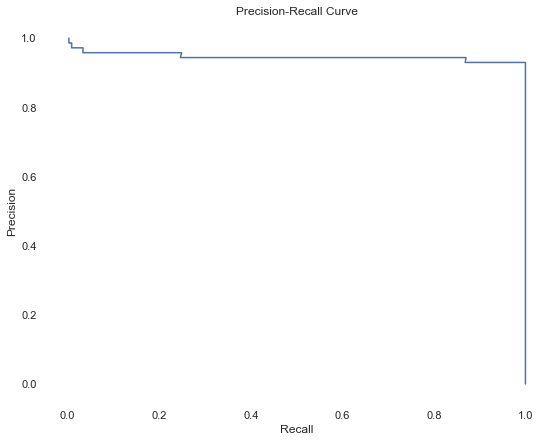


Optimal Threshold, Precision and Recall Curve: 0.9598727024440612


In [189]:
# Prediction Probabilities
y_pred_proba___ = tuned_model.predict_proba(X_test___)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test___, y_pred_proba___[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test___, y_pred_proba___[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test___, y_pred_proba___[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test___, y_pred_proba___[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

### 5.4.4 Neural Networks | Standard Scaled | Without Outliers | Smote | Tomek

class_weights: {0: 1.0, 1: 1.0}
Restoring model weights from the end of the best epoch.
Epoch 00286: early stopping

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 64)                1984      
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
___

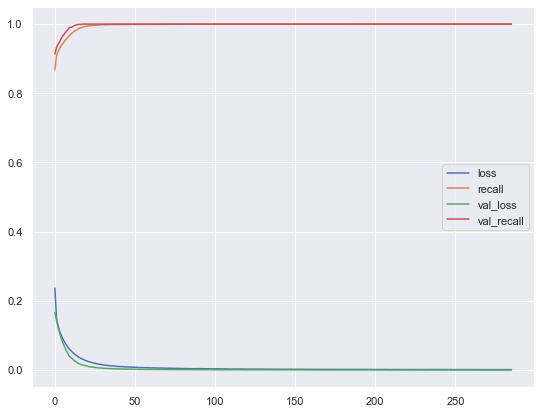

In [190]:
# Import Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, Adamax, RMSprop,Adadelta
from tensorflow.keras.layers import Dropout
from sklearn.utils import class_weight
from sklearn.utils import compute_class_weight
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# Define Model
dl_model = Sequential()
dl_model.add(Dense(64, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(32, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(16, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(1, activation = "sigmoid"))

# Compile Model
optimizer = SGD(lr = 0.001)
dl_model.compile(loss = 'binary_crossentropy',
                 optimizer = optimizer,
                 metrics = ["Recall"])

# Fit Model
train_classes = y_train___
class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(train_classes),
                                     y = train_classes)
class_weights = dict(zip(np.unique(train_classes), class_weights))
print("class_weights:", class_weights)

# Early Stop
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20, restore_best_weights = True)

# Fit-Train
dl_model.fit(x = X_train___,
             y = y_train___,
             validation_split = 0.1, 
             batch_size = 32,
             epochs = 500, verbose = 0, 
             callbacks = [early_stop],
             class_weight = class_weights)
print()
print("Model Summary:\n", dl_model.summary())
print()

# Prediction and Model Evaluating
loss_df = pd.DataFrame(dl_model.history.history)
print("Loss:\n", loss_df.head())
print()
loss_df.plot();
print("Train:\n", dl_model.evaluate(X_train___, y_train___))
print()
print("Test:\n",dl_model.evaluate(X_test___, y_test___))

loss, accuracy = dl_model.evaluate(X_test___, y_test___, verbose=0)
print("Loss(Test)    :", loss)
print("Accuracy(Test):", accuracy)

# Confusion Matrix-Classification Report
y_pred___ = (dl_model.predict(X_test___) > 0.5).astype("int32")
print(confusion_matrix(y_test___, y_pred___))
print()
print("Test Report:\n", classification_report(y_test___, y_pred___))

# Scores to Comparing
model_abbrs_.append("ANN_Tomek")
f1_scores_.append(f1_score(y_test___, y_pred___))
recall_scores_.append(recall_score(y_test___, y_pred___))
precision_scores_.append(precision_score(y_test___, y_pred___, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test___, y_pred___))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test___, y_pred___)
precision_recall_auc_scores_.append(auc(recall_, precision_))

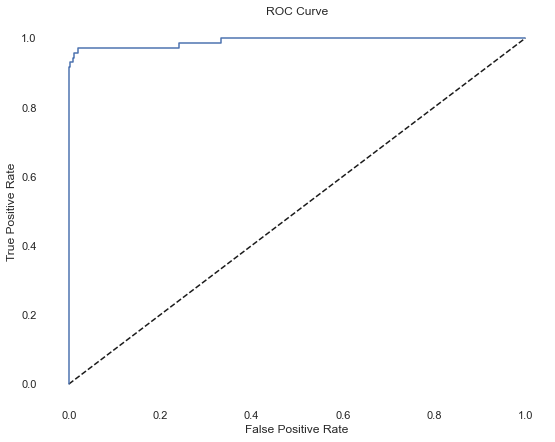


Optimal Threshold, Roc-Auc: 1.5191597e-08


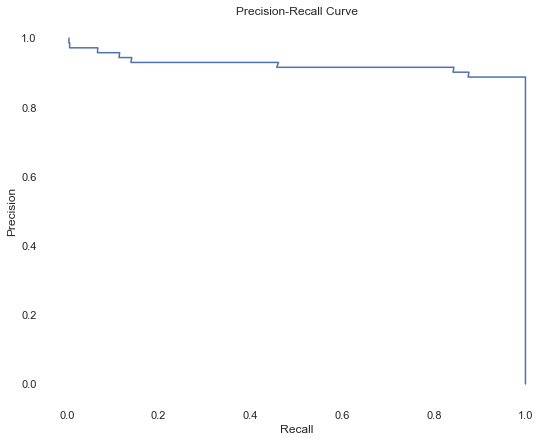


Optimal Threshold, Precision and Recall Curve: 0.9995984


In [191]:
# Proediction Probabilities
y_pred_proba___ = dl_model.predict(X_test___)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test___, y_pred_proba___)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test___, y_pred_proba___)
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold)

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test___, y_pred_proba___)
plt.plot(precisions, recalls, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test___, y_pred_proba___)
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

## 5.5 Model Evaluation | Standard Scaled | Without Outliers | SMOTEENN

In [192]:
# Dataset = SMOTETomek Sampled Data
# Resampling
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN, SMOTETomek
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 
from imblearn.pipeline import Pipeline

# # Hard Undersampling
# X_train, y_train = RandomUnderSampler(random_state=42).fit_resample(X_train_, y_train_)

# # Over Under Sampling
# over = RandomOverSampler(sampling_strategy=0.1)
# under = RandomUnderSampler(sampling_strategy=0.5)
# steps = [('o', over), ('u', under)]
# pipeline = Pipeline(steps=steps)
# X_train__, y_train__= pipeline.fit_resample(X_train_, y_train_)

# # SMOTETomek Sampling
# X_train___, y_train___ = SMOTETomek().fit_resample(X_train_, y_train_)

# SMOTETEENN Sampling
X_train____, y_train____ = SMOTEENN().fit_resample(X_train_, y_train_)

print("Train Classes before resampling:\n", pd.DataFrame(y_train_).rename({0:"class"}, axis=1)[target].value_counts(), "\n", sep="")
print("Train Classes after resampling:\n", pd.DataFrame(y_train____).rename({0:"class"}, axis=1)[target].value_counts(), "\n", sep="")
print("Test Classes:\n", pd.DataFrame(y_test____).rename({0:"class"}, axis=1)[target].value_counts(), "\n", sep="")

print("Over under-sampled Dataset:")
____df_X = pd.DataFrame(data=X_train____, columns=X_numerical_list )
____df_y= pd.DataFrame(data=y_train____, columns=[target])
____df = pd.concat([____df_X, ____df_y], axis=1)
____df.head(1)  # OU
print(shape_control(____df, X_train____, y_train____, X_test____, y_test____), "\n")

Train Classes before resampling:
0    184512
1       283
Name: class, dtype: int64

Train Classes after resampling:
1    184512
0    184299
Name: class, dtype: int64

Test Classes:
0    46128
1       71
Name: class, dtype: int64

Over under-sampled Dataset:
df.shape: (368811, 31)
X_train.shape: (368811, 30)
y_train.shape: (368811,)
X_test.shape: (46199, 30)
y_test.shape: (46199,)
None 



### 5.5.1 Logistic Regression | Standard Scaled | Without Outliers | SMOTEENN

In [193]:
study = study_log
study_KFold = study_KFold_log
print("ENN|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("ENN|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parameters", study_KFold.best_params)

ENN|Recall|Macro: 0.974 Best Parameters: {'class_weight': None, 'penalty': 'l2', 'solver2': 'newton-cg', 'l1_ratio': 0, 'C': 0.0304158799332035, 'max_iter': 600}
ENN|Recall|KFold: 0.929 Best Parameters {'class_weight': None, 'penalty': 'none', 'solver2': 'newton-cg', 'l1_ratio': 0, 'C': 18.734818693199628, 'max_iter': 9800}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.99     46128
           1       0.05      0.97      0.09        71

    accuracy                           0.97     46199
   macro avg       0.52      0.97      0.54     46199
weighted avg       1.00      0.97      0.98     46199



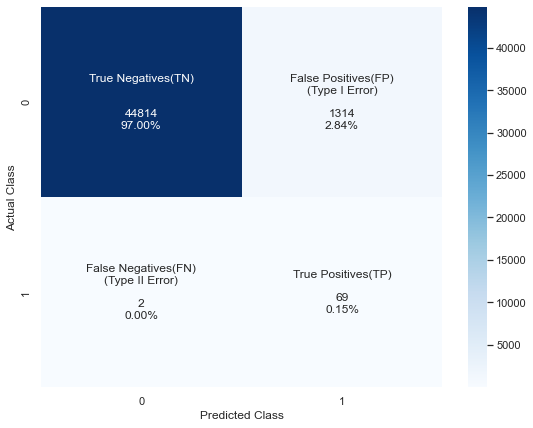

In [194]:
# Logistic Regression | Model Tunning 
study = study_KFold_log
# 0       1.00      0.98      0.99     46128
# 1       0.06      0.97      0.11        71
tuned_model = LogisticRegression(class_weight=study.best_params["class_weight"],
                                penalty=study.best_params["penalty"],
                                solver=study.best_params["solver2"],
                                l1_ratio=study.best_params["l1_ratio"],
                                C=study.best_params["C"],
                                max_iter=study.best_params["max_iter"]).fit(X_train____, y_train____)

y_pred____ = tuned_model .predict(X_test____)
print('Classification Report:\n\n', classification_report(y_test____, y_pred____))

cf_matrix = confusion_matrix(y_test____, y_pred____)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("LR_ENN")
f1_scores_.append(f1_score(y_test____, y_pred____))
recall_scores_.append(recall_score(y_test____, y_pred____))
precision_scores_.append(precision_score(y_test____, y_pred____, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test____, y_pred____))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test____, y_pred____)
precision_recall_auc_scores_.append(auc(recall_, precision_))

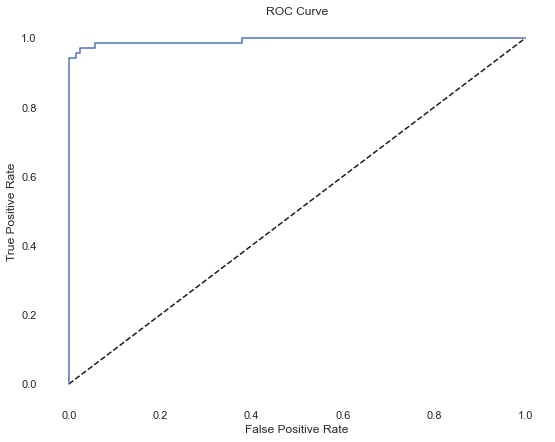


Optimal Threshold, Roc-Auc: 0.5625586950648883 



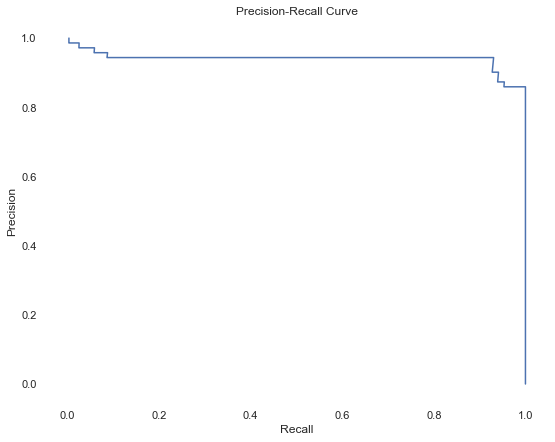


Optimal Threshold, Precision and Recall Curve: 0.9995040527965688


In [195]:
# Prediction Probabilities
y_pred_proba____ = tuned_model.predict_proba(X_test____)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test____, y_pred_proba____[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test____, y_pred_proba____[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test____, y_pred_proba____[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test____, y_pred_proba____[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

### 5.5.2 RandomForest Classifier | Standard Scaled | Without Outliers | SMOTEENN

In [196]:
study = study_rf
study_KFold = study_KFold_rf
print("ENN|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("ENN|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parameters", study_KFold.best_params)

ENN|Recall|Macro: 0.974 Best Parameters: {'class_weight': None, 'criterion': 'gini', 'max_features': 'sqrt', 'max_leaf_nodes': 9664, 'bootstrap': 'False', 'n_estimators': 45, 'max_depth': 5, 'min_samples_split': 6}
ENN|Recall|KFold: 0.898 Best Parameters {'class_weight': None, 'criterion': 'gini', 'max_features': 'log2', 'max_leaf_nodes': 2347, 'bootstrap': 'True', 'n_estimators': 65, 'max_depth': 11, 'min_samples_split': 3}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46128
           1       0.63      0.92      0.75        71

    accuracy                           1.00     46199
   macro avg       0.82      0.96      0.87     46199
weighted avg       1.00      1.00      1.00     46199



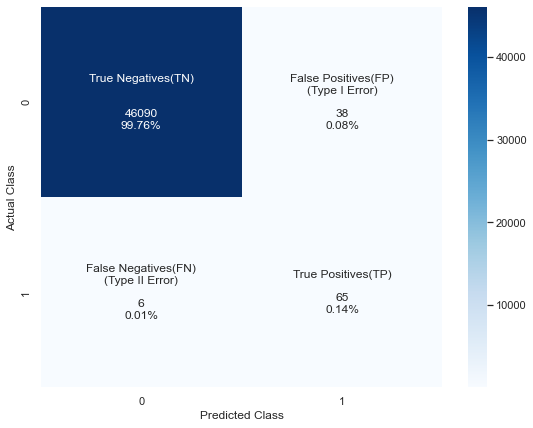

In [197]:
# RandomForest Classifier | Model Tunning
study = study_KFold_rf
# 0       1.00      1.00      1.00     46128
# 1       0.34      0.93      0.49        71
tuned_model = RandomForestClassifier(bootstrap=study.best_params['bootstrap'], 
                                    criterion=study.best_params['criterion'],
                                    max_depth=study.best_params['max_depth'],
                                    max_features=study.best_params['max_features'],
                                    max_leaf_nodes=study.best_params['max_leaf_nodes'],
                                    n_estimators=study.best_params['n_estimators'],
                                    n_jobs=-1).fit(X_train____, y_train____)

y_pred____ = tuned_model .predict(X_test____)
print('Classification Report:\n\n', classification_report(y_test____, y_pred____))

cf_matrix = confusion_matrix(y_test____, y_pred____)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("RF_ENN")
f1_scores_.append(f1_score(y_test____, y_pred____))
recall_scores_.append(recall_score(y_test____, y_pred____))
precision_scores_.append(precision_score(y_test____, y_pred____, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test____, y_pred____))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test____, y_pred____)
precision_recall_auc_scores_.append(auc(recall_, precision_))

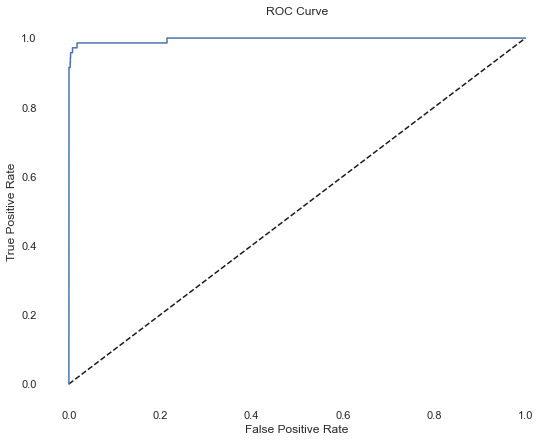


Optimal Threshold, Roc-Auc: 0.1893311318643283 



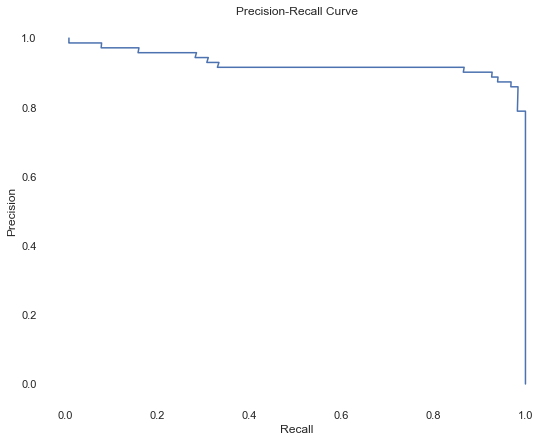


Optimal Threshold, Precision and Recall Curve: 0.7676495362038926


In [198]:
# Prediction Probabilities
y_pred_proba____ = tuned_model.predict_proba(X_test____)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test____, y_pred_proba____[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test____, y_pred_proba____[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test____, y_pred_proba____[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test____, y_pred_proba____[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

### 5.5.3 LGBM Classifier | Standard Scaled | Without Outliers | SMOTEENN

In [199]:
study = study_lgbm
study_KFold = study_KFold_lgbm
print("ENN|Recall|Macro:", round(study.best_value, 3), "Best Parameters:", study.best_params)
print("ENN|Recall|KFold:", round(study_KFold.best_value, 3), "Best Parameters", study_KFold.best_params)

ENN|Recall|Macro: 0.966 Best Parameters: {'n_estimators': 570, 'max_depth': 16, 'learning_rate': 0.015328329855618966, 'subsample': 0.5175156726973662, 'num_leaves': 130}
ENN|Recall|KFold: 0.919 Best Parameters {'n_estimators': 690, 'max_depth': 5, 'learning_rate': 0.07405072403688212, 'subsample': 0.3828656631865241, 'num_leaves': 80}


Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46128
           1       0.80      0.94      0.86        71

    accuracy                           1.00     46199
   macro avg       0.90      0.97      0.93     46199
weighted avg       1.00      1.00      1.00     46199



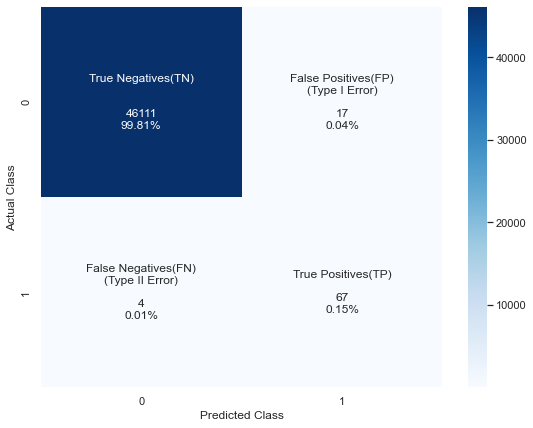

In [200]:
# LGBM Classifier | Model Tunning
study = study_KFold_lgbm
# 0       1.00      0.98      0.99     46128
# 1       0.08      0.93      0.15        71
tuned_model = LGBMClassifier(n_estimators=study.best_params["n_estimators"], 
                            max_depth=study.best_params["max_depth"],
                            learning_rate=study.best_params["learning_rate"],
                            subsample=study.best_params["subsample"],
                            num_leaves=study.best_params["num_leaves"]).fit(X_train____, y_train____)

y_pred____ = tuned_model .predict(X_test____)
print('Classification Report:\n\n', classification_report(y_test____, y_pred____))

cf_matrix = confusion_matrix(y_test____, y_pred____)

group_names = ["True Negatives(TN)\n", 
               "False Positives(FP)\n(Type I Error)", 
               "False Negatives(FN)\n(Type II Error)", 
               "True Positives(TP)"]

group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2, 2)

ax = sns.heatmap(cf_matrix, annot=labels, fmt="", cmap="Blues")
ax.set(xlabel="Predicted Class", ylabel = "Actual Class")
sns.set(rc={'figure.figsize':(9, 7)});

# Scores to Comparing
model_abbrs_.append("LGBM_ENN")
f1_scores_.append(f1_score(y_test____, y_pred____))
recall_scores_.append(recall_score(y_test____, y_pred____))
precision_scores_.append(precision_score(y_test____, y_pred____, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test____, y_pred____))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test____, y_pred____)
precision_recall_auc_scores_.append(auc(recall_, precision_))

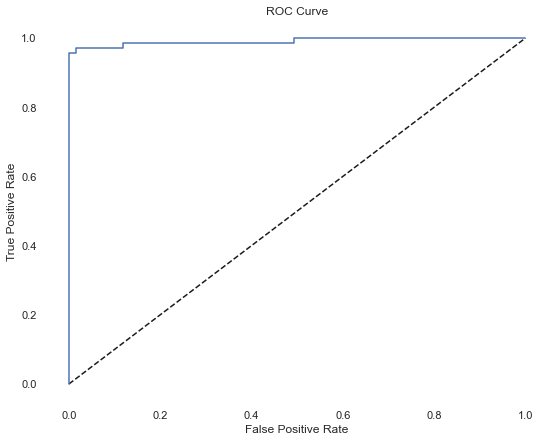


Optimal Threshold, Roc-Auc: 0.08843381776169332 



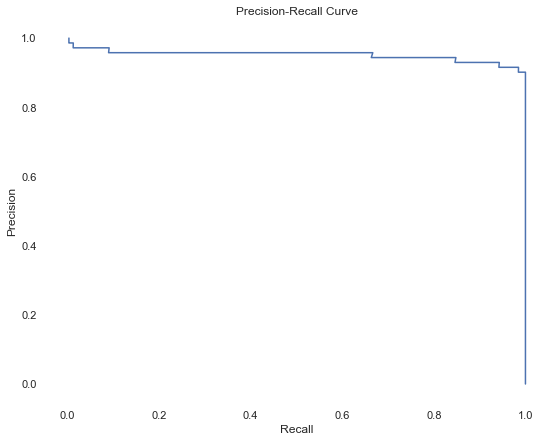


Optimal Threshold, Precision and Recall Curve: 0.993549920265836


In [201]:
# Prediction Probabilities
y_pred_proba____ = tuned_model.predict_proba(X_test____)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test____, y_pred_proba____[:,1])
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test____, y_pred_proba____[:,1])
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Roc-Auc:", optimal_threshold, "\n")

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test____, y_pred_proba____[:,1])
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test____, y_pred_proba____[:,1])
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print()
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

### 5.5.4 Neural Networks | Standard Scaled | Without Outliers | SMOTEENN

class_weights: {0: 1.0005778653166866, 1: 0.9994228017689907}
Restoring model weights from the end of the best epoch.
Epoch 00478: early stopping

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 64)                1984      
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_13 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_14 (Dropout)         (None, 16)

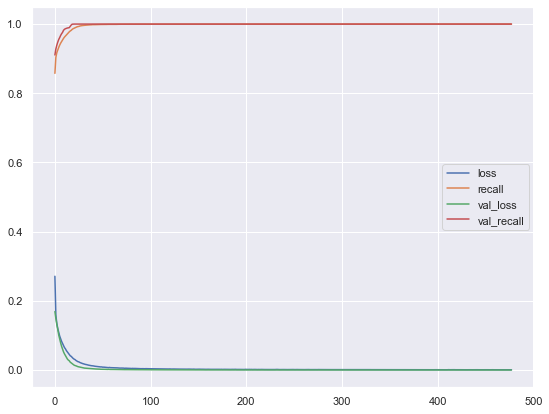

In [202]:
# Import Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, Adamax, RMSprop,Adadelta
from tensorflow.keras.layers import Dropout
from sklearn.utils import class_weight
from sklearn.utils import compute_class_weight
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# Define Model
dl_model = Sequential()
dl_model.add(Dense(64, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(32, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(16, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(1, activation = "sigmoid"))

# Compile Model
optimizer = SGD(lr = 0.001)
dl_model.compile(loss = 'binary_crossentropy',
                 optimizer = optimizer,
                 metrics = ["Recall"])

# Fit Model
train_classes = y_train____
class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(train_classes),
                                     y = train_classes)
class_weights = dict(zip(np.unique(train_classes), class_weights))
print("class_weights:", class_weights)

# Early Stop
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20, restore_best_weights = True)

# Fit-Train
dl_model.fit(x = X_train____,
             y = y_train____,
             validation_split = 0.1, 
             batch_size = 32,
             epochs = 500, verbose = 0, 
             callbacks = [early_stop],
             class_weight = class_weights)
print()
print("Model Summary:\n", dl_model.summary())
print()

# Prediction and Model Evaluating
loss_df = pd.DataFrame(dl_model.history.history)
print("Loss:\n", loss_df.head())
print()
loss_df.plot();
print("Train:\n", dl_model.evaluate(X_train____, y_train____))
print()
print("Test:\n",dl_model.evaluate(X_test____, y_test____))

loss, accuracy = dl_model.evaluate(X_test____, y_test____, verbose=0)
print("Loss(Test)    :", loss)
print("Accuracy(Test):", accuracy)

# Confusion Matrix-Classification Report
y_pred____ = (dl_model.predict(X_test____) > 0.5).astype("int32")
print(confusion_matrix(y_test____, y_pred____))
print()
print("Test Report:\n", classification_report(y_test____, y_pred____))

# Scores to Comparing
model_abbrs_.append("ANN_ENN")
f1_scores_.append(f1_score(y_test____, y_pred____))
recall_scores_.append(recall_score(y_test____, y_pred____))
precision_scores_.append(precision_score(y_test____, y_pred____, pos_label=0))
roc_auc_scores_.append(roc_auc_score(y_test____, y_pred____))
# calculate the precision-recall auc
precision_, recall_, _ = precision_recall_curve(y_test____, y_pred____)
precision_recall_auc_scores_.append(auc(recall_, precision_))

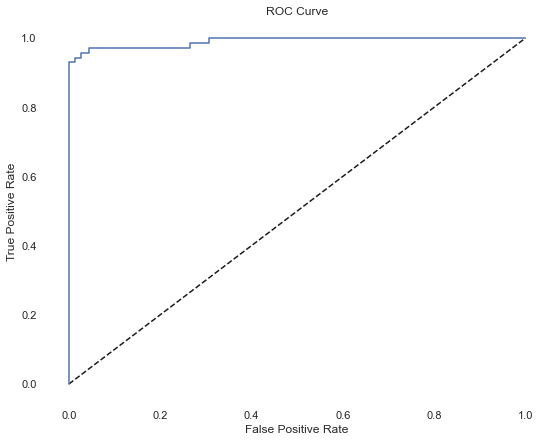

Optimal Threshold, Roc-Auc: 2.8605831e-11


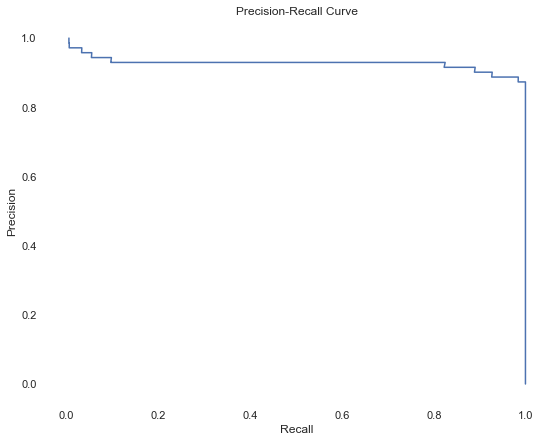

Optimal Threshold, Precision and Recall Curve: 0.9998816


In [203]:
# Proediction Probabilities
y_pred_proba____ = dl_model.predict(X_test____)

# Plot Roc-Auc Curve
plt.axes().set_facecolor("white")
plt.grid(False)
fpr, tpr, thresholds = roc_curve(y_test____, y_pred_proba____)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN-ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show();

# Optimal Threshold Roc-Auc
fp_rate, tp_rate, thresholds = roc_curve(y_test____, y_pred_proba____)
optimal_idx = np.argmax(tp_rate - fp_rate)
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold, Roc-Auc:", optimal_threshold)

# Plot Precision and Recall Curve
plt.axes().set_facecolor("white")
plt.grid(False)
precisions, recalls, thresholds = precision_recall_curve(y_test____, y_pred_proba____)
plt.plot(precisions, recalls, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show();

# Optimal Threshold Precision and Recall Curve
precisions, recalls, thresholds = precision_recall_curve(y_test____, y_pred_proba____)
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))  
optimal_threshold = thresholds[optimal_idx]
print("Optimal Threshold, Precision and Recall Curve:", optimal_threshold)

## 5.6 Model Comparison by all Features

In [218]:
def color_success(success_score ):
    if success_score >= 0.97 and success_score <= 1.0:
        color = 'green'
    elif success_score >= 0.95 and success_score < 0.97:
        color = "yellow"
    else:
        color = 'black'
    return f'color: {color}'

In [219]:
compare_tuned_models = pd.DataFrame({"F1": f1_scores_,
                                     "Recall|Macro": recall_scores_,
                                     "Precision-0": precision_scores_,
                                     "ROC AUC": roc_auc_scores_,
                                     "Recall AUC": precision_recall_auc_scores_}, index=model_abbrs_)

compare_tuned_models.sort_values(by=["Recall|Macro", "Recall AUC"], ascending=False).style.applymap(color_success)
# https://kanoki.org/2019/01/02/pandas-trick-for-the-day-color-code-columns-rows-cells-of-dataframe/

for score in compare_tuned_models.columns:
    compare_tuned_models[score].sort_values().iplot(kind="barh", title=f"{score} Score")

# 6. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to *Pycharm* and create your web app with Flask API.

## 6.1 Datasets | Derived Datasets

In [220]:
print("All Dataset:")
print(shape_control(df_, X_train_, y_train_, X_test, y_test_), "\n")

print("Hard under-sampled Dataset:")
print(shape_control(_df, X_train, X_test, y_train, y_test), "\n")

print("Over under-sampled Dataset:")
print(shape_control(__df, X_train__, X_test__, y_train__, y_test__), "\n")

print("Dataset resampled with SMOTETomek:")
print(shape_control(___df, X_train___, X_test___, y_train___, y_test___), "\n")

print("Dataset resampled with SMOTEENN")
print(shape_control(____df, X_train____, X_test____, y_train____, y_test____), "\n")

All Dataset:
df.shape: (230994, 31)
X_train.shape: (184795, 30)
y_train.shape: (184795,)
X_test.shape: (46199, 30)
y_test.shape: (46199,)
None 

Hard under-sampled Dataset:
df.shape: (566, 31)
X_train.shape: (566, 30)
y_train.shape: (46199, 30)
X_test.shape: (566,)
y_test.shape: (46199,)
None 

Over under-sampled Dataset:
df.shape: (55353, 31)
X_train.shape: (55353, 30)
y_train.shape: (46199, 30)
X_test.shape: (55353,)
y_test.shape: (46199,)
None 

Dataset resampled with SMOTETomek:
df.shape: (369024, 31)
X_train.shape: (369024, 30)
y_train.shape: (46199, 30)
X_test.shape: (369024,)
y_test.shape: (46199,)
None 

Dataset resampled with SMOTEENN
df.shape: (368811, 31)
X_train.shape: (368811, 30)
y_train.shape: (46199, 30)
X_test.shape: (368811,)
y_test.shape: (46199,)
None 



In [221]:
resampled_dataset = {"Dataset": df_.shape,
                     "Hard Under sampled Data": _df.shape,
                     "Over Under sampled Data": __df.shape,
                     "SMOTETomek": ___df.shape,
                     "SMOTEENN": ____df.shape}
resampled_dataset 

{'Dataset': (230994, 31),
 'Hard Under sampled Data': (566, 31),
 'Over Under sampled Data': (55353, 31),
 'SMOTETomek': (369024, 31),
 'SMOTEENN': (368811, 31)}

## 6.2 Best Parameters

### Best Parameters of Logistic Regression

In [222]:
LR_best_parameters[0]
LR_best_parameters[1]  # KFold

{'class_weight': None,
 'penalty': 'none',
 'solver2': 'newton-cg',
 'l1_ratio': 0,
 'C': 18.734818693199628,
 'max_iter': 9800}

### Best Parameters of Random Forest

In [223]:
RF_best_parameters[0]
RF_best_parameters[1]  # KFold

{'class_weight': None,
 'criterion': 'gini',
 'max_features': 'log2',
 'max_leaf_nodes': 2347,
 'bootstrap': 'True',
 'n_estimators': 65,
 'max_depth': 11,
 'min_samples_split': 3}

### Best Parameters of LGBM

In [224]:
LGBM_best_parameters[0]
LGBM_best_parameters[1]  # Kfold

{'n_estimators': 690,
 'max_depth': 5,
 'learning_rate': 0.07405072403688212,
 'subsample': 0.3828656631865241,
 'num_leaves': 80}

## 6.3 Model Evaulation by Selected Features

In [225]:
# lists for comparing models
model_abbrs__ = []
f1_scores__ = []
recall_scores__ = []
precision_scores__ = []
roc_auc_scores__ = []
precision_recall_auc_scores__ = []

# dataset
dataset = {"HU": _df,
           "OU": __df,
           "Tomek": ___df,
           "ENN": ____df,
           "All Dataset": df_}

### 6.3.1 Tunned Models

In [227]:
selected_features = ["v14", "v4", "v12", "v10", "v11", "v17", "v3"]
_X_test, _y_test = X_test[selected_features], y_test

###############################################################################
## LR1

def logistic_regression(_df_, model_name):
    _X_train = _df_[selected_features] 
    _y_train = _df_[target]

    # Model tunning
    i=0
    to_pickle = LogisticRegression(class_weight=LR_best_parameters[i].get('class_weight'),
                                penalty=LR_best_parameters[i].get('penalty'),
                                solver=LR_best_parameters[i].get('solver2'),
                                l1_ratio=LR_best_parameters[i].get('l1_ratio'),
                                C=LR_best_parameters[i].get('C'),
                                max_iter=LR_best_parameters[i].get('max_iter'),
                                random_state=42).fit(_X_train, _y_train)

    _y_pred = to_pickle.predict(_X_test)

    print(to_pickle)
    print()
    print('Confusion Matrix:\n\n', confusion_matrix(_y_test, _y_pred))
    print()
    print('Classification Report:\n\n', classification_report(_y_test, _y_pred))


    # Scores to Comparing
    model_abbrs__.append("LR_" + model_name)
    f1_scores__.append(f1_score(_y_test, _y_pred))
    recall_scores__.append(recall_score(_y_test, _y_pred, average="macro"))
    precision_scores__.append(precision_score(_y_test, _y_pred, pos_label=0))
    roc_auc_scores__.append(roc_auc_score(_y_test, _y_pred))
    # calculate the precision-recall auc
    precision_, recall_, _ = precision_recall_curve(_y_test, _y_pred)
    precision_recall_auc_scores__.append(auc(recall_, precision_))
    return to_pickle

###############################################################################
## LR2

def logistic_regression_KFold(_df_, model_name):  
    _X_train = _df_[selected_features] 
    _y_train = _df_[target]  
    # Model tunning
    i=1
    to_pickle = LogisticRegression(class_weight=LR_best_parameters[i].get('class_weight'),
                                penalty=LR_best_parameters[i].get('penalty'),
                                solver=LR_best_parameters[i].get('solver2'),
                                l1_ratio=LR_best_parameters[i].get('l1_ratio'),
                                C=LR_best_parameters[i].get('C'),
                                max_iter=LR_best_parameters[i].get('max_iter'),
                                random_state=42).fit(_X_train, _y_train)
    _y_pred = to_pickle.predict(_X_test)

    print(to_pickle)
    print()
    print('Confusion Matrix:\n\n', confusion_matrix(_y_test, _y_pred))
    print()
    print('Classification Report:\n\n', classification_report(_y_test, _y_pred))

    # Scores to Comparing
    model_abbrs__.append("LR_KFold_" + model_name)
    f1_scores__.append(f1_score(_y_test, _y_pred))
    recall_scores__.append(recall_score(_y_test, _y_pred, average="macro"))
    precision_scores__.append(precision_score(_y_test, _y_pred, pos_label=0))
    roc_auc_scores__.append(roc_auc_score(_y_test, _y_pred))
    # calculate the precision-recall auc
    precision_, recall_, _ = precision_recall_curve(_y_test, _y_pred)
    precision_recall_auc_scores__.append(auc(recall_, precision_))
    return to_pickle

###############################################################################
## RF1

def randomforest_clf(_df_, model_name):
    _X_train = _df_[selected_features] 
    _y_train = _df_[target]  

    # Model tunning
    to_pickle = RandomForestClassifier(**RF_best_parameters[0], random_state=42).fit(_X_train, _y_train)
    _y_pred = to_pickle.predict(_X_test)

    print(to_pickle)
    print()
    print('Confusion Matrix:\n\n', confusion_matrix(_y_test, _y_pred))
    print()
    print('Classification Report:\n\n', classification_report(_y_test, _y_pred))

    # Scores to Comparing
    model_abbrs__.append("RF_" + model_name)
    f1_scores__.append(f1_score(_y_test, _y_pred))
    recall_scores__.append(recall_score(_y_test, _y_pred, average="macro"))
    precision_scores__.append(precision_score(_y_test, _y_pred, pos_label=0))
    roc_auc_scores__.append(roc_auc_score(_y_test, _y_pred))
    # calculate the precision-recall auc
    precision_, recall_, _ = precision_recall_curve(_y_test, _y_pred)
    precision_recall_auc_scores__.append(auc(recall_, precision_))
    return to_pickle
###############################################################################
## RF2

def randomforest_clf_KFold(_df_, model_name):
    _X_train = _df_[selected_features] 
    _y_train = _df_[target]  

    # Model tunning
    to_pickle= RandomForestClassifier(**RF_best_parameters[1], random_state=42).fit(_X_train, _y_train)
    _y_pred = to_pickle.predict(_X_test)

    print(to_pickle)
    print()
    print('Confusion Matrix:\n\n', confusion_matrix(_y_test, _y_pred))
    print()
    print('Classification Report:\n\n', classification_report(_y_test, _y_pred))

    # Scores to Comparing
    model_abbrs__.append("RF_KFold_" + model_name)
    f1_scores__.append(f1_score(_y_test, _y_pred))
    recall_scores__.append(recall_score(_y_test, _y_pred, average="macro"))
    precision_scores__.append(precision_score(_y_test, _y_pred, pos_label=0))
    roc_auc_scores__.append(roc_auc_score(_y_test, _y_pred))
    # calculate the precision-recall auc
    precision_, recall_, _ = precision_recall_curve(_y_test, _y_pred)
    precision_recall_auc_scores__.append(auc(recall_, precision_))
    return to_pickle

###############################################################################
## LGBM1

def lgbm_clf(_df_, model_name):
    _X_train = _df_[selected_features] 
    _y_train = _df_[target]  

    # Model tunning
    to_pickle= LGBMClassifier(**LGBM_best_parameters[0], random_state=42).fit(_X_train, _y_train)
    _y_pred = to_pickle.predict(_X_test)

    print(to_pickle)
    print()
    print('Confusion Matrix:\n\n', confusion_matrix(_y_test, _y_pred))
    print()
    print('Classification Report:\n\n', classification_report(_y_test, _y_pred))

    # Scores to Comparing
    model_abbrs__.append("LGBM_" + model_name)
    f1_scores__.append(f1_score(_y_test, _y_pred))
    recall_scores__.append(recall_score(_y_test, _y_pred, average="macro"))
    precision_scores__.append(precision_score(_y_test, _y_pred, pos_label=0))
    roc_auc_scores__.append(roc_auc_score(_y_test, _y_pred))
    # calculate the precision-recall auc
    precision_, recall_, _ = precision_recall_curve(_y_test, _y_pred)
    precision_recall_auc_scores__.append(auc(recall_, precision_))
    return to_pickle

###############################################################################
## LGBM2

def lgbm_clf_KFold(_df_, model_name):
    _X_train = _df_[selected_features] 
    _y_train = _df_[target]  
    
    # Model tunning
    to_pickle = LGBMClassifier(**LGBM_best_parameters[1], random_state=42).fit(_X_train, _y_train)
    _y_pred = to_pickle.predict(_X_test)

    print(to_pickle)
    print()
    print('Confusion Matrix:\n\n', confusion_matrix(_y_test, _y_pred))
    print()
    print('Classification Report:\n\n', classification_report(_y_test, _y_pred))

    # Scores to Comparing
    model_abbrs__.append("LGBM_KFold_" + model_name)
    f1_scores__.append(f1_score(_y_test, _y_pred))
    recall_scores__.append(recall_score(_y_test, _y_pred, average="macro"))
    precision_scores__.append(precision_score(_y_test, _y_pred, pos_label=0))
    roc_auc_scores__.append(roc_auc_score(_y_test, _y_pred))
    # calculate the precision-recall auc
    precision_, recall_, _ = precision_recall_curve(_y_test, _y_pred)
    precision_recall_auc_scores__.append(auc(recall_, precision_))
    return to_pickle

### 6.3.2 Model Success

In [228]:
for key, value in dataset.items():
    cprint(f"{key} Logistic Regression:", "blue","on_grey", attrs=["bold"])
    logistic_regression(value, key)
    print(colored('*'*100, 'red', attrs=['bold']))

    cprint(f"{key} Logistic Regression KFold:", "blue","on_grey", attrs=["bold"])
    logistic_regression_KFold(value, key)
    print(colored('*'*100, 'red', attrs=['bold']))

    cprint(f"{key} Random Forest:", "blue","on_grey", attrs=["bold"])
    randomforest_clf(value, key)
    print(colored('*'*100, 'red', attrs=['bold']))

    cprint(f"{key} Random Forest KFold:", "blue","on_grey", attrs=["bold"])
    randomforest_clf_KFold(value, key)
    print(colored('*'*100, 'red', attrs=['bold']))

    cprint(f"{key} LGBM:", "blue","on_grey", attrs=["bold"])
    lgbm_clf(value, key)
    print(colored('*'*100, 'red', attrs=['bold']))

    cprint(f"{key} LGBM KFold:", "blue","on_grey", attrs=["bold"])
    lgbm_clf_KFold(value, key)
    print(colored('*'*100, 'red', attrs=['bold']))

HU Logistic Regression:
LogisticRegression(C=0.0304158799332035, l1_ratio=0, max_iter=600,
                   random_state=42, solver='newton-cg')

Confusion Matrix:

 [[45627   501]
 [    4    67]]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.99      0.99     46128
           1       0.12      0.94      0.21        71

    accuracy                           0.99     46199
   macro avg       0.56      0.97      0.60     46199
weighted avg       1.00      0.99      0.99     46199

****************************************************************************************************
HU Logistic Regression KFold:
LogisticRegression(C=18.734818693199628, l1_ratio=0, max_iter=9800,
                   penalty='none', random_state=42, solver='newton-cg')

Confusion Matrix:

 [[44228  1900]
 [    2    69]]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.96      0.98 

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46128
           1       0.90      0.93      0.92        71

    accuracy                           1.00     46199
   macro avg       0.95      0.96      0.96     46199
weighted avg       1.00      1.00      1.00     46199

****************************************************************************************************
Tomek Logistic Regression:
LogisticRegression(C=0.0304158799332035, l1_ratio=0, max_iter=600,
                   random_state=42, solver='newton-cg')

Confusion Matrix:

 [[44811  1317]
 [    2    69]]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      0.97      0.99     46128
           1       0.05      0.97      0.09        71

    accuracy                           0.97     46199
   macro avg       0.52      0.97      0.54     46199
weighted avg       1.00      0.97      0.98    

LGBMClassifier(learning_rate=0.07405072403688212, max_depth=5, n_estimators=690,
               num_leaves=80, random_state=42, subsample=0.3828656631865241)

Confusion Matrix:

 [[45957   171]
 [    5    66]]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46128
           1       0.28      0.93      0.43        71

    accuracy                           1.00     46199
   macro avg       0.64      0.96      0.71     46199
weighted avg       1.00      1.00      1.00     46199

****************************************************************************************************
All Dataset Logistic Regression:
LogisticRegression(C=0.0304158799332035, l1_ratio=0, max_iter=600,
                   random_state=42, solver='newton-cg')

Confusion Matrix:

 [[46128     0]
 [   10    61]]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00    

In [229]:
compare_tuned_models_ = pd.DataFrame({"F1": f1_scores__,
                                     "Recall|Macro": recall_scores__,
                                     "Precision-0": precision_scores__,
                                     "ROC AUC": roc_auc_scores__,
                                     "Recall AUC": precision_recall_auc_scores__}, index=model_abbrs__)

compare_tuned_models_.sort_values(by=["Recall|Macro", "Recall AUC"], ascending=False).style.applymap(color_success)

for score in compare_tuned_models_.columns:
    compare_tuned_models_[score].sort_values().iplot(kind="barh", title=f"{score} Score")

### 6.3.3 Save and Export the Model as .pkl


#### Model 1 - RF

In [230]:
cprint(f"Random Forest|All Dataset:", "blue","on_grey", attrs=["bold"])
to_pickle = randomforest_clf(df_, "All Dataset")
to_pickle 

Random Forest|All Dataset:
RandomForestClassifier(bootstrap='False', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=9664, min_samples_split=6,
                       n_estimators=45, random_state=42)

Confusion Matrix:

 [[46128     0]
 [    4    67]]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46128
           1       1.00      0.94      0.97        71

    accuracy                           1.00     46199
   macro avg       1.00      0.97      0.99     46199
weighted avg       1.00      1.00      1.00     46199



RandomForestClassifier(bootstrap='False', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=9664, min_samples_split=6,
                       n_estimators=45, random_state=42)

In [231]:
import pickle
import shutil
# path= "/content/drive/MyDrive/Csv"  # Colab
# pickle.dump(to_pickle, open(path + '/rf_deploy', 'wb'))  # Colab
pickle.dump(to_pickle, open('rf_deploy', 'wb'))
# https://medium.com/codex/properly-pickle-out-to-a-path-in-python-when-using-google-colab-741f0905e68b

In [232]:
test_data_0 = df_[df_[target]==0][selected_features].iloc[[0]]
test_data_1 = df_[df_[target]==1][selected_features].iloc[[0]]

# path= "/content/drive/MyDrive/Csv"  # Colab
# rf_deploy = pickle.load(open(path + '/rf_deploy', 'rb'))  # Colab
rf_deploy = pickle.load(open('rf_deploy', 'rb'))  # Colab
y_pred = rf_deploy.predict(test_data_1)
print("Model:", rf_deploy)
print("Class:", y_pred)

Model: RandomForestClassifier(bootstrap='False', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=9664, min_samples_split=6,
                       n_estimators=45, random_state=42)
Class: [1]


#### Model 2 - LGBM

In [239]:
cprint(f"LGBMK KFold|OU:", "blue","on_grey", attrs=["bold"])
to_pickle = lgbm_clf_KFold(df_, "All Dataset")
to_pickle

LGBMK KFold|OU:
LGBMClassifier(learning_rate=0.07405072403688212, max_depth=5, n_estimators=690,
               num_leaves=80, random_state=42, subsample=0.3828656631865241)

Confusion Matrix:

 [[46128     0]
 [    0    71]]

Classification Report:

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     46128
           1       1.00      1.00      1.00        71

    accuracy                           1.00     46199
   macro avg       1.00      1.00      1.00     46199
weighted avg       1.00      1.00      1.00     46199



LGBMClassifier(learning_rate=0.07405072403688212, max_depth=5, n_estimators=690,
               num_leaves=80, random_state=42, subsample=0.3828656631865241)

In [240]:
# path = "/content/drive/MyDrive/Csv"
# pickle.dump(to_pickle, open(path + '/lgbm_deploy', 'wb'))  # Colab
pickle.dump(to_pickle, open('lgbm_deploy', 'wb'))

In [241]:
test_data_0 = df_[df_[target]==0][selected_features].iloc[[0]]
test_data_1 = df_[df_[target]==1][selected_features].iloc[[0]]

# path= "/content/drive/MyDrive/Csv"
# lgbm_deploy = pickle.load(open(path + '/rf_deploy', 'rb'))
lgbm_deploy = pickle.load(open('rf_deploy', 'rb'))
y_pred = lgbm_deploy.predict(test_data_1)
print("Model:", lgbm_deploy)
print("Class:", y_pred)

Model: RandomForestClassifier(bootstrap='False', max_depth=5, max_features='sqrt',
                       max_leaf_nodes=9664, min_samples_split=6,
                       n_estimators=45, random_state=42)
Class: [1]


#### Model 3 - ANN

class_weights: {0: 0.500767429760666, 1: 326.26271186440675}
Restoring model weights from the end of the best epoch.
Epoch 00029: early stopping

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                512       
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_20 (Dropout)         (None, 16) 

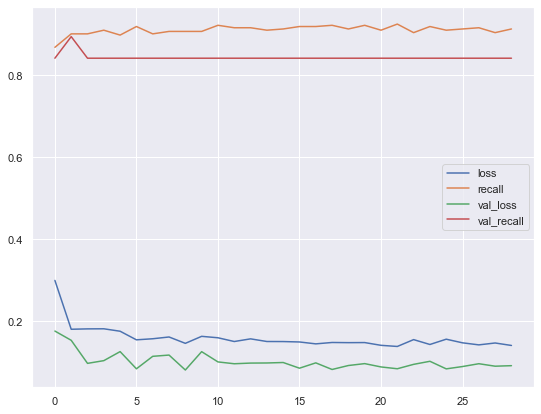

In [242]:
selected_features = ["v14", "v4", "v12", "v10", "v11", "v17", "v3"]
_X_test, _y_test = X_test[selected_features], y_test
_X_train = df_[selected_features] 
_y_train = df_[target]

###############################################################################

# Import Libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam, SGD, Adamax, RMSprop,Adadelta
from tensorflow.keras.layers import Dropout
from sklearn.utils import class_weight
from sklearn.utils import compute_class_weight
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_roc_curve, roc_auc_score, roc_curve, average_precision_score
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GridSearchCV

# Define Model
dl_model = Sequential()
dl_model.add(Dense(64, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(32, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(16, activation = "relu"))
dl_model.add(Dropout(0.25))
dl_model.add(Dense(1, activation = "sigmoid"))

# Compile Model
optimizer = SGD(lr = 0.001)
dl_model.compile(loss = 'binary_crossentropy',
                 optimizer = optimizer,
                 metrics = ["Recall"])

# Fit Model
train_classes = _y_train
class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(train_classes),
                                     y = train_classes)
class_weights = dict(zip(np.unique(train_classes), class_weights))
print("class_weights:", class_weights)

# Early Stop
early_stop = EarlyStopping(monitor = "val_loss", mode = "auto", verbose = 1, patience = 20, restore_best_weights = True)

# Fit-Train
dl_model.fit(x = _X_train,
             y = _y_train,
             validation_split = 0.1, 
             batch_size = 32,
             epochs = 500, verbose = 0, 
             callbacks = [early_stop],
             class_weight = class_weights)
print()
print("Model Summary:\n", dl_model.summary())
print()

# Prediction and Model Evaluating
loss_df = pd.DataFrame(dl_model.history.history)
print("Loss:\n", loss_df.head())
print()
loss_df.plot();
print("Train:\n", dl_model.evaluate(_X_train, _y_train))
print()
print("Test:\n",dl_model.evaluate(_X_test, _y_test))

loss, accuracy = dl_model.evaluate(_X_test, _y_test, verbose=0)
print("Loss(Test)    :", loss)
print("Accuracy(Test):", accuracy)

# Confusion Matrix-Classification Report
_y_pred = (dl_model.predict(_X_test) > 0.5).astype("int32")
print(confusion_matrix(_y_test, _y_pred))
print()
print("Test Report:\n", classification_report(_y_test, _y_pred))

In [ ]:
!pip install h5py

In [260]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

# dl_model.save("/content/drive/MyDrive/Csv/dl_deploy.h5")  # Colab
dl_model.save("dl_deploy.h5")
# https://machinelearningmastery.com/save-load-keras-deep-learning-models/
# https://neptune.ai/blog/how-to-use-google-colab-for-deep-learning-complete-tutorial

In [261]:
# load and evaluate a saved model
from numpy import loadtxt
from keras.models import load_model

test_data_0 = df_[df_[target]==0][selected_features].iloc[[0]]
test_data_1 = df_[df_[target]==1][selected_features].iloc[[0]]
 
# load model
# dl_deploy = load_model("/content/drive/MyDrive/Csv/dl_deploy.h5")  # Colab
dl_deploy = load_model("dl_deploy.h5")
dl_deploy.summary()

y_pred_proba = dl_deploy.predict(test_data_1)
if y_pred_proba > 0.5:
    classe = 1
else:
    classe = 0

print("Model:", dl_deploy)
print("Probability", y_pred_proba)
print("Class:", classe )

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 64)                512       
_________________________________________________________________
dropout_18 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_25 (Dense)             (None, 32)                2080      
_________________________________________________________________
dropout_19 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_26 (Dense)             (None, 16)                528       
_________________________________________________________________
dropout_20 (Dropout)         (None, 16)                0         
_________________________________________________________________
dense_27 (Dense)             (None, 1)                